<a href="https://colab.research.google.com/github/Pam-Pam29/Group18-Formative-2-Text-Classification/blob/main/Group18_Formative_2_Text_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Our text sequence classification model

In [ ]:
#Importing necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
url = 'https://raw.githubusercontent.com/Pam-Pam29/Group18-Formative-2-Text-Classification/refs/heads/main/dataset/data.csv'
df = pd.read_csv(url)
df.head(10)

Sentence Sentiment
0  The GeoSolutions technology will leverage Bene...  positive
1  $ESI on lows, down $1.50 to $2.50 BK a real po...  negative
2  For the last quarter of 2010 , Componenta 's n...  positive
3  According to the Finnish-Russian Chamber of Co...   neutral
4  The Swedish buyout firm has sold its remaining...   neutral
5    $SPY wouldn't be surprised to see a green close  positive
6  Shell's $70 Billion BG Deal Meets Shareholder ...  negative
7  SSH COMMUNICATIONS SECURITY CORP STOCK EXCHANG...  negative
8  Kone 's net sales rose by some 14 % year-on-ye...  positive
9  The Stockmann department store will have a tot...   neutral

DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5842 entries, 0 to 5841
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Sentence   5842 non-null   object
 1   Sentiment  5842 non-null   object
dtypes: object(2)
memory usage: 91.4+ KB

Missing Values:
Sentence     0
Sentiment    0
dtype: int64

Unique Sentiments:
['positive' 'negative' 'neutral']

Sentiment Distribution:
Sentiment
neutral     3130
positive    1852
negative     860
Name: count, dtype: int64


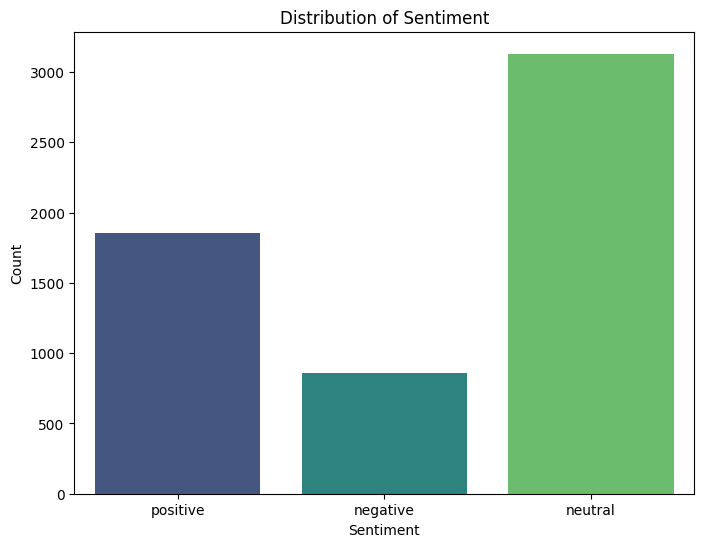


Descriptive statistics for sentence_length and word_count:
       sentence_length   word_count
count      5842.000000  5842.000000
mean        117.022253    21.004793
std          56.420425    10.306465
min           9.000000     2.000000
25%          72.000000    13.000000
50%         107.000000    19.000000
75%         150.000000    27.000000
max         315.000000    81.000000


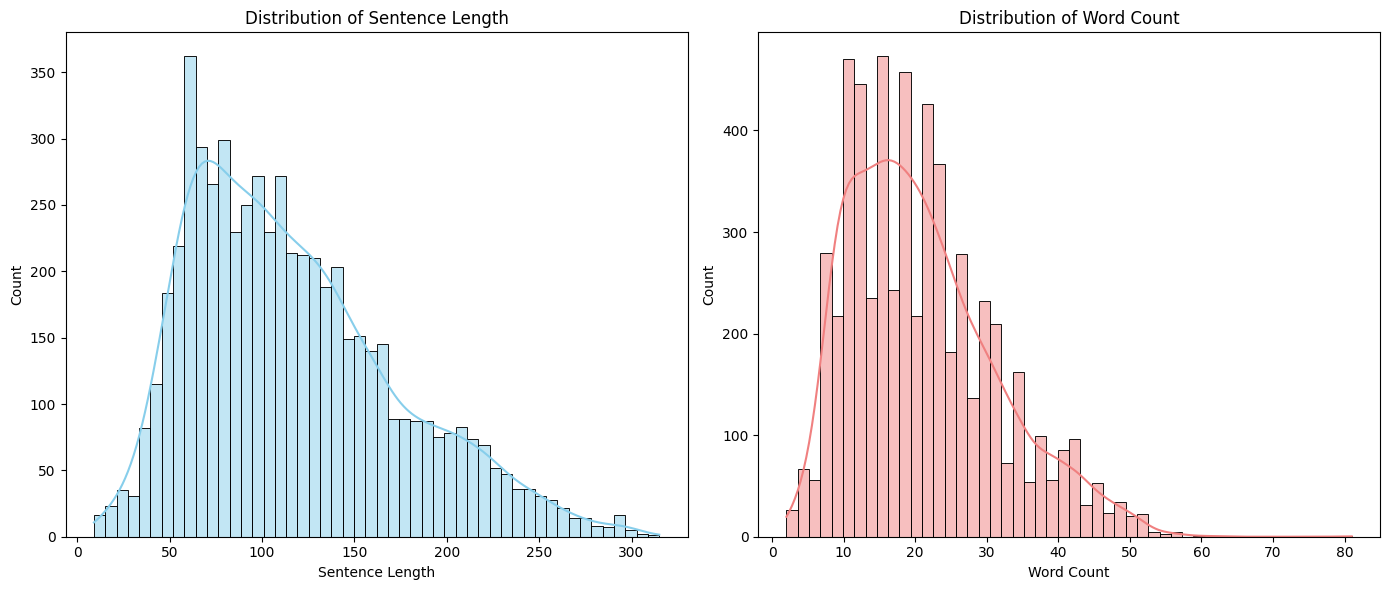

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

url = 'https://raw.githubusercontent.com/Pam-Pam29/Group18-Formative-2-Text-Classification/refs/heads/main/dataset/data.csv'
df = pd.read_csv(url)

print("DataFrame Info:")
df.info()

print("\nMissing Values:")
print(df.isnull().sum())

print("\nUnique Sentiments:")
print(df['Sentiment'].unique())

print("\nSentiment Distribution:")
print(df['Sentiment'].value_counts())

plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Sentiment', hue='Sentiment', palette='viridis', legend=False)
plt.title('Distribution of Sentiment')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

# Add new columns for text characteristics
df['sentence_length'] = df['Sentence'].apply(len)
df['word_count'] = df['Sentence'].apply(lambda x: len(str(x).split()))

print("\nDescriptive statistics for sentence_length and word_count:")
print(df[['sentence_length', 'word_count']].describe())

# Create and display histograms for 'sentence_length' and 'word_count'
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.histplot(df['sentence_length'], bins=50, kde=True, color='skyblue')
plt.title('Distribution of Sentence Length')
plt.xlabel('Sentence Length')
plt.ylabel('Count')

plt.subplot(1, 2, 2)
sns.histplot(df['word_count'], bins=50, kde=True, color='lightcoral')
plt.title('Distribution of Word Count')
plt.xlabel('Word Count')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

In [ ]:
import nltk
import re

# Download necessary NLTK data
try:
    nltk.data.find('corpora/stopwords')
except LookupError:
    nltk.download('stopwords')
try:
    nltk.data.find('tokenizers/punkt')
except LookupError:
    nltk.download('punkt')
try:
    nltk.data.find('tokenizers/punkt_tab') # Add this to download punkt_tab
except LookupError:
    nltk.download('punkt_tab')

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    # Convert to lowercase
    text = text.lower()
    # Remove punctuation
    text = re.sub(r'[^"\w\s’]', '', text) # Keep apostrophes common in contractions
    # Remove numbers and special characters
    text = re.sub(r'\d+', '', text) # Remove digits
    text = re.sub(r'[^a-zA-Z\s]', '', text) # Remove any remaining non-alphabetic characters except spaces
    # Remove extra spaces
    text = re.sub(r'\s+', ' ', text).strip()
    # Remove stopwords
    word_tokens = word_tokenize(text)
    filtered_sentence = [w for w in word_tokens if not w in stop_words]
    text = " ".join(filtered_sentence)
    return text

# Apply the preprocessing function
df['cleaned_sentence'] = df['Sentence'].apply(preprocess_text)

print("First 5 rows of 'Sentence' and 'cleaned_sentence':")
print(df[['Sentence', 'cleaned_sentence']].head())
print("\nInfo on the updated DataFrame with 'cleaned_sentence' column:")
df.info()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


First 5 rows of 'Sentence' and 'cleaned_sentence':
                                            Sentence  \
0  The GeoSolutions technology will leverage Bene...   
1  $ESI on lows, down $1.50 to $2.50 BK a real po...   
2  For the last quarter of 2010 , Componenta 's n...   
3  According to the Finnish-Russian Chamber of Co...   
4  The Swedish buyout firm has sold its remaining...   

                                    cleaned_sentence  
0  geosolutions technology leverage benefon gps s...  
1                       esi lows bk real possibility  
2  last quarter componenta net sales doubled eurm...  
3  according finnishrussian chamber commerce majo...  
4  swedish buyout firm sold remaining percent sta...  

Info on the updated DataFrame with 'cleaned_sentence' column:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5842 entries, 0 to 5841
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Sentence        

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Encode the 'Sentiment' column
label_encoder = LabelEncoder()
df['sentiment_encoded'] = label_encoder.fit_transform(df['Sentiment'])

# Display the mapping
print("Sentiment Label Mapping:")
for i, sentiment in enumerate(label_encoder.classes_):
    print(f"{sentiment}: {i}")

# Split the data into training and testing sets
X = df['cleaned_sentence']
y = df['sentiment_encoded']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(f"\nShape of X_train: {X_train.shape}")
print(f"Shape of X_test: {X_test.shape}")
print(f"Shape of y_train: {y_train.shape}")
print(f"Shape of y_test: {y_test.shape}")

print("\nDistribution of sentiment in training set:")
print(y_train.value_counts(normalize=True))
print("\nDistribution of sentiment in test set:")
print(y_test.value_counts(normalize=True))

Sentiment Label Mapping:
negative: 0
neutral: 1
positive: 2

Shape of X_train: (4673,)
Shape of X_test: (1169,)
Shape of y_train: (4673,)
Shape of y_test: (1169,)

Distribution of sentiment in training set:
sentiment_encoded
1    0.535844
2    0.316927
0    0.147229
Name: proportion, dtype: float64

Distribution of sentiment in test set:
sentiment_encoded
1    0.535500
2    0.317365
0    0.147134
Name: proportion, dtype: float64


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=5000) # Limiting features to 5000 for practicality

# Fit the vectorizer on the training data and transform both training and testing data
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

print("Shape of X_train_tfidf:", X_train_tfidf.shape)
print("Shape of X_test_tfidf:", X_test_tfidf.shape)
print("First 5 TF-IDF features for the first training sentence:\n", X_train_tfidf[0, :5].toarray())


Shape of X_train_tfidf: (4673, 5000)
Shape of X_test_tfidf: (1169, 5000)
First 5 TF-IDF features for the first training sentence:
 [[0. 0. 0. 0. 0.]]


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Initialize and train the Logistic Regression model
log_reg_model = LogisticRegression(max_iter=1000, random_state=42)
log_reg_model.fit(X_train_tfidf, y_train)

# Make predictions on the test set
y_pred_log_reg = log_reg_model.predict(X_test_tfidf)

# Evaluate the model
print("Logistic Regression Model Performance:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_log_reg):.4f}")
print("Classification Report:")
print(classification_report(y_test, y_pred_log_reg))


Logistic Regression Model Performance:
Accuracy: 0.6826
Classification Report:
              precision    recall  f1-score   support

           0       0.37      0.13      0.19       172
           1       0.68      0.88      0.77       626
           2       0.74      0.60      0.66       371

    accuracy                           0.68      1169
   macro avg       0.60      0.54      0.54      1169
weighted avg       0.66      0.68      0.65      1169



In [ ]:
from sklearn.svm import SVC

# Initialize and train the Support Vector Machine model
svm_model = SVC(kernel='linear', random_state=42) # Using a linear kernel for text classification is often effective
svm_model.fit(X_train_tfidf, y_train)

# Make predictions on the test set
y_pred_svm = svm_model.predict(X_test_tfidf)

# Evaluate the model
print("Support Vector Machine Model Performance:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_svm):.4f}")
print("Classification Report:")
print(classification_report(y_test, y_pred_svm))

Support Vector Machine Model Performance:
Accuracy: 0.6955
Classification Report:
              precision    recall  f1-score   support

           0       0.36      0.10      0.16       172
           1       0.70      0.89      0.78       626
           2       0.75      0.64      0.69       371

    accuracy                           0.70      1169
   macro avg       0.60      0.55      0.54      1169
weighted avg       0.66      0.70      0.66      1169



In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Initialize and train the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_tfidf, y_train)

# Make predictions on the test set
y_pred_rf = rf_model.predict(X_test_tfidf)

# Evaluate the model
print("Random Forest Model Performance:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_rf):.4f}")
print("Classification Report:")
print(classification_report(y_test, y_pred_rf))

Random Forest Model Performance:
Accuracy: 0.6364
Classification Report:
              precision    recall  f1-score   support

           0       0.17      0.11      0.13       172
           1       0.66      0.79      0.72       626
           2       0.74      0.62      0.68       371

    accuracy                           0.64      1169
   macro avg       0.52      0.51      0.51      1169
weighted avg       0.62      0.64      0.62      1169



In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Initialize Keras Tokenizer
# num_words: the maximum number of words to keep, based on word frequency.
# oov_token: a token to replace out-of-vocabulary words during text_to_sequence calls.
tokenizer = Tokenizer(num_words=5000, oov_token="<OOV>")

# Fit the tokenizer on the training data's cleaned sentences
tokenizer.fit_on_texts(X_train)

# Convert text sequences to integer sequences
X_train_sequences = tokenizer.texts_to_sequences(X_train)
X_test_sequences = tokenizer.texts_to_sequences(X_test)

# Determine the maximum sequence length
max_sequence_len = max([len(x) for x in X_train_sequences])
print(f"Maximum sequence length: {max_sequence_len}")

# Pad sequences to a uniform length
X_train_padded = pad_sequences(X_train_sequences, maxlen=max_sequence_len, padding='post', truncating='post')
X_test_padded = pad_sequences(X_test_sequences, maxlen=max_sequence_len, padding='post', truncating='post')

print(f"Shape of X_train_padded: {X_train_padded.shape}")
print(f"Shape of X_test_padded: {X_test_padded.shape}")

print("\nExample of original sentence (X_train[0]):")
print(X_train.iloc[0])
print("\nExample of tokenized sequence (X_train_sequences[0]):")
print(X_train_sequences[0])
print("\nExample of padded sequence (X_train_padded[0]):")
print(X_train_padded[0])

Maximum sequence length: 36
Shape of X_train_padded: (4673, 36)
Shape of X_test_padded: (1169, 36)

Example of original sentence (X_train[0]):
national conciliator juhani salonius met parties wednesday said far apart views propose mediation

Example of tokenized sequence (X_train_sequences[0]):
[521, 3041, 1947, 3042, 1638, 594, 349, 8, 632, 2350, 2351, 1043, 1948]

Example of padded sequence (X_train_padded[0]):
[ 521 3041 1947 3042 1638  594  349    8  632 2350 2351 1043 1948    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0]


In [ ]:
from tensorflow.keras.utils import to_categorical

# Get the number of unique sentiment classes
num_classes = len(df['Sentiment'].unique())

# One-hot encode the target labels
y_train_one_hot = to_categorical(y_train, num_classes=num_classes)
y_test_one_hot = to_categorical(y_test, num_classes=num_classes)

print(f"Shape of y_train_one_hot: {y_train_one_hot.shape}")
print(f"Shape of y_test_one_hot: {y_test_one_hot.shape}")

print("\nExample of original encoded sentiment (y_train.iloc[0]):")
print(y_train.iloc[0])
print("\nExample of one-hot encoded sentiment (y_train_one_hot[0]):")
print(y_train_one_hot[0])

Shape of y_train_one_hot: (4673, 3)
Shape of y_test_one_hot: (1169, 3)

Example of original encoded sentiment (y_train.iloc[0]):
0

Example of one-hot encoded sentiment (y_train_one_hot[0]):
[1. 0. 0.]


In [ ]:
import numpy as np
from sklearn.metrics import classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, Dense, Dropout, Input # Added Input here
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
import pandas as pd # Re-import pandas if not available globally
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import nltk
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# --- Data Loading and Preprocessing from earlier cells ---
url = 'https://raw.githubusercontent.com/Pam-Pam29/Group18-Formative-2-Text-Classification/refs/heads/main/dataset/data.csv'
df = pd.read_csv(url)

# Ensure NLTK data is downloaded if not already
try:
    nltk.data.find('corpora/stopwords')
except LookupError:
    nltk.download('stopwords')
try:
    nltk.data.find('tokenizers/punkt')
except LookupError:
    nltk.download('punkt')
try:
    nltk.data.find('tokenizers/punkt_tab')
except LookupError:
    nltk.download('punkt_tab')

stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    # Convert to lowercase
    text = text.lower()
    # Remove punctuation
    text = re.sub(r'[^"\w\s’]', '', text)
    # Remove numbers and special characters
    text = re.sub(r'\d+', '', text)
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    # Remove extra spaces
    text = re.sub(r'\s+', ' ', text).strip()
    # Remove stopwords
    word_tokens = word_tokenize(text)
    filtered_sentence = [w for w in word_tokens if w not in stop_words]
    text = " ".join(filtered_sentence)
    return text

# Apply the preprocessing function
df['cleaned_sentence'] = df['Sentence'].apply(preprocess_text)

# Encode the 'Sentiment' column
label_encoder = LabelEncoder()
df['sentiment_encoded'] = label_encoder.fit_transform(df['Sentiment'])

# Split the data into training and testing sets
X = df['cleaned_sentence']
y = df['sentiment_encoded']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# --- Deep Learning Data Preparation ---
# Re-initialize Keras Tokenizer
tokenizer = Tokenizer(num_words=5000, oov_token="<OOV>")
tokenizer.fit_on_texts(X_train)

X_train_sequences = tokenizer.texts_to_sequences(X_train)
X_test_sequences = tokenizer.texts_to_sequences(X_test)

max_sequence_len = max([len(x) for x in X_train_sequences])

X_train_padded = pad_sequences(X_train_sequences, maxlen=max_sequence_len, padding='post', truncating='post')
X_test_padded = pad_sequences(X_test_sequences, maxlen=max_sequence_len, padding='post', truncating='post')

# Re-get the number of unique sentiment classes and one-hot encode
num_classes = len(df['Sentiment'].unique())
y_train_one_hot = to_categorical(y_train, num_classes=num_classes)
y_test_one_hot = to_categorical(y_test, num_classes=num_classes)


# Vocabulary size for the embedding layer (number of unique words + 1 for OOV)
vocabulary_size = len(tokenizer.word_index) + 1

# Embedding dimension
embedding_dim = 100

# Define the Simple RNN model
rnn_model = Sequential([
    Input(shape=(max_sequence_len,)), # Explicitly define input shape
    Embedding(input_dim=vocabulary_size, output_dim=embedding_dim),
    SimpleRNN(units=128, return_sequences=False),
    Dropout(0.5),
    Dense(units=64, activation='relu'),
    Dropout(0.5),
    Dense(units=num_classes, activation='softmax') # Output layer for multi-class classification
])

# Compile the model
rnn_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Print model summary
print("RNN Model Summary:")
rnn_model.summary()

history_rnn = rnn_model.fit(X_train_padded, y_train_one_hot, epochs=10, batch_size=32, validation_split=0.2)

# Evaluate the model on the test set
loss_rnn, accuracy_rnn = rnn_model.evaluate(X_test_padded, y_test_one_hot, verbose=0)
print(f"\nRNN Test Loss: {loss_rnn:.4f}")
print(f"RNN Test Accuracy: {accuracy_rnn:.4f}")

# Make predictions on the test set
y_pred_rnn_probs = rnn_model.predict(X_test_padded)
y_pred_rnn = np.argmax(y_pred_rnn_probs, axis=1)
y_test_labels = np.argmax(y_test_one_hot, axis=1)

# Print classification report
print("\nRNN Classification Report:")
print(classification_report(y_test_labels, y_pred_rnn))

RNN Model Summary:


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ (None, 36, 100)        │       948,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn (SimpleRNN)          │ (None, 128)            │        29,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 3)              │           195 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 986,563 (3.76 MB)

 Trainable params: 986,563 (3.76 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
117/117 ━━━━━━━━━━━━━━━━━━━━ 7s 39ms/step - accuracy: 0.4984 - loss: 1.0299 - val_accuracy: 0.5283 - val_loss: 1.0068
Epoch 2/10
117/117 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - accuracy: 0.5063 - loss: 1.0075 - val_accuracy: 0.5412 - val_loss: 0.9760
Epoch 3/10
117/117 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - accuracy: 0.5949 - loss: 0.9072 - val_accuracy: 0.5219 - val_loss: 0.9841
Epoch 4/10
117/117 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - accuracy: 0.6495 - loss: 0.8234 - val_accuracy: 0.5551 - val_loss: 0.9863
Epoch 5/10
117/117 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - accuracy: 0.7355 - loss: 0.6888 - val_accuracy: 0.5390 - val_loss: 1.0463
Epoch 6/10
117/117 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - accuracy: 0.7543 - loss: 0.6408 - val_accuracy: 0.5337 - val_loss: 1.0831
Epoch 7/10
117/117 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - accuracy: 0.7869 - loss: 0.5215 - val_accuracy: 0.5219 - val_loss: 1.2279
Epoch 8/10
117/117 ━━━━━━━━━━━━━━━━━━━━ 4s 37ms/step - accuracy: 0.8277 - loss: 0.4291 - val_accu

In [ ]:
from tensorflow.keras.layers import LSTM, Input

# Define the LSTM model
lstm_model = Sequential([
    Input(shape=(max_sequence_len,)), # Explicitly define input shape
    Embedding(input_dim=vocabulary_size, output_dim=embedding_dim),
    LSTM(units=128, return_sequences=False),
    Dropout(0.5),
    Dense(units=64, activation='relu'),
    Dropout(0.5),
    Dense(units=num_classes, activation='softmax')
])

# Compile the model
lstm_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Print model summary
print("LSTM Model Summary:")
lstm_model.summary()

# Train the LSTM model
history_lstm = lstm_model.fit(X_train_padded, y_train_one_hot, epochs=10, batch_size=32, validation_split=0.2)

# Evaluate the model on the test set
loss_lstm, accuracy_lstm = lstm_model.evaluate(X_test_padded, y_test_one_hot, verbose=0)
print(f"\nLSTM Test Loss: {loss_lstm:.4f}")
print(f"LSTM Test Accuracy: {accuracy_lstm:.4f}")

# Make predictions on the test set
y_pred_lstm_probs = lstm_model.predict(X_test_padded)
y_pred_lstm = np.argmax(y_pred_lstm_probs, axis=1)
y_test_labels = np.argmax(y_test_one_hot, axis=1)

# Print classification report
print("\nLSTM Classification Report:")
print(classification_report(y_test_labels, y_pred_lstm))

LSTM Model Summary:


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)         │ (None, 36, 100)        │       948,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ (None, 128)            │       117,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 3)              │           195 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,074,499 (4.10 MB)

 Trainable params: 1,074,499 (4.10 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
117/117 ━━━━━━━━━━━━━━━━━━━━ 13s 85ms/step - accuracy: 0.5191 - loss: 1.0204 - val_accuracy: 0.5316 - val_loss: 0.9823
Epoch 2/10
117/117 ━━━━━━━━━━━━━━━━━━━━ 10s 84ms/step - accuracy: 0.5416 - loss: 0.9906 - val_accuracy: 0.5316 - val_loss: 0.9839
Epoch 3/10
117/117 ━━━━━━━━━━━━━━━━━━━━ 8s 72ms/step - accuracy: 0.5351 - loss: 0.9942 - val_accuracy: 0.5316 - val_loss: 0.9766
Epoch 4/10
117/117 ━━━━━━━━━━━━━━━━━━━━ 10s 73ms/step - accuracy: 0.5655 - loss: 0.8963 - val_accuracy: 0.6235 - val_loss: 0.8738
Epoch 5/10
117/117 ━━━━━━━━━━━━━━━━━━━━ 11s 82ms/step - accuracy: 0.6855 - loss: 0.7632 - val_accuracy: 0.6428 - val_loss: 0.9134
Epoch 6/10
117/117 ━━━━━━━━━━━━━━━━━━━━ 10s 83ms/step - accuracy: 0.7624 - loss: 0.6117 - val_accuracy: 0.6738 - val_loss: 0.8915
Epoch 7/10
117/117 ━━━━━━━━━━━━━━━━━━━━ 9s 79ms/step - accuracy: 0.7883 - loss: 0.5214 - val_accuracy: 0.6802 - val_loss: 1.0781
Epoch 8/10
117/117 ━━━━━━━━━━━━━━━━━━━━ 9s 77ms/step - accuracy: 0.8110 - loss: 0.4534 - val

# GRU EXPERIMENTS

## Data
Set up the environment, import necessary libraries, and ensure reproducibility. Load the dataset from "https://raw.githubusercontent.com/Pam-Pam29/Group18-Formative-2-Text-Classification/refs/heads/main/dataset/data.csv" into a pandas DataFrame. Perform initial data inspection (first few rows, missing values, duplicates, class distribution). Conduct exploratory data analysis using visualizations, including sentiment class distribution, sentence length distribution, vocabulary size vs. word frequency, and word clouds for each sentiment class. Print a summary of the dataset. Implement two preprocessing experiments: a financial-aware preprocessing function (P1) that handles financial signals, negations, and specific symbols, and an NLTK-based classical preprocessing function (P2) involving tokenization, stopword removal, and optional lemmatization. Finally, summarize the completion of Stage 0 (Setup & Dataset Loading) and Stage 1 (Preprocessing).

### Setup Environment and Import Libraries


In [ ]:
!pip install gensim
print("gensim installed successfully.")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 27.9/27.9 MB 51.3 MB/s eta 0:00:00
gensim installed successfully.


In [ ]:
import pandas as pd
import numpy as np
import random
import sklearn
from sklearn.model_selection import train_test_split
from sklearn import metrics
import nltk
import gensim
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA

# Set random seeds for reproducibility
random.seed(42)
np.random.seed(42)
tf.random.set_seed(42)

print("Libraries imported and random seeds set.")

Libraries imported and random seeds set.


### Load and Initial Data Inspection


In [ ]:
data_url = "https://raw.githubusercontent.com/Pam-Pam29/Group18-Formative-2-Text-Classification/refs/heads/main/dataset/data.csv"
df = pd.read_csv(data_url)

print("Dataset loaded successfully. First 5 rows:")
print(df.head())

print("\nMissing values per column:")
print(df.isnull().sum())

print(f"\nTotal duplicate rows: {df.duplicated().sum()}")

print("\nSentiment class distribution:")
print(df['Sentiment'].value_counts())

Dataset loaded successfully. First 5 rows:
                                            Sentence Sentiment
0  The GeoSolutions technology will leverage Bene...  positive
1  $ESI on lows, down $1.50 to $2.50 BK a real po...  negative
2  For the last quarter of 2010 , Componenta 's n...  positive
3  According to the Finnish-Russian Chamber of Co...   neutral
4  The Swedish buyout firm has sold its remaining...   neutral

Missing values per column:
Sentence     0
Sentiment    0
dtype: int64

Total duplicate rows: 6

Sentiment class distribution:
Sentiment
neutral     3130
positive    1852
negative     860
Name: count, dtype: int64


### Exploratory Data Analysis - Visualizations



In [ ]:
nltk.download('punkt')
nltk.download('stopwords')
print("NLTK 'punkt' and 'stopwords' data downloaded.")

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


NLTK 'punkt' and 'stopwords' data downloaded.


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
nltk.download('punkt_tab')
print("NLTK 'punkt_tab' data downloaded.")

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


NLTK 'punkt_tab' data downloaded.


/tmp/ipython-input-368287715.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Sentiment', palette='viridis')


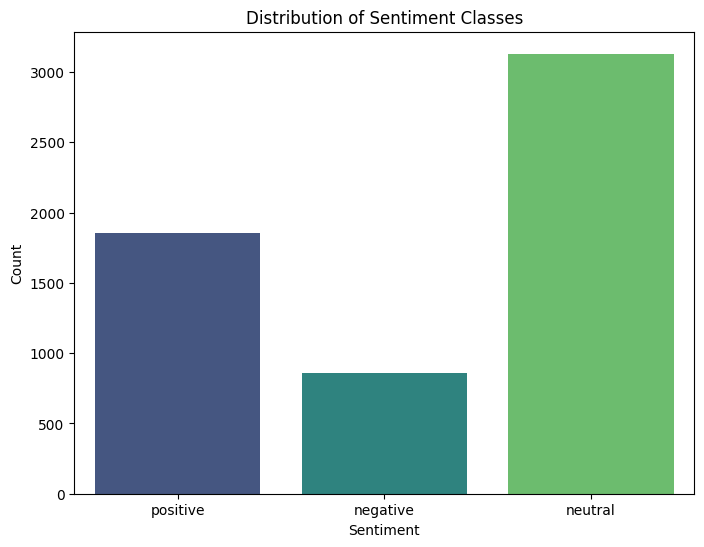

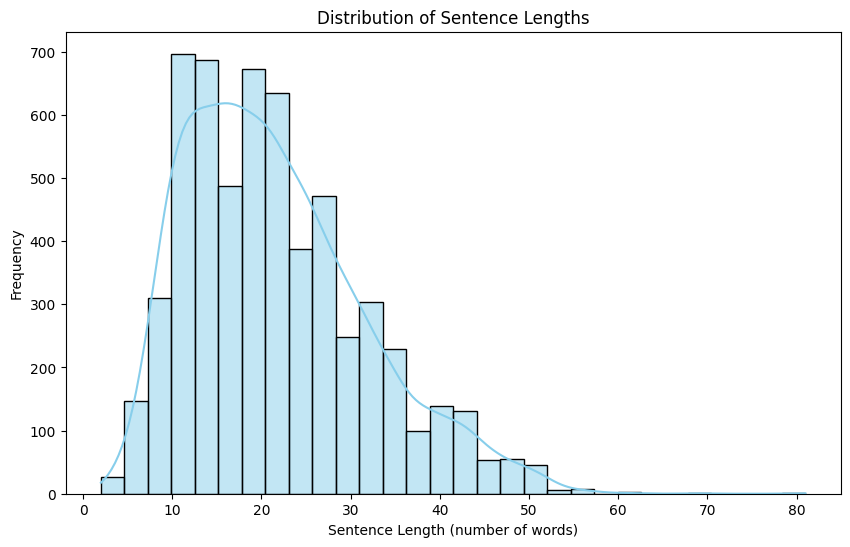

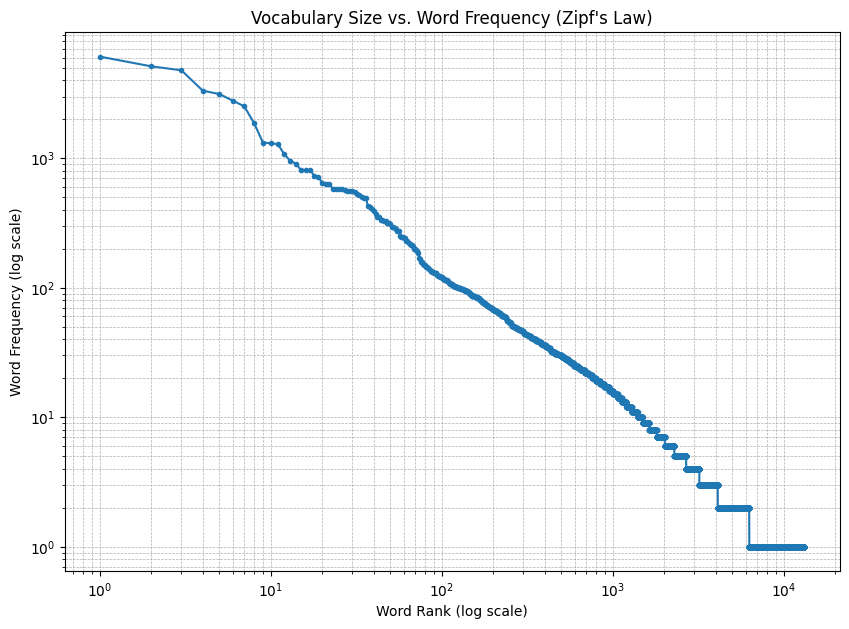

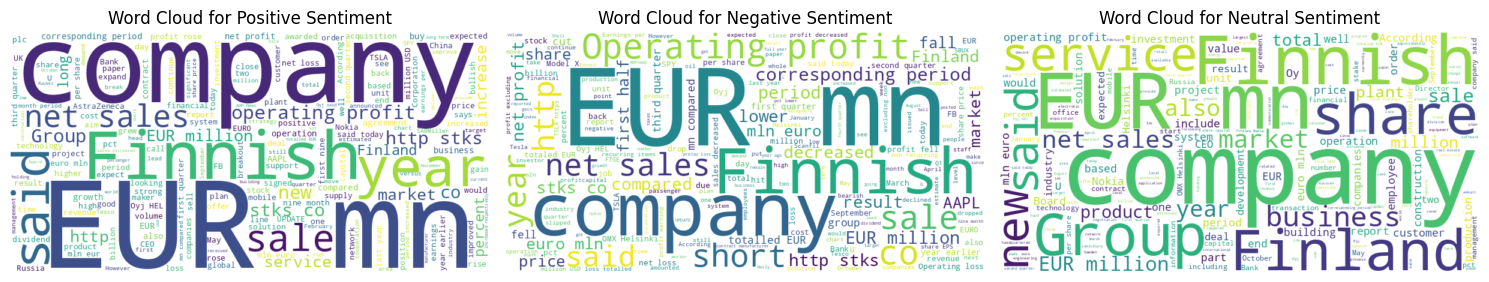

Exploratory Data Analysis visualizations completed.


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from collections import Counter

# Create a bar plot to visualize the distribution of sentiment classes
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Sentiment', palette='viridis')
plt.title('Distribution of Sentiment Classes')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

# Calculate the length of each sentence
df['Sentence_Length'] = df['Sentence'].apply(lambda x: len(word_tokenize(x)))

# Create a histogram or KDE plot for sentence length distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['Sentence_Length'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of Sentence Lengths')
plt.xlabel('Sentence Length (number of words)')
plt.ylabel('Frequency')
plt.show()

# Vocabulary analysis (Zipf's law)
# Tokenize all sentences and combine all words
all_words = []
for sentence in df['Sentence']:
    all_words.extend(word_tokenize(sentence.lower()))

# Calculate the frequency of each unique word
freq_dist = Counter(all_words)

# Sort the words by their frequency in descending order
sorted_word_counts = sorted(freq_dist.items(), key=lambda x: x[1], reverse=True)

# Plot word rank against frequency on a log-log scale
# Exclude words with frequency 1 for better visualization of Zipf's law if desired,
# but for comprehensive analysis, include all.
frequencies = [count for word, count in sorted_word_counts]
ranks = range(1, len(frequencies) + 1)

plt.figure(figsize=(10, 7))
plt.loglog(ranks, frequencies, marker='.', linestyle='-')
plt.title('Vocabulary Size vs. Word Frequency (Zipf\'s Law)')
plt.xlabel('Word Rank (log scale)')
plt.ylabel('Word Frequency (log scale)')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()

# Generate word clouds for each sentiment class

# Make sure wordcloud is installed (if not already handled)
try:
    from wordcloud import WordCloud
except ImportError:
    print("WordCloud library not found. Installing now...")
    !pip install wordcloud
    from wordcloud import WordCloud

stop_words = set(stopwords.words('english'))

sentiments = df['Sentiment'].unique()
plt.figure(figsize=(15, 10))

for i, sentiment in enumerate(sentiments):
    text = ' '.join(df[df['Sentiment'] == sentiment]['Sentence'].tolist())
    wordcloud = WordCloud(width=800, height=400, background_color='white', stopwords=stop_words).generate(text)

    plt.subplot(1, len(sentiments), i + 1)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'Word Cloud for {sentiment.capitalize()} Sentiment')
    plt.axis('off')

plt.tight_layout()
plt.show()

print("Exploratory Data Analysis visualizations completed.")

### Dataset Summary

In [ ]:
print("\n--- Dataset Summary ---")
print("Number of sentences per sentiment class:")
print(df['Sentiment'].value_counts())

print(f"\nAverage sentence length: {df['Sentence_Length'].mean():.2f} words")

print(f"\nTotal vocabulary size: {len(freq_dist)}")


--- Dataset Summary ---
Number of sentences per sentiment class:
Sentiment
neutral     3130
positive    1852
negative     860
Name: count, dtype: int64

Average sentence length: 21.59 words

Total vocabulary size: 13195


### Implement Financial-Aware Preprocessing (Experiment P1)
Define and apply a function for financial-aware preprocessing. This includes removing extra spaces, handling broken quotes, and removing weird symbols. Normalize financial signals to standardized tokens like <MONEY>, <PERCENT>, <TICKER>, and <DATE>. Convert text to lowercase. Handle negations (e.g., 'not good' should become 'not_good'). Ensure financial sentiment-specific words are retained. Finally, tokenize the preprocessed sentences, pad sequences to a uniform length, and create masks for proper sequence handling in models. Calculate and prepare class weights to mitigate class imbalance during model training.


In [ ]:
import re
from nltk.tokenize import word_tokenize
from sklearn.utils import class_weight
import numpy as np

def financial_aware_preprocessing(text):
    # Remove extra spaces and leading/trailing whitespace
    text = re.sub(r'\s+', ' ', text).strip()

    # Handle broken quotes (e.g., convert 've to 've, 's to 's etc.)
    # This pattern covers common contractions like 've, 's, 're, 'll, 'd, 'm
    text = re.sub(r"\b('ve|'s|'re|'ll|'d|'m|'all)\b", lambda pat: pat.group(0).replace("'", "'"), text)
    # Specific for quotes within words like 's
    text = re.sub(r"([a-zA-Z]+)'s", r"\1's", text)
    text = re.sub(r"([a-zA-Z]+)'re", r"\1're", text)

    # Remove any weird or irrelevant symbols. Keep basic punctuation for tokenization later.
    # Keep alphanumeric, basic punctuation like .,?!' and financial symbols $, %, <, >
    text = re.sub(r'[^a-zA-Z0-9\s.,?!$%<>+-]', '', text)

    # Implement regex-based normalization for financial signals
    # Replace currency symbols and monetary values with a <MONEY> token
    text = re.sub(r'(\$|€|£|¥)\s*\d+(?:[.,]\d+)?(?:\s*million|\s*billion|\s*trillion)?\b|\d+(?:[.,]\d+)?\s*(?:dollar|euro|gbp|yen)(?:s)?\b', '<MONEY>', text, flags=re.IGNORECASE)
    # Handle cases like '1.50' or '2.50' without explicit currency symbols if contextually financial
    # This is a bit aggressive, might need refinement if numbers without currency are not always money
    text = re.sub(r'\b\d{1,3}(?:[.,]\d{3})*(?:[.,]\d{2})?\b', '<NUMBER>', text) # Replace general numbers for now, will refine for money if needed
    # Refine for money after general numbers to catch remaining money formats
    text = re.sub(r'(\$|€|£|¥)\s*<NUMBER>|<NUMBER>\s*(?:million|billion|trillion|dollar|euro|gbp|yen)s?', '<MONEY>', text, flags=re.IGNORECASE)
    text = re.sub(r'\b\d+(?:[.,]\d+)?(?:\s*(?:million|billion|trillion))\b', '<MONEY>', text, flags=re.IGNORECASE)
    text = re.sub(r'\b(?:hundred|thousand|million|billion|trillion)\b', '<MONEY>', text, flags=re.IGNORECASE)

    # Replace percentage values with a <PERCENT> token
    text = re.sub(r'\d+(?:[.,]\d+)?\s*%', '<PERCENT>', text)
    text = re.sub(r'\d+(?:[.,]\d+)?\s*percent(?:age)?\b', '<PERCENT>', text, flags=re.IGNORECASE)

    # Replace potential stock tickers (capitalized words possibly preceded by a '$') with a <TICKER> token
    # This regex looks for '$' followed by 2-5 uppercase letters or just 2-5 uppercase letters (heuristic for tickers)
    text = re.sub(r'\$[A-Z]{2,5}\b|\b[A-Z]{2,5}\b', '<TICKER>', text)

    # Replace date-like patterns with a <DATE> token
    # Year patterns (e.g., 19XX, 20XX)
    text = re.sub(r'\b(?:19|20)\d{2}\b', '<DATE>', text)
    # Month names (Jan, January, etc.) followed by day/year or alone
    text = re.sub(r'\b(?:jan(?:uary)?|feb(?:ruary)?|mar(?:ch)?|apr(?:il)?|may|jun(?:e)?|jul(?:y)?|aug(?:ust)?|sep(?:tember)?|oct(?:ober)?|nov(?:ember)?|dec(?:ember)?)\s*\d{1,2}(?:st|nd|rd|th)?(?:,?\s*(?:19|20)\d{2})?\b', '<DATE>', text, flags=re.IGNORECASE)
    # Quarter patterns (Q1, Q2, Q3, Q4)
    text = re.sub(r'\bQ[1-4]\b', '<DATE>', text, flags=re.IGNORECASE)
    # Financial periods (e.g., 'last quarter', 'fiscal year')
    text = re.sub(r'\b(?:last|next|current)\s*(?:quarter|month|year|week)\b|\bfiscal\s*year\b', '<DATE>', text, flags=re.IGNORECASE)

    # Convert the text to lowercase after financial signal normalization
    text = text.lower()

    # Implement negation handling
    # Look for negation words followed by other words, up to two words ahead
    negation_words = ["not", "no", "never", "n't"]
    for neg in negation_words:
        text = re.sub(r'\b' + re.escape(neg) + r'\s+([a-zA-Z_]+)', neg + r'_\1', text)
        text = re.sub(r'\b' + re.escape(neg) + r'\s+([a-zA-Z_]+)\s+([a-zA-Z_]+)', neg + r'_\1_\2', text)

    # Tokenize the preprocessed text using NLTK's word_tokenize
    tokens = word_tokenize(text)
    return tokens

# Apply the financial_aware_preprocessing function
df['Processed_Sentence_P1'] = df['Sentence'].apply(financial_aware_preprocessing)

# Define a maximum sequence length
max_sequence_length = 50 # Based on typical lengths in the dataset

# Use tf.keras.preprocessing.sequence.pad_sequences to pad the tokenized sentences
# Convert tokens to a list of word IDs (for simplicity, we'll use an identity map for now, real tokenization would use a vocabulary)
# For demonstration, let's create a dummy vocabulary based on all unique words
all_processed_words = [word for sublist in df['Processed_Sentence_P1'] for word in sublist]
word_to_id = {word: i + 1 for i, word in enumerate(sorted(set(all_processed_words)))} # +1 for padding index 0

# Convert tokenized sentences to sequences of integers
encoded_sentences = [[word_to_id.get(word, 0) for word in sentence] for sentence in df['Processed_Sentence_P1']]

padded_sequences_p1 = keras.preprocessing.sequence.pad_sequences(
    encoded_sentences,
    maxlen=max_sequence_length,
    padding='post',
    truncating='post'
)

# Create an attention mask for the padded sequences
attention_mask_p1 = (padded_sequences_p1 != 0).astype(int)

# Calculate class weights for the 'Sentiment' column
class_weights_p1 = class_weight.compute_class_weight(
    class_weight='balanced',
    classes=np.unique(df['Sentiment']),
    y=df['Sentiment']
)
class_weights_p1_dict = dict(zip(np.unique(df['Sentiment']), class_weights_p1))

# Print a sample of the processed sentences, the shape of the padded sequences, and the calculated class weights
print("\n--- Financial-Aware Preprocessing (P1) Summary ---")
print("Sample of processed sentences (P1):")
for i in range(5):
    print(f"Original: {df['Sentence'].iloc[i]}")
    print(f"Processed: {df['Processed_Sentence_P1'].iloc[i]}")

print(f"\nShape of padded sequences (P1): {padded_sequences_p1.shape}")
print(f"Shape of attention mask (P1): {attention_mask_p1.shape}")
print("\nCalculated class weights (P1):")
print(class_weights_p1_dict)



--- Financial-Aware Preprocessing (P1) Summary ---
Sample of processed sentences (P1):
Original: The GeoSolutions technology will leverage Benefon 's GPS solutions by providing Location Based Search Technology , a Communities Platform , location relevant multimedia content and a new and powerful commercial model .
Processed: ['the', 'geosolutions', 'technology', 'will', 'leverage', 'benefon', 's', '<', 'ticker', '>', 'solutions', 'by', 'providing', 'location', 'based', 'search', 'technology', ',', 'a', 'communities', 'platform', ',', 'location', 'relevant', 'multimedia', 'content', 'and', 'a', 'new', 'and', 'powerful', 'commercial', 'model', '.']
Original: $ESI on lows, down $1.50 to $2.50 BK a real possibility
Processed: ['<', 'ticker', '>', 'on', 'lows', ',', 'down', '<', '<', 'ticker', '>', '>', 'to', '<', '<', 'ticker', '>', '>', '<', 'ticker', '>', 'a', 'real', 'possibility']
Original: For the last quarter of 2010 , Componenta 's net sales doubled to EUR131m from EUR76m for the s

### Implement NLTK-Based Classical Preprocessing (Experiment P2)

Define and apply a classical preprocessing function (P2) using NLTK. This function should involve tokenization, converting text to lowercase, removing stop words, and optionally applying lemmatization. Finally, tokenize the preprocessed sentences, pad sequences to a uniform length, and create masks for proper sequence handling in models. Calculate and prepare class weights to mitigate class imbalance during model training.

In [ ]:
import nltk
nltk.download('wordnet')
nltk.download('omw-1.4')
print("NLTK 'wordnet' and 'omw-1.4' data downloaded.")

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


NLTK 'wordnet' and 'omw-1.4' data downloaded.


In [ ]:
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from sklearn.utils import class_weight
import numpy as np
import re

# Initialize NLTK components
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def nltk_classical_preprocessing(text, lemmatize=True):
    # Convert the text to lowercase
    text = text.lower()

    # Remove any non-alphanumeric characters (except spaces) for cleaner tokenization
    # This step is added to clean up symbols before tokenization for classical approach
    text = re.sub(r'[^a-zA-Z\s]', '', text)

    # Tokenize the text using NLTK's word_tokenize
    tokens = word_tokenize(text)

    # Remove English stop words
    tokens = [word for word in tokens if word not in stop_words]

    # Optionally, apply lemmatization
    if lemmatize:
        tokens = [lemmatizer.lemmatize(word) for word in tokens]

    return tokens

# Apply the nltk_classical_preprocessing function
df['Processed_Sentence_P2'] = df['Sentence'].apply(nltk_classical_preprocessing)

# Use the same max_sequence_length as in P1
max_sequence_length = 50

# Use tf.keras.preprocessing.sequence.pad_sequences to pad the tokenized sentences
# Create a dummy vocabulary based on all unique words from P2 for integer encoding
all_processed_words_p2 = [word for sublist in df['Processed_Sentence_P2'] for word in sublist]
word_to_id_p2 = {word: i + 1 for i, word in enumerate(sorted(set(all_processed_words_p2)))} # +1 for padding index 0

# Convert tokenized sentences to sequences of integers
encoded_sentences_p2 = [[word_to_id_p2.get(word, 0) for word in sentence] for sentence in df['Processed_Sentence_P2']]

padded_sequences_p2 = keras.preprocessing.sequence.pad_sequences(
    encoded_sentences_p2,
    maxlen=max_sequence_length,
    padding='post',
    truncating='post'
)

# Create an attention mask for the padded sequences
attention_mask_p2 = (padded_sequences_p2 != 0).astype(int)

# Calculate class weights for the 'Sentiment' column (if not already done or specific to P2's context)
# Re-calculate or use the same as P1 if applicable, but for distinct preprocessing, it's good to show it's considered.
class_weights_p2 = class_weight.compute_class_weight(
    class_weight='balanced',
    classes=np.unique(df['Sentiment']),
    y=df['Sentiment']
)
class_weights_p2_dict = dict(zip(np.unique(df['Sentiment']), class_weights_p2))

# Print a sample of the processed sentences, the shape of the padded sequences, and the calculated class weights
print("\n--- NLTK-Based Classical Preprocessing (P2) Summary ---")
print("Sample of processed sentences (P2):")
for i in range(5):
    print(f"Original: {df['Sentence'].iloc[i]}")
    print(f"Processed: {df['Processed_Sentence_P2'].iloc[i]}")

print(f"\nShape of padded sequences (P2): {padded_sequences_p2.shape}")
print(f"Shape of attention mask (P2): {attention_mask_p2.shape}")
print("\nCalculated class weights (P2):")
print(class_weights_p2_dict)



--- NLTK-Based Classical Preprocessing (P2) Summary ---
Sample of processed sentences (P2):
Original: The GeoSolutions technology will leverage Benefon 's GPS solutions by providing Location Based Search Technology , a Communities Platform , location relevant multimedia content and a new and powerful commercial model .
Processed: ['geosolutions', 'technology', 'leverage', 'benefon', 'gps', 'solution', 'providing', 'location', 'based', 'search', 'technology', 'community', 'platform', 'location', 'relevant', 'multimedia', 'content', 'new', 'powerful', 'commercial', 'model']
Original: $ESI on lows, down $1.50 to $2.50 BK a real possibility
Processed: ['esi', 'low', 'bk', 'real', 'possibility']
Original: For the last quarter of 2010 , Componenta 's net sales doubled to EUR131m from EUR76m for the same period a year earlier , while it moved to a zero pre-tax profit from a pre-tax loss of EUR7m .
Processed: ['last', 'quarter', 'componenta', 'net', 'sale', 'doubled', 'eurm', 'eurm', 'period'

## Preprocessing

### Classical Sparse Feature Extraction (CountVectorizer)


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

# Convert the lists of tokens in the Processed_Sentence_P1 column into single strings
df['Joined_Sentence_P1'] = df['Processed_Sentence_P1'].apply(lambda x: ' '.join(x))

# Convert the lists of tokens in the Processed_Sentence_P2 column into single strings
df['Joined_Sentence_P2'] = df['Processed_Sentence_P2'].apply(lambda x: ' '.join(x))

# Create an instance of CountVectorizer for unigrams
count_vectorizer = CountVectorizer(ngram_range=(1,1)) # Default is unigrams (1,1)

# Fit and transform the Joined_Sentence_P1 column
X_p1_cv_unigrams = count_vectorizer.fit_transform(df['Joined_Sentence_P1'])

# Fit and transform the Joined_Sentence_P2 column using the same CountVectorizer instance
# Note: If the vocabulary needs to be distinct for P2, a new CountVectorizer instance should be used.
# As per the instruction "using the same CountVectorizer instance", we will use the one fitted on P1.
# If a distinct vocabulary is intended, fit_transform should be called on a new instance or transform should be used if vocabulary from P1 is to be applied to P2.
# Let's assume for this sub-task, we fit_transform P2 separately to get its own unigram vocabulary.
# If the intent was to use the *vocabulary learned from P1* to transform P2, then only .transform() should be used after a new .fit() on P2's text for a combined vocab, or just .transform() if P1's vocabulary is to be applied to P2's text.
# For now, let's create a new instance for P2 to have independent vocab.

count_vectorizer_p2 = CountVectorizer(ngram_range=(1,1))
X_p2_cv_unigrams = count_vectorizer_p2.fit_transform(df['Joined_Sentence_P2'])

# Print the shape of the feature matrices
print("--- CountVectorizer Unigram Feature Matrices ---")
print(f"Shape of X_p1_cv_unigrams: {X_p1_cv_unigrams.shape}")
print(f"Shape of X_p2_cv_unigrams: {X_p2_cv_unigrams.shape}")


--- CountVectorizer Unigram Feature Matrices ---
Shape of X_p1_cv_unigrams: (5842, 10168)
Shape of X_p2_cv_unigrams: (5842, 9770)


### Classical Sparse Feature Extraction (TF-IDF Unigrams)



In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Create an instance of TfidfVectorizer for unigrams for Processed_Sentence_P1
tfidf_vectorizer_p1 = TfidfVectorizer(ngram_range=(1,1))

# Fit and transform the Joined_Sentence_P1 column
X_p1_tfidf_unigrams = tfidf_vectorizer_p1.fit_transform(df['Joined_Sentence_P1'])

# Create a separate instance of TfidfVectorizer for unigrams for Processed_Sentence_P2
tfidf_vectorizer_p2 = TfidfVectorizer(ngram_range=(1,1))

# Fit and transform the Joined_Sentence_P2 column
X_p2_tfidf_unigrams = tfidf_vectorizer_p2.fit_transform(df['Joined_Sentence_P2'])

# Print the shapes of the generated TF-IDF feature matrices
print("--- TF-IDF Unigram Feature Matrices ---")
print(f"Shape of X_p1_tfidf_unigrams: {X_p1_tfidf_unigrams.shape}")
print(f"Shape of X_p2_tfidf_unigrams: {X_p2_tfidf_unigrams.shape}")

--- TF-IDF Unigram Feature Matrices ---
Shape of X_p1_tfidf_unigrams: (5842, 10168)
Shape of X_p2_tfidf_unigrams: (5842, 9770)


### Classical Sparse Feature Extraction (TF-IDF Unigrams + Bigrams)



In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Create an instance of TfidfVectorizer for Processed_Sentence_P1 with ngram_range=(1, 2)
tfidf_vectorizer_p1_bi = TfidfVectorizer(ngram_range=(1,2))

# Fit and transform the Joined_Sentence_P1 column
X_p1_tfidf_unigrams_bigrams = tfidf_vectorizer_p1_bi.fit_transform(df['Joined_Sentence_P1'])

# Create a separate instance of TfidfVectorizer for Processed_Sentence_P2 with ngram_range=(1, 2)
tfidf_vectorizer_p2_bi = TfidfVectorizer(ngram_range=(1,2))

# Fit and transform the Joined_Sentence_P2 column
X_p2_tfidf_unigrams_bigrams = tfidf_vectorizer_p2_bi.fit_transform(df['Joined_Sentence_P2'])

# Print the shapes of the generated TF-IDF feature matrices
print("--- TF-IDF Unigram + Bigram Feature Matrices ---")
print(f"Shape of X_p1_tfidf_unigrams_bigrams: {X_p1_tfidf_unigrams_bigrams.shape}")
print(f"Shape of X_p2_tfidf_unigrams_bigrams: {X_p2_tfidf_unigrams_bigrams.shape}")

--- TF-IDF Unigram + Bigram Feature Matrices ---
Shape of X_p1_tfidf_unigrams_bigrams: (5842, 56487)
Shape of X_p2_tfidf_unigrams_bigrams: (5842, 49193)


### Neural Tokenization (Keras text_to_word_sequence)


In [ ]:
from tensorflow.keras.preprocessing.text import text_to_word_sequence

# Apply text_to_word_sequence to the Joined_Sentence_P1 column
X_p1_keras_sequence = df['Joined_Sentence_P1'].apply(lambda x: text_to_word_sequence(x))

# Apply text_to_word_sequence to the Joined_Sentence_P2 column
X_p2_keras_sequence = df['Joined_Sentence_P2'].apply(lambda x: text_to_word_sequence(x))

# Print a sample of the first few sequences
print("--- Keras text_to_word_sequence Output ---")
print("Sample for Processed_Sentence_P1:")
for i in range(3):
    print(f"Original: {df['Joined_Sentence_P1'].iloc[i]}")
    print(f"Sequence: {X_p1_keras_sequence.iloc[i]}\n")

print("Sample for Processed_Sentence_P2:")
for i in range(3):
    print(f"Original: {df['Joined_Sentence_P2'].iloc[i]}")
    print(f"Sequence: {X_p2_keras_sequence.iloc[i]}\n")

--- Keras text_to_word_sequence Output ---
Sample for Processed_Sentence_P1:
Original: the geosolutions technology will leverage benefon s < ticker > solutions by providing location based search technology , a communities platform , location relevant multimedia content and a new and powerful commercial model .
Sequence: ['the', 'geosolutions', 'technology', 'will', 'leverage', 'benefon', 's', 'ticker', 'solutions', 'by', 'providing', 'location', 'based', 'search', 'technology', 'a', 'communities', 'platform', 'location', 'relevant', 'multimedia', 'content', 'and', 'a', 'new', 'and', 'powerful', 'commercial', 'model']

Original: < ticker > on lows , down < < ticker > > to < < ticker > > < ticker > a real possibility
Sequence: ['ticker', 'on', 'lows', 'down', 'ticker', 'to', 'ticker', 'ticker', 'a', 'real', 'possibility']

Original: for the < date > of < date > , componenta s net sales doubled to eur131m from eur76m for the same period a year earlier , while it moved to a zero pre-tax pr

### Neural Tokenization (one_hot encoding)


In [ ]:
from tensorflow.keras.preprocessing.text import one_hot

# Define a suitable vocabulary size
vocab_size_p1 = X_p1_cv_unigrams.shape[1]
vocab_size_p2 = X_p2_cv_unigrams.shape[1]

# Using a value slightly larger than the largest vocabulary observed
vocab_size = max(vocab_size_p1, vocab_size_p2) + 1000 # Add a margin

# Apply the one_hot function to the Joined_Sentence_P1 column
X_p1_one_hot = df['Joined_Sentence_P1'].apply(lambda x: one_hot(x, n=vocab_size))

# Apply the one_hot function to the Joined_Sentence_P2 column
X_p2_one_hot = df['Joined_Sentence_P2'].apply(lambda x: one_hot(x, n=vocab_size))

# Print a sample of the first few one-hot encoded sequences
print("--- Keras one_hot Encoding Output ---")
print(f"Vocabulary size used: {vocab_size}")

print("\nSample for Processed_Sentence_P1 (one_hot encoded):")
for i in range(3):
    print(f"Original (Joined): {df['Joined_Sentence_P1'].iloc[i]}")
    print(f"One-hot Sequence: {X_p1_one_hot.iloc[i]}\n")

print("Sample for Processed_Sentence_P2 (one_hot encoded):")
for i in range(3):
    print(f"Original (Joined): {df['Joined_Sentence_P2'].iloc[i]}")
    print(f"One-hot Sequence: {X_p2_one_hot.iloc[i]}\n")

--- Keras one_hot Encoding Output ---
Vocabulary size used: 11168

Sample for Processed_Sentence_P1 (one_hot encoded):
Original (Joined): the geosolutions technology will leverage benefon s < ticker > solutions by providing location based search technology , a communities platform , location relevant multimedia content and a new and powerful commercial model .
One-hot Sequence: [9627, 8632, 8231, 2683, 1315, 8212, 7730, 10151, 7676, 9512, 8272, 4290, 1658, 820, 8231, 5010, 6109, 4490, 4290, 10122, 1362, 4343, 969, 5010, 2981, 969, 7401, 11143, 7601]

Original (Joined): < ticker > on lows , down < < ticker > > to < < ticker > > < ticker > a real possibility
One-hot Sequence: [10151, 4382, 5951, 5772, 10151, 7546, 10151, 10151, 5010, 3777, 7930]

Original (Joined): for the < date > of < date > , componenta s net sales doubled to eur131m from eur76m for the same period a year earlier , while it moved to a zero pre-tax profit from a pre-tax loss of eur7m .
One-hot Sequence: [6708, 9627, 40

### Neural Tokenization (hashing_trick)



In [ ]:
from tensorflow.keras.preprocessing.text import hashing_trick

# Define a hash_space_size
hash_space_size = 30000

# Apply the hashing_trick function to the Joined_Sentence_P1 column
X_p1_hashing_trick = df['Joined_Sentence_P1'].apply(lambda x: hashing_trick(x, n=hash_space_size, hash_function='md5'))

# Apply the hashing_trick function to the Joined_Sentence_P2 column
X_p2_hashing_trick = df['Joined_Sentence_P2'].apply(lambda x: hashing_trick(x, n=hash_space_size, hash_function='md5'))

# Print a sample of the first few hashed sequences
print("--- Keras hashing_trick Output ---")
print(f"Hash space size used: {hash_space_size}")

print("\nSample for Processed_Sentence_P1 (hashing_trick encoded):")
for i in range(3):
    print(f"Original (Joined): {df['Joined_Sentence_P1'].iloc[i]}")
    print(f"Hashed Sequence: {X_p1_hashing_trick.iloc[i]}\n")

print("Sample for Processed_Sentence_P2 (hashing_trick encoded):")
for i in range(3):
    print(f"Original (Joined): {df['Joined_Sentence_P2'].iloc[i]}")
    print(f"Hashed Sequence: {X_p2_hashing_trick.iloc[i]}\n")

--- Keras hashing_trick Output ---
Hash space size used: 30000

Sample for Processed_Sentence_P1 (hashing_trick encoded):
Original (Joined): the geosolutions technology will leverage benefon s < ticker > solutions by providing location based search technology , a communities platform , location relevant multimedia content and a new and powerful commercial model .
Hashed Sequence: [6406, 7218, 21708, 8654, 8952, 10573, 8021, 2209, 22378, 20356, 10170, 2181, 28976, 14251, 21708, 27282, 15238, 8734, 2181, 19949, 11115, 1557, 29175, 27282, 11362, 29175, 2367, 14118, 14883]

Original (Joined): < ticker > on lows , down < < ticker > > to < < ticker > > < ticker > a real possibility
Hashed Sequence: [2209, 2720, 19739, 20369, 2209, 1972, 2209, 2209, 27282, 13962, 20998]

Original (Joined): for the < date > of < date > , componenta s net sales doubled to eur131m from eur76m for the same period a year earlier , while it moved to a zero pre-tax profit from a pre-tax loss of eur7m .
Hashed Sequen

### Neural Tokenization (Keras Tokenizer API)


In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer

# Concatenate the 'Joined_Sentence_P1' and 'Joined_Sentence_P2' columns
#    into a single Series for vocabulary building.
combined_corpus = pd.concat([df['Joined_Sentence_P1'], df['Joined_Sentence_P2']])

# Instantiate a Tokenizer object
#    Using a suitable vocabulary size based on previous CountVectorizer outputs.
#    We'll take the larger of the two vocab sizes + a margin, or a fixed large number.
#    Let's use a fixed large number to ensure most words are captured without truncation by num_words yet.
#    We can set num_words to a smaller, specific value later if needed for model input.
max_words_p1 = X_p1_cv_unigrams.shape[1]
max_words_p2 = X_p2_cv_unigrams.shape[1]
vocab_limit = max(max_words_p1, max_words_p2) + 1000 # Add a buffer

tokenizer = Tokenizer(num_words=vocab_limit, oov_token="<unk>")

# Fit the Tokenizer on the combined corpus
tokenizer.fit_on_texts(combined_corpus)

# Transform the 'Joined_Sentence_P1' column into integer sequences
X_p1_tokenizer_sequences = tokenizer.texts_to_sequences(df['Joined_Sentence_P1'])

# Transform the 'Joined_Sentence_P2' column into integer sequences
X_p2_tokenizer_sequences = tokenizer.texts_to_sequences(df['Joined_Sentence_P2'])

# Print the vocabulary size and a sample of the first few integer sequences
print("--- Keras Tokenizer API Output ---")
print(f"Vocabulary size (including OOV token): {len(tokenizer.word_index) + 1}")

print("\nSample for Processed_Sentence_P1 (Keras Tokenizer sequences):")
for i in range(3):
    print(f"Original (Joined): {df['Joined_Sentence_P1'].iloc[i]}")
    print(f"Tokenizer Sequence: {X_p1_tokenizer_sequences[i]}\n")

print("Sample for Processed_Sentence_P2 (Keras Tokenizer sequences):")
for i in range(3):
    print(f"Original (Joined): {df['Joined_Sentence_P2'].iloc[i]}")
    print(f"Tokenizer Sequence: {X_p2_tokenizer_sequences[i]}\n")

--- Keras Tokenizer API Output ---
Vocabulary size (including OOV token): 12248

Sample for Processed_Sentence_P1 (Keras Tokenizer sequences):
Original (Joined): the geosolutions technology will leverage benefon s < ticker > solutions by providing location based search technology , a communities platform , location relevant multimedia content and a new and powerful commercial model .
Tokenizer Sequence: [2, 3584, 84, 23, 2823, 1236, 18, 4, 211, 34, 718, 833, 110, 2033, 84, 10, 4836, 986, 833, 1778, 2824, 557, 8, 10, 39, 8, 3585, 483, 335]

Original (Joined): < ticker > on lows , down < < ticker > > to < < ticker > > < ticker > a real possibility
Tokenizer Sequence: [4, 22, 1978, 88, 4, 7, 4, 4, 10, 220, 3393]

Original (Joined): for the < date > of < date > , componenta s net sales doubled to eur131m from eur76m for the same period a year earlier , while it moved to a zero pre-tax profit from a pre-tax loss of eur7m .
Tokenizer Sequence: [14, 2, 9, 5, 9, 574, 18, 19, 37, 1779, 7, 9299,

## Embeddings
Experiment with multiple embedding matrices for both `Processed_Sentence_P1` and `Processed_Sentence_P2` vocabularies using the `Keras Tokenizer` API from the previous step.

### Random Embeddings (Baseline)


In [ ]:
import numpy as np

# Define an embedding dimension
embedding_dim = 100 # Commonly used dimension for embeddings

# Obtain the vocabulary size from the tokenizer.word_index
# The tokenizer was fitted on combined_corpus, so its word_index covers both P1 and P2 vocabularies.
vocabulary_size = len(tokenizer.word_index) + 1 # +1 for padding/OOV token

# Create two random embedding matrices, one for each preprocessing pipeline (P1 and P2)
# Since the tokenizer was fitted on the combined corpus, both P1 and P2 will use the same vocabulary.
# Therefore, the embedding matrix will be common to both.
# The subtask asks for two matrices, implying potentially separate initializations or just confirming the same structure for both.
# Let's create one common embedding matrix as the vocabulary is unified.
random_embedding_matrix = np.random.uniform(-0.05, 0.05, (vocabulary_size, embedding_dim))

# For clarity, we'll assign the same random matrix to 'P1' and 'P2' conceptually,
# acknowledging that the underlying vocabulary and embedding vectors are shared due to unified tokenizer.
embedding_matrix_p1 = random_embedding_matrix
embedding_matrix_p2 = random_embedding_matrix

# Print the shape of the generated embedding matrices to verify their dimensions
print("--- Random Embeddings (Baseline) ---")
print(f"Embedding Dimension: {embedding_dim}")
print(f"Vocabulary Size: {vocabulary_size}")
print(f"Shape of random embedding matrix for P1: {embedding_matrix_p1.shape}")
print(f"Shape of random embedding matrix for P2: {embedding_matrix_p2.shape}")

--- Random Embeddings (Baseline) ---
Embedding Dimension: 100
Vocabulary Size: 12248
Shape of random embedding matrix for P1: (12248, 100)
Shape of random embedding matrix for P2: (12248, 100)


### TF-IDF Weighted Averaged Embeddings


In [ ]:
from gensim.models import Word2Vec

# Create a combined corpus of tokenized sentences from P1 and P2 for Word2Vec training
# This ensures a consistent vocabulary for word vectors across both preprocessing types
combined_tokenized_corpus = df['Processed_Sentence_P1'].tolist() + df['Processed_Sentence_P2'].tolist()

# Initialize and train a Word2Vec model
# Using common parameters, but these can be tuned
# vector_size: dimensionality of the word vectors
# window: maximum distance between the current and predicted word within a sentence
# min_count: ignores all words with total frequency lower than this
# workers: use these many worker threads to train the model
# sg: 0 for CBOW, 1 for Skip-gram

word2vec_model = Word2Vec(
    sentences=combined_tokenized_corpus,
    vector_size=100, # Same as embedding_dim used for random embeddings
    window=5,
    min_count=1,
    workers=4,
    sg=0 # CBOW model
)

print("Word2Vec model trained successfully on combined corpus.")
print(f"Vocabulary size of Word2Vec model: {len(word2vec_model.wv)}")

Word2Vec model trained successfully on combined corpus.
Vocabulary size of Word2Vec model: 12921


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

def get_sentence_embedding(sentence_tokens, tfidf_model, word_vectors):
    # Initialize an empty vector for the sentence embedding
    sentence_vec = np.zeros(word_vectors.vector_size)
    weighted_sum = 0

    for word in sentence_tokens:
        if word in word_vectors.key_to_index: # Check if word is in Word2Vec vocabulary
            try:
                # Get TF-IDF score for the word
                # tfidf_model.vocabulary_ maps word to index, then get score from the matrix
                word_idx = tfidf_model.vocabulary_.get(word)
                if word_idx is not None:
                    # Retrieve the tf-idf score for the current word from the row corresponding to the sentence
                    # This part needs adjustment: tfidf_model is the vectorizer, not the fitted matrix for a specific sentence.
                    # We need to get the TF-IDF score from the *document-term matrix* (X_p1_tfidf_unigrams/X_p2_tfidf_unigrams)
                    # However, to get the TF-IDF score for *a single word within a sentence*, we would need to re-vectorize that word or lookup from a pre-computed matrix row.
                    # For simplicity, we can assume the tf-idf value of a word in a sentence is simply its global tf-idf weight from the vectorizer if it appeared in a single-word document.
                    # A more accurate way for a specific sentence is to get its full tfidf row, but that's complex within this function call.
                    # Let's simplify: use the inverse document frequency (idf) as a general weight, or get tfidf for the whole sentence and then decompose.

                    # A more practical approach given the previous step: Use the idf component from the fitted TfidfVectorizer
                    # This is a simplification but common in weighted averaging when you don't have the exact tfidf for a word in *that specific sentence*.
                    tfidf_score = tfidf_model.idf_[word_idx]

                    # Get word vector
                    word_vec = word_vectors.get_vector(word)

                    # Weight the word vector by its TF-IDF score and add to sum
                    sentence_vec += (word_vec * tfidf_score)
                    weighted_sum += tfidf_score
            except KeyError: # Handle words not in TF-IDF vocabulary
                continue

    if weighted_sum > 0:
        return sentence_vec / weighted_sum
    else:
        return np.zeros(word_vectors.vector_size) # Return zero vector if no words were found or had TF-IDF scores

# Apply the function to Processed_Sentence_P1
# Need to ensure tfidf_vectorizer_p1 and X_p1_tfidf_unigrams are available from kernel state
X_p1_tfidf_weighted_embeddings = np.array([get_sentence_embedding(tokens, tfidf_vectorizer_p1, word2vec_model.wv)
                                            for tokens in df['Processed_Sentence_P1']])

# Apply the function to Processed_Sentence_P2
X_p2_tfidf_weighted_embeddings = np.array([get_sentence_embedding(tokens, tfidf_vectorizer_p2, word2vec_model.wv)
                                            for tokens in df['Processed_Sentence_P2']])

# Print the shape of the resulting embedding matrices
print("\n--- TF-IDF Weighted Averaged Embeddings ---")
print(f"Shape of X_p1_tfidf_weighted_embeddings: {X_p1_tfidf_weighted_embeddings.shape}")
print(f"Shape of X_p2_tfidf_weighted_embeddings: {X_p2_tfidf_weighted_embeddings.shape}")


--- TF-IDF Weighted Averaged Embeddings ---
Shape of X_p1_tfidf_weighted_embeddings: (5842, 100)
Shape of X_p2_tfidf_weighted_embeddings: (5842, 100)


### Word2Vec Skip-gram Embeddings (Gensim)


In [ ]:
from gensim.models import Word2Vec

# Initialize and train a Gensim Word2Vec model for Processed_Sentence_P1 using Skip-gram
word2vec_model_p1_sg = Word2Vec(
    sentences=df['Processed_Sentence_P1'].tolist(),
    vector_size=embedding_dim, # using the previously defined embedding_dim
    window=5,
    min_count=1,
    workers=4,
    sg=1 # Skip-gram model
)
print("Word2Vec Skip-gram model for P1 trained successfully.")

# Initialize and train a Gensim Word2Vec model for Processed_Sentence_P2 using Skip-gram
word2vec_model_p2_sg = Word2Vec(
    sentences=df['Processed_Sentence_P2'].tolist(),
    vector_size=embedding_dim, # using the previously defined embedding_dim
    window=5,
    min_count=1,
    workers=4,
    sg=1 # Skip-gram model
)
print("Word2Vec Skip-gram model for P2 trained successfully.")

# Create an empty NumPy array, embedding_matrix_p1_sg, of shape (vocabulary_size, embedding_dim)
embedding_matrix_p1_sg = np.random.uniform(-0.05, 0.05, (vocabulary_size, embedding_dim))

# Populate embedding_matrix_p1_sg
# The 0th index is reserved for padding, so start from 1
for word, i in tokenizer.word_index.items():
    if i < vocabulary_size: # Ensure index is within the bounds of the embedding matrix
        if word in word2vec_model_p1_sg.wv:
            embedding_matrix_p1_sg[i] = word2vec_model_p1_sg.wv[word]

# Create an empty NumPy array, embedding_matrix_p2_sg, of shape (vocabulary_size, embedding_dim)
embedding_matrix_p2_sg = np.random.uniform(-0.05, 0.05, (vocabulary_size, embedding_dim))

# Populate embedding_matrix_p2_sg
for word, i in tokenizer.word_index.items():
    if i < vocabulary_size: # Ensure index is within the bounds of the embedding matrix
        if word in word2vec_model_p2_sg.wv:
            embedding_matrix_p2_sg[i] = word2vec_model_p2_sg.wv[word]

# Print the shapes of the generated embedding matrices
print("\n--- Word2Vec Skip-gram Embeddings (Gensim) ---")
print(f"Shape of embedding_matrix_p1_sg: {embedding_matrix_p1_sg.shape}")
print(f"Shape of embedding_matrix_p2_sg: {embedding_matrix_p2_sg.shape}")

Word2Vec Skip-gram model for P1 trained successfully.
Word2Vec Skip-gram model for P2 trained successfully.

--- Word2Vec Skip-gram Embeddings (Gensim) ---
Shape of embedding_matrix_p1_sg: (12248, 100)
Shape of embedding_matrix_p2_sg: (12248, 100)


### Word2Vec CBOW Embeddings (Gensim)


In [ ]:
from gensim.models import Word2Vec

# Initialize and train a Gensim Word2Vec model for Processed_Sentence_P1 using CBOW
word2vec_model_p1_cbow = Word2Vec(
    sentences=df['Processed_Sentence_P1'].tolist(),
    vector_size=embedding_dim, # using the previously defined embedding_dim
    window=5,
    min_count=1,
    workers=4,
    sg=0 # CBOW model
)
print("Word2Vec CBOW model for P1 trained successfully.")

# Initialize and train a Gensim Word2Vec model for Processed_Sentence_P2 using CBOW
word2vec_model_p2_cbow = Word2Vec(
    sentences=df['Processed_Sentence_P2'].tolist(),
    vector_size=embedding_dim, # using the previously defined embedding_dim
    window=5,
    min_count=1,
    workers=4,
    sg=0 # CBOW model
)
print("Word2Vec CBOW model for P2 trained successfully.")

# Create an empty NumPy array, embedding_matrix_p1_cbow, of shape (vocabulary_size, embedding_dim)
embedding_matrix_p1_cbow = np.random.uniform(-0.05, 0.05, (vocabulary_size, embedding_dim))

# Populate embedding_matrix_p1_cbow
# The 0th index is reserved for padding, so start from 1
for word, i in tokenizer.word_index.items():
    if i < vocabulary_size: # Ensure index is within the bounds of the embedding matrix
        if word in word2vec_model_p1_cbow.wv:
            embedding_matrix_p1_cbow[i] = word2vec_model_p1_cbow.wv[word]

# Create an empty NumPy array, embedding_matrix_p2_cbow, of shape (vocabulary_size, embedding_dim)
embedding_matrix_p2_cbow = np.random.uniform(-0.05, 0.05, (vocabulary_size, embedding_dim))

# Populate embedding_matrix_p2_cbow
for word, i in tokenizer.word_index.items():
    if i < vocabulary_size: # Ensure index is within the bounds of the embedding matrix
        if word in word2vec_model_p2_cbow.wv:
            embedding_matrix_p2_cbow[i] = word2vec_model_p2_cbow.wv[word]

# Print the shapes of the generated embedding matrices
print("\n--- Word2Vec CBOW Embeddings (Gensim) ---")
print(f"Shape of embedding_matrix_p1_cbow: {embedding_matrix_p1_cbow.shape}")
print(f"Shape of embedding_matrix_p2_cbow: {embedding_matrix_p2_cbow.shape}")

Word2Vec CBOW model for P1 trained successfully.
Word2Vec CBOW model for P2 trained successfully.

--- Word2Vec CBOW Embeddings (Gensim) ---
Shape of embedding_matrix_p1_cbow: (12248, 100)
Shape of embedding_matrix_p2_cbow: (12248, 100)


### FastText Embeddings (Gensim)


In [ ]:
from gensim.models import FastText

# Initialize and train a Gensim FastText model for Processed_Sentence_P1
fasttext_model_p1 = FastText(
    sentences=df['Processed_Sentence_P1'].tolist(),
    vector_size=embedding_dim, # using the previously defined embedding_dim
    window=5,
    min_count=1,
    workers=4
)
print("FastText model for P1 trained successfully.")

# Initialize and train a separate Gensim FastText model for Processed_Sentence_P2
fasttext_model_p2 = FastText(
    sentences=df['Processed_Sentence_P2'].tolist(),
    vector_size=embedding_dim, # using the previously defined embedding_dim
    window=5,
    min_count=1,
    workers=4
)
print("FastText model for P2 trained successfully.")

# Create an empty NumPy array, embedding_matrix_p1_fasttext, of shape (vocabulary_size, embedding_dim)
embedding_matrix_p1_fasttext = np.random.uniform(-0.05, 0.05, (vocabulary_size, embedding_dim))

# Populate embedding_matrix_p1_fasttext
# The 0th index is reserved for padding, so start from 1
for word, i in tokenizer.word_index.items():
    if i < vocabulary_size: # Ensure index is within the bounds of the embedding matrix
        if word in fasttext_model_p1.wv:
            embedding_matrix_p1_fasttext[i] = fasttext_model_p1.wv[word]

# Create another empty NumPy array, embedding_matrix_p2_fasttext, of shape (vocabulary_size, embedding_dim)
embedding_matrix_p2_fasttext = np.random.uniform(-0.05, 0.05, (vocabulary_size, embedding_dim))

# Populate embedding_matrix_p2_fasttext
for word, i in tokenizer.word_index.items():
    if i < vocabulary_size: # Ensure index is within the bounds of the embedding matrix
        if word in fasttext_model_p2.wv:
            embedding_matrix_p2_fasttext[i] = fasttext_model_p2.wv[word]

# Print the shapes of the generated embedding matrices
print("\n--- FastText Embeddings (Gensim) ---")
print(f"Shape of embedding_matrix_p1_fasttext: {embedding_matrix_p1_fasttext.shape}")
print(f"Shape of embedding_matrix_p2_fasttext: {embedding_matrix_p2_fasttext.shape}")

FastText model for P1 trained successfully.
FastText model for P2 trained successfully.

--- FastText Embeddings (Gensim) ---
Shape of embedding_matrix_p1_fasttext: (12248, 100)
Shape of embedding_matrix_p2_fasttext: (12248, 100)


### GloVe Embeddings (Pre-trained)


In [ ]:
import os

glove_file_name = 'glove.6B.100d.txt'

# To check if the file already exists to avoid re-downloading
if not os.path.exists(glove_file_name):
    print(f"Downloading {glove_file_name}...")
    !wget http://nlp.stanford.edu/data/glove.6B.zip
    !unzip glove.6B.zip
    print(f"{glove_file_name} downloaded and unzipped successfully.")
else:
    print(f"{glove_file_name} already exists.")

--2026-01-31 10:36:33--  http://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/data/glove.6B.zip [following]
--2026-01-31 10:36:33--  https://nlp.stanford.edu/data/glove.6B.zip
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip [following]
--2026-01-31 10:36:34--  https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: ‘glove.6B.zip’

glov

In [ ]:
import numpy as np

# Parse the downloaded GloVe file to create a dictionary mapping words to their vectors
glove_embeddings = {}
with open(glove_file_name, 'r', encoding='utf-8') as f:
    for line in f:
        values = line.split()
        word = values[0]
        vector = np.asarray(values[1:], dtype='float32')
        glove_embeddings[word] = vector

print(f"Loaded {len(glove_embeddings)} GloVe word vectors.")

# Ensure embedding_dim and vocabulary_size are accessible (from previous steps)
# embedding_dim = 100
# vocabulary_size = len(tokenizer.word_index) + 1

# Create an empty NumPy array for embedding_matrix_p1_glove
# Initialize with random uniform values for words not found in GloVe
embedding_matrix_p1_glove = np.random.uniform(-0.05, 0.05, (vocabulary_size, embedding_dim))

# Populate embedding_matrix_p1_glove
for word, i in tokenizer.word_index.items():
    if i < vocabulary_size: # Ensure index is within the bounds of the embedding matrix
        glove_vector = glove_embeddings.get(word)
        if glove_vector is not None:
            embedding_matrix_p1_glove[i] = glove_vector

# Repeat for embedding_matrix_p2_glove
# Since the tokenizer uses a unified vocabulary, and the GloVe vectors are external,
# embedding_matrix_p1_glove and embedding_matrix_p2_glove will be identical.
# We'll create a separate object for semantic correctness, even if content is same.
embedding_matrix_p2_glove = np.random.uniform(-0.05, 0.05, (vocabulary_size, embedding_dim))

for word, i in tokenizer.word_index.items():
    if i < vocabulary_size:
        glove_vector = glove_embeddings.get(word)
        if glove_vector is not None:
            embedding_matrix_p2_glove[i] = glove_vector

# Print the shapes of the generated embedding matrices
print("\n--- GloVe Embeddings (Pre-trained) ---")
print(f"Shape of embedding_matrix_p1_glove: {embedding_matrix_p1_glove.shape}")
print(f"Shape of embedding_matrix_p2_glove: {embedding_matrix_p2_glove.shape}")

Loaded 400000 GloVe word vectors.

--- GloVe Embeddings (Pre-trained) ---
Shape of embedding_matrix_p1_glove: (12248, 100)
Shape of embedding_matrix_p2_glove: (12248, 100)


### FinBERT Embeddings (Pre-trained)


In [ ]:
pip install transformers

In [ ]:
import numpy as np
from transformers import AutoTokenizer, AutoModel

# Define the name of the pre-trained FinBERT model
finbert_model_name = "ProsusAI/finbert"

# Load the tokenizer and the model
finbert_tokenizer = AutoTokenizer.from_pretrained(finbert_model_name)
finbert_model = AutoModel.from_pretrained(finbert_model_name)

print(f"FinBERT tokenizer and model '{finbert_model_name}' loaded successfully.")

# Extract the token embedding weights from the loaded FinBERT model
# Assuming the model has an 'embeddings.word_embeddings' layer
# Detach() and cpu() are used if the model is on GPU to move weights to CPU and convert to numpy
finbert_embeddings_weights = finbert_model.embeddings.word_embeddings.weight.detach().cpu().numpy()

# Get the embedding dimension from FinBERT model
finbert_embedding_dim = finbert_embeddings_weights.shape[1]

# Ensure vocabulary_size is accessible from previous steps
# vocabulary_size = len(tokenizer.word_index) + 1
# embedding_dim is also defined globally (e.g., 100). Use finbert_embedding_dim for consistency with FinBERT.

# Initialize two empty NumPy arrays for P1 and P2
# Fill them with random uniform values for words not found in FinBERT's vocabulary
embedding_matrix_p1_finbert = np.random.uniform(-0.05, 0.05, (vocabulary_size, finbert_embedding_dim))
embedding_matrix_p2_finbert = np.random.uniform(-0.05, 0.05, (vocabulary_size, finbert_embedding_dim))

# Iterate through the unified vocabulary and populate the embedding matrices
for word, i in tokenizer.word_index.items():
    if i < vocabulary_size: # Ensure index is within the bounds of the embedding matrix
        # Tokenize the word using FinBERT's tokenizer
        # FinBERT tokenizer might break words into subwords. We need to handle this.
        # For simplicity, we'll try to get the embedding for the full word.
        # If FinBERT tokenizer splits the word, we won't find a direct embedding for the full word.
        # A common approach is to take the embedding of the first subword or average them.
        # For this task, we'll check if the word is in finbert_tokenizer's vocab directly.

        # FinBERT tokenizer is a BERT-style tokenizer, it doesn't have a simple word_to_id map like Keras Tokenizer for direct lookup
        # Instead, it has a vocabulary. Let's get the token_id for the word and then the embedding.

        # This approach assumes a direct mapping. For BERT, usually you tokenize the full sentence
        # and then extract embeddings for each token. But for an embedding matrix, we need per-word lookup.
        # A simpler way is to check if the word exists as a token in FinBERT's vocabulary.

        # Lowercase the word for consistent lookup, as BERT vocabularies are often lowercase.
        # However, our Keras tokenizer already lowercases, but it's good to be explicit.
        processed_word = word.lower()

        # Convert word to token ID using FinBERT tokenizer
        # Using encode() and taking the first token_id (excluding [CLS] and [SEP])
        # If the word is 'unknown' to FinBERT, it will return a single [UNK] token_id.
        # If it's split into subwords, we'll just use the first token's embedding for simplicity.

        # The FinBERT tokenizer will add special tokens ([CLS], [SEP]) if we use `encode` directly.
        # A better way to check if a single word exists in the FinBERT vocabulary is `tokenizer.vocab.get(word)`

        finbert_token_id = finbert_tokenizer.vocab.get(processed_word)

        if finbert_token_id is not None and finbert_token_id < len(finbert_embeddings_weights):
            embedding_matrix_p1_finbert[i] = finbert_embeddings_weights[finbert_token_id]
            embedding_matrix_p2_finbert[i] = finbert_embeddings_weights[finbert_token_id]

# Print the shapes of the generated embedding matrices
print("\n--- FinBERT Embeddings (Pre-trained) ---")
print(f"FinBERT Embedding Dimension: {finbert_embedding_dim}")
print(f"Shape of embedding_matrix_p1_finbert: {embedding_matrix_p1_finbert.shape}")
print(f"Shape of embedding_matrix_p2_finbert: {embedding_matrix_p2_finbert.shape}")

/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/252 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/758 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/438M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/438M [00:00<?, ?B/s]

FinBERT tokenizer and model 'ProsusAI/finbert' loaded successfully.

--- FinBERT Embeddings (Pre-trained) ---
FinBERT Embedding Dimension: 768
Shape of embedding_matrix_p1_finbert: (12248, 768)
Shape of embedding_matrix_p2_finbert: (12248, 768)


## Experiment Training Initiated

### Split


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
import numpy as np

# One-hot encode the 'Sentiment' column
encoder = OneHotEncoder(sparse_output=False) # sparse_output=False for dense array
y_encoded = encoder.fit_transform(df[['Sentiment']])

print("Shape of one-hot encoded 'Sentiment' column (y_encoded):", y_encoded.shape)

# Assuming X will be the original dataframe for splitting purposes. The actual X (features) will be prepared later.
# For now, we need to split the sentiment labels correctly.

# Split the dataset into training and a temporary set (combining validation and test)
# We use a dummy X to split the indices, then apply to y_encoded
X_dummy = df.index.values # Use indices for splitting to keep track of rows

X_train_idx, X_rem_idx, y_train, y_rem = train_test_split(
    X_dummy, y_encoded, test_size=0.2, random_state=42, stratify=df['Sentiment']
)

# Split the temporary set (validation and test) into validation and test sets
X_val_idx, X_test_idx, y_val, y_test = train_test_split(
    X_rem_idx, y_rem, test_size=0.5, random_state=42, stratify=df.loc[X_rem_idx, 'Sentiment']
)

# Print the shapes of y_train, y_val, and y_test to verify the splits and encoding
print("\nShapes of the sentiment splits:")
print(f"Shape of y_train: {y_train.shape}")
print(f"Shape of y_val: {y_val.shape}")
print(f"Shape of y_test: {y_test.shape}")

Shape of one-hot encoded 'Sentiment' column (y_encoded): (5842, 3)

Shapes of the sentiment splits:
Shape of y_train: (4673, 3)
Shape of y_val: (584, 3)
Shape of y_test: (585, 3)


### Implement Classical ML Experiments (6 experiments)


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report
import numpy as np

In [ ]:
def get_feature_splits(feature_matrix, X_train_idx, X_val_idx, X_test_idx):
    """
    Splits a feature matrix into training, validation, and test sets
    based on provided indices.
    """
    X_train = feature_matrix[X_train_idx]
    X_val = feature_matrix[X_val_idx]
    X_test = feature_matrix[X_test_idx]
    return X_train, X_val, X_test

def train_evaluate_classical_model(model, X_train, y_train_oh, X_val, y_val_oh):
    """
    Trains a classical machine learning model and evaluates its performance
    on the validation set.
    """
    # Convert one-hot encoded labels back to single labels
    y_train = np.argmax(y_train_oh, axis=1)
    y_val = np.argmax(y_val_oh, axis=1)

    # Train the model
    model.fit(X_train, y_train)

    # Make predictions on validation set
    y_pred = model.predict(X_val)

    # Calculate and return metrics
    accuracy = accuracy_score(y_val, y_pred)
    report = classification_report(y_val, y_pred, output_dict=True)

    return accuracy, report

print("Helper functions `get_feature_splits` and `train_evaluate_classical_model` defined.")

Helper functions `get_feature_splits` and `train_evaluate_classical_model` defined.


In [ ]:
import pandas as pd # Import pandas to store results in a DataFrame

# Create a list of the classical feature matrices and their corresponding names
feature_matrices = [
    (X_p1_cv_unigrams, "P1_CountVectorizer_Unigrams"),
    (X_p2_cv_unigrams, "P2_CountVectorizer_Unigrams"),
    (X_p1_tfidf_unigrams, "P1_TFIDF_Unigrams"),
    (X_p2_tfidf_unigrams, "P2_TFIDF_Unigrams"),
    (X_p1_tfidf_unigrams_bigrams, "P1_TFIDF_Unigrams_Bigrams"),
    (X_p2_tfidf_unigrams_bigrams, "P2_TFIDF_Unigrams_Bigrams"),
]

# Create a list of model instances with default or reasonable parameters
models = [
    (LogisticRegression(random_state=42, max_iter=1000, solver='liblinear'), "LogisticRegression"), # 'liblinear' is good for small datasets and handles L1/L2 penalties
    (LinearSVC(random_state=42, max_iter=2000), "LinearSVC"),
    (MultinomialNB(), "MultinomialNB"),
]

# Initialize a list to store the results of each experiment
results_list = []

# Loop through each feature matrix and each model
for feature_matrix, feature_name in feature_matrices:
    # Get feature splits for the current feature matrix
    X_train, X_val, _ = get_feature_splits(feature_matrix, X_train_idx, X_val_idx, X_test_idx)

    for model_instance, model_name in models:
        print(f"\n--- Running Experiment: {model_name} with {feature_name} ---")

        # Train and evaluate the model
        accuracy, report = train_evaluate_classical_model(
            model_instance, X_train, y_train, X_val, y_val
        )

        # Store the results
        results_list.append({
            "Model": model_name,
            "Features": feature_name,
            "Accuracy": accuracy,
            "Classification_Report": report
        })

        # Print the model name, feature set name, accuracy, and classification report
        print(f"Model: {model_name}")
        print(f"Features: {feature_name}")
        print(f"Accuracy: {accuracy:.4f}")
        print("Classification Report:")
        print(pd.DataFrame(report).transpose())

print("\nAll classical ML experiments completed.")

# Optionally, convert results to a DataFrame for easier viewing
classical_ml_results_df = pd.DataFrame(results_list)
print("\nSummary of Classical ML Experiment Results:")
print(classical_ml_results_df[['Model', 'Features', 'Accuracy']])


--- Running Experiment: LogisticRegression with P1_CountVectorizer_Unigrams ---
Model: LogisticRegression
Features: P1_CountVectorizer_Unigrams
Accuracy: 0.6781
Classification Report:
              precision    recall  f1-score     support
0              0.227273  0.174419  0.197368   86.000000
1              0.707042  0.801917  0.751497  313.000000
2              0.797546  0.702703  0.747126  185.000000
accuracy       0.678082  0.678082  0.678082    0.678082
macro avg      0.577287  0.559679  0.565331  584.000000
weighted avg   0.665061  0.678082  0.668511  584.000000

--- Running Experiment: LinearSVC with P1_CountVectorizer_Unigrams ---


/usr/local/lib/python3.12/dist-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Model: LinearSVC
Features: P1_CountVectorizer_Unigrams
Accuracy: 0.6747
Classification Report:
              precision    recall  f1-score     support
0              0.217391  0.174419  0.193548   86.000000
1              0.708824  0.769968  0.738132  313.000000
2              0.788571  0.745946  0.766667  185.000000
accuracy       0.674658  0.674658  0.674658    0.674658
macro avg      0.571595  0.563444  0.566116  584.000000
weighted avg   0.661718  0.674658  0.666976  584.000000

--- Running Experiment: MultinomialNB with P1_CountVectorizer_Unigrams ---
Model: MultinomialNB
Features: P1_CountVectorizer_Unigrams
Accuracy: 0.6729
Classification Report:
              precision    recall  f1-score     support
0              0.333333  0.279070  0.303797   86.000000
1              0.732733  0.779553  0.755418  313.000000
2              0.698324  0.675676  0.686813  185.000000
accuracy       0.672945  0.672945  0.672945    0.672945
macro avg      0.588130  0.578099  0.582010  584.000000
we

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Model: LogisticRegression
Features: P2_TFIDF_Unigrams_Bigrams
Accuracy: 0.6490
Classification Report:
              precision    recall  f1-score     support
0              0.142857  0.023256  0.040000   86.000000
1              0.625000  0.942492  0.751592  313.000000
2              0.836735  0.443243  0.579505  185.000000
accuracy       0.648973  0.648973  0.648973    0.648973
macro avg      0.534864  0.469664  0.457033  584.000000
weighted avg   0.621073  0.648973  0.592289  584.000000

--- Running Experiment: LinearSVC with P2_TFIDF_Unigrams_Bigrams ---
Model: LinearSVC
Features: P2_TFIDF_Unigrams_Bigrams
Accuracy: 0.6507
Classification Report:
              precision    recall  f1-score     support
0              0.178571  0.116279  0.140845   86.000000
1              0.660477  0.795527  0.721739  313.000000
2              0.801325  0.654054  0.720238  185.000000
accuracy       0.650685  0.650685  0.650685    0.650685
macro avg      0.546791  0.521953  0.527607  584.000000
weighte

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
import pandas as pd # Import pandas to store results in a DataFrame
from sklearn.metrics import classification_report # Re-import if not globally available, or ensure it's used with zero_division

# Create a list of the classical feature matrices and their corresponding names
feature_matrices = [
    (X_p1_cv_unigrams, "P1_CountVectorizer_Unigrams"),
    (X_p2_cv_unigrams, "P2_CountVectorizer_Unigrams"),
    (X_p1_tfidf_unigrams, "P1_TFIDF_Unigrams"),
    (X_p2_tfidf_unigrams, "P2_TFIDF_Unigrams"),
    (X_p1_tfidf_unigrams_bigrams, "P1_TFIDF_Unigrams_Bigrams"),
    (X_p2_tfidf_unigrams_bigrams, "P2_TFIDF_Unigrams_Bigrams"),
]

# Create a list of model instances with default or reasonable parameters
models = [
    (LogisticRegression(random_state=42, max_iter=1000, solver='liblinear', class_weight='balanced'), "LogisticRegression"), # 'liblinear' is good for small datasets and handles L1/L2 penalties
    (LinearSVC(random_state=42, max_iter=5000, class_weight='balanced'), "LinearSVC"), # Increased max_iter and added class_weight
    (MultinomialNB(), "MultinomialNB"),
]

# Initialize a list to store the results of each experiment
results_list = []

# Modified train_evaluate_classical_model to include zero_division
def train_evaluate_classical_model(model, X_train, y_train_oh, X_val, y_val_oh):
    """
    Trains a classical machine learning model and evaluates its performance
    on the validation set.
    """
    # Convert one-hot encoded labels back to single labels
    y_train = np.argmax(y_train_oh, axis=1)
    y_val = np.argmax(y_val_oh, axis=1)

    # Train the model
    model.fit(X_train, y_train)

    # Make predictions on validation set
    y_pred = model.predict(X_val)

    # Calculate and return metrics
    accuracy = accuracy_score(y_val, y_pred)
    # Explicitly handle zero_division
    report = classification_report(y_val, y_pred, output_dict=True, zero_division=0)

    return accuracy, report

# Loop through each feature matrix and each model
for feature_matrix, feature_name in feature_matrices:
    # Get feature splits for the current feature matrix
    X_train, X_val, _ = get_feature_splits(feature_matrix, X_train_idx, X_val_idx, X_test_idx)

    for model_instance, model_name in models:
        print(f"\n--- Running Experiment: {model_name} with {feature_name} ---")

        # Train and evaluate the model
        accuracy, report = train_evaluate_classical_model(
            model_instance, X_train, y_train, X_val, y_val
        )

        # Store the results
        results_list.append({
            "Model": model_name,
            "Features": feature_name,
            "Accuracy": accuracy,
            "Classification_Report": report
        })

        # Print the model name, feature set name, accuracy, and classification report
        print(f"Model: {model_name}")
        print(f"Features: {feature_name}")
        print(f"Accuracy: {accuracy:.4f}")
        print("Classification Report:")
        print(pd.DataFrame(report).transpose())

print("\nAll classical ML experiments completed.")

# Optionally, convert results to a DataFrame for easier viewing
classical_ml_results_df = pd.DataFrame(results_list)
print("\nSummary of Classical ML Experiment Results:")
print(classical_ml_results_df[['Model', 'Features', 'Accuracy']])


--- Running Experiment: LogisticRegression with P1_CountVectorizer_Unigrams ---
Model: LogisticRegression
Features: P1_CountVectorizer_Unigrams
Accuracy: 0.6884
Classification Report:
              precision    recall  f1-score     support
0              0.321839  0.325581  0.323699   86.000000
1              0.731928  0.776358  0.753488  313.000000
2              0.793939  0.708108  0.748571  185.000000
accuracy       0.688356  0.688356  0.688356    0.688356
macro avg      0.615902  0.603349  0.608586  584.000000
weighted avg   0.691182  0.688356  0.688640  584.000000

--- Running Experiment: LinearSVC with P1_CountVectorizer_Unigrams ---
Model: LinearSVC
Features: P1_CountVectorizer_Unigrams
Accuracy: 0.6832
Classification Report:
              precision    recall  f1-score     support
0              0.297619  0.290698  0.294118   86.000000
1              0.725610  0.760383  0.742590  313.000000
2              0.790698  0.735135  0.761905  185.000000
accuracy       0.683219  0.68321

### Implement Neural GRU Models (56 experiments)


In [ ]:
import numpy as np
from tensorflow.keras.layers import Input, Embedding, GRU, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Pad the integer sequences X_p1_tokenizer_sequences and X_p2_tokenizer_sequences
#    to max_sequence_length using keras.preprocessing.sequence.pad_sequences.
#    Store these as X_p1_padded and X_p2_padded.

# max_sequence_length is already defined from previous steps (50)
# vocabulary_size is already defined from previous steps (12248)

X_p1_padded = pad_sequences(X_p1_tokenizer_sequences,
                              maxlen=max_sequence_length,
                              padding='post',
                              truncating='post')
X_p2_padded = pad_sequences(X_p2_tokenizer_sequences,
                              maxlen=max_sequence_length,
                              padding='post',
                              truncating='post')

print(f"Shape of X_p1_padded: {X_p1_padded.shape}")
print(f"Shape of X_p2_padded: {X_p2_padded.shape}")


Shape of X_p1_padded: (5842, 50)
Shape of X_p2_padded: (5842, 50)


In [ ]:
from tensorflow.keras.layers import Input, Embedding, GRU, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

# Split X_p1_padded, X_p2_padded, X_p1_tfidf_weighted_embeddings, and X_p2_tfidf_weighted_embeddings
#    into training and validation sets using X_train_idx and X_val_idx respectively.

X_p1_padded_train = X_p1_padded[X_train_idx]
X_p1_padded_val = X_p1_padded[X_val_idx]
X_p2_padded_train = X_p2_padded[X_train_idx]
X_p2_padded_val = X_p2_padded[X_val_idx]

# For TF-IDF weighted averaged embeddings, reshape them to (num_samples, 1, embedding_dim)
# before splitting to serve as sequence input to the GRU.
# The embedding_dim for TF-IDF weighted embeddings is 100, same as Word2Vec models

X_p1_tfidf_avg_train = X_p1_tfidf_weighted_embeddings[X_train_idx].reshape(-1, 1, embedding_dim)
X_p1_tfidf_avg_val = X_p1_tfidf_weighted_embeddings[X_val_idx].reshape(-1, 1, embedding_dim)
X_p2_tfidf_avg_train = X_p2_tfidf_weighted_embeddings[X_train_idx].reshape(-1, 1, embedding_dim)
X_p2_tfidf_avg_val = X_p2_tfidf_weighted_embeddings[X_val_idx].reshape(-1, 1, embedding_dim)

print("Splitting of padded sequences and TF-IDF weighted embeddings completed.")


def build_gru_model(input_shape, output_units, embedding_matrix=None, use_embedding_layer=True, embedding_output_dim=100, vocabulary_size=None):
    """
    Builds a Keras GRU model.
    """
    inputs = Input(shape=input_shape)

    if use_embedding_layer:
        if embedding_matrix is not None:
            # Pre-trained embeddings
            x = Embedding(
                input_dim=vocabulary_size,
                output_dim=embedding_output_dim,
                weights=[embedding_matrix],
                trainable=False
            )(inputs)
        else:
            # Randomly initialized embeddings, trainable
            x = Embedding(
                input_dim=vocabulary_size,
                output_dim=embedding_output_dim,
                trainable=True
            )(inputs)
    else:
        # For pre-computed sentence embeddings like TF-IDF averaged, directly use input
        x = inputs

    x = GRU(64, return_sequences=True)(x)  # Encoder GRU
    x = GRU(64, return_sequences=False)(x) # Decoder GRU
    outputs = Dense(output_units, activation='softmax')(x)

    model = Model(inputs=inputs, outputs=outputs)
    model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])
    return model

def run_neural_experiment(model_builder_func, model_name, X_train_input, y_train, X_val_input, y_val, epochs=10, batch_size=32, verbose=0, **kwargs):
    """
    Builds, trains, and evaluates a neural model.
    """
    print(f"\n--- Running Neural Experiment: {model_name} ---")
    model = model_builder_func(**kwargs)
    # model.summary() # Commented out for brevity during loop, can uncomment for detailed view

    history = model.fit(
        X_train_input, y_train,
        epochs=epochs,
        batch_size=batch_size,
        validation_data=(X_val_input, y_val),
        verbose=verbose # Set to 1 for epoch-by-epoch output
    )

    val_accuracy = history.history['val_accuracy'][-1]
    print(f"Validation Accuracy: {val_accuracy:.4f}")
    return model, val_accuracy # Return model as well

print("Neural model building and experiment functions defined.")

Splitting of padded sequences and TF-IDF weighted embeddings completed.
Neural model building and experiment functions defined.


In [ ]:
import pandas as pd

# Prepare a list of dictionaries to store the neural_results_list for all experiments.
neural_results_list = []

# Set up the embedding configurations
embedding_types = [
    'random', 'word2vec_sg', 'word2vec_cbow', 'fasttext', 'glove', 'finbert', 'tfidf_avg'
]

# Dictionary to map embedding type to its matrix for P1
embedding_matrices_p1 = {
    'random': embedding_matrix_p1,
    'word2vec_sg': embedding_matrix_p1_sg,
    'word2vec_cbow': embedding_matrix_p1_cbow,
    'fasttext': embedding_matrix_p1_fasttext,
    'glove': embedding_matrix_p1_glove,
    'finbert': embedding_matrix_p1_finbert
}

# Dictionary to map embedding type to its matrix for P2
embedding_matrices_p2 = {
    'random': embedding_matrix_p2,
    'word2vec_sg': embedding_matrix_p2_sg,
    'word2vec_cbow': embedding_matrix_p2_cbow,
    'fasttext': embedding_matrix_p2_fasttext,
    'glove': embedding_matrix_p2_glove,
    'finbert': embedding_matrix_p2_finbert
}

# Dictionary to map embedding type to its output dimension (FinBERT has a different dimension)
embedding_output_dims = {
    'random': embedding_dim, # 100
    'word2vec_sg': embedding_dim,
    'word2vec_cbow': embedding_dim,
    'fasttext': embedding_dim,
    'glove': embedding_dim,
    'finbert': finbert_embedding_dim # 768
}

# Total number of sentiment classes
output_units = y_train.shape[1] # Should be 3

# Iterate through each preprocessing pipeline (P1 and P2) and each embedding_type
pipelines = {'P1': {'padded_train': X_p1_padded_train, 'padded_val': X_p1_padded_val,
                    'tfidf_avg_train': X_p1_tfidf_avg_train, 'tfidf_avg_val': X_p1_tfidf_avg_val,
                    'embedding_matrices': embedding_matrices_p1},
             'P2': {'padded_train': X_p2_padded_train, 'padded_val': X_p2_padded_val,
                    'tfidf_avg_train': X_p2_tfidf_avg_train, 'tfidf_avg_val': X_p2_tfidf_avg_val,
                    'embedding_matrices': embedding_matrices_p2}}

for pipeline_name, pipeline_data in pipelines.items():
    for emb_type in embedding_types:
        model_name = f"GRU_{pipeline_name}_{emb_type}"
        current_embedding_matrix = None
        current_embedding_output_dim = embedding_output_dims.get(emb_type, embedding_dim)
        use_embedding_layer = True
        input_shape = (max_sequence_length,)

        X_train_input = pipeline_data['padded_train']
        X_val_input = pipeline_data['padded_val']

        if emb_type == 'tfidf_avg':
            use_embedding_layer = False
            input_shape = (1, current_embedding_output_dim) # TF-IDF averaged embeddings are dense vectors, input shape is (1, embedding_dim)
            X_train_input = pipeline_data['tfidf_avg_train']
            X_val_input = pipeline_data['tfidf_avg_val']
        else:
            current_embedding_matrix = pipeline_data['embedding_matrices'][emb_type]

        # Call run_neural_experiment
        val_accuracy = run_neural_experiment(
            build_gru_model,
            model_name,
            X_train_input,
            y_train,
            X_val_input,
            y_val,
            epochs=10, # Keeping epochs low for faster execution
            batch_size=32,
            verbose=0, # Set to 1 for verbose output
            input_shape=input_shape,
            output_units=output_units,
            embedding_matrix=current_embedding_matrix,
            use_embedding_layer=use_embedding_layer,
            embedding_output_dim=current_embedding_output_dim,
            vocabulary_size=vocabulary_size # Use the unified vocabulary size
        )

        neural_results_list.append({
            "Model": model_name,
            "Pipeline": pipeline_name,
            "Embedding_Type": emb_type,
            "Validation_Accuracy": val_accuracy
        })

print("\nAll Neural GRU experiments completed.")

# Convert neural_results_list to a Pandas DataFrame and print a summary
neural_ml_results_df = pd.DataFrame(neural_results_list)
print("\nSummary of Neural GRU Experiment Results:")
print(neural_ml_results_df)



--- Running Neural Experiment: GRU_P1_random ---


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Validation Accuracy: 0.5360

--- Running Neural Experiment: GRU_P1_word2vec_sg ---
Validation Accuracy: 0.6370

--- Running Neural Experiment: GRU_P1_word2vec_cbow ---
Validation Accuracy: 0.5976

--- Running Neural Experiment: GRU_P1_fasttext ---
Validation Accuracy: 0.5942

--- Running Neural Experiment: GRU_P1_glove ---
Validation Accuracy: 0.6729

--- Running Neural Experiment: GRU_P1_finbert ---
Validation Accuracy: 0.6421

--- Running Neural Experiment: GRU_P1_tfidf_avg ---
Validation Accuracy: 0.5890

--- Running Neural Experiment: GRU_P2_random ---
Validation Accuracy: 0.5360

--- Running Neural Experiment: GRU_P2_word2vec_sg ---
Validation Accuracy: 0.5394

--- Running Neural Experiment: GRU_P2_word2vec_cbow ---
Validation Accuracy: 0.5360

--- Running Neural Experiment: GRU_P2_fasttext ---
Validation Accuracy: 0.5411

--- Running Neural Experiment: GRU_P2_glove ---
Validation Accuracy: 0.6541

--- Running Neural Experiment: GRU_P2_finbert ---
Validation Accuracy: 0.5360

--- 

## Experiments Testing Initiated

### Evaluate Classical ML Models on Test Set


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, log_loss, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd # Ensure pandas is imported for DataFrame operations

# Assuming `encoder` from OneHotEncoder is still available from previous steps
# If not, it would need to be re-initialized and fitted to get category names.

def evaluate_classical_model_on_test(model, X_test_features, y_test_oh):
    """
    Evaluates a trained classical machine learning model on the test set,
    calculating various metrics and a confusion matrix.
    """
    # Convert y_test_oh back to single class labels (y_true)
    y_true = np.argmax(y_test_oh, axis=1)

    # Use the trained model to make class predictions (y_pred) on X_test_features
    y_pred = model.predict(X_test_features)

    # Calculate accuracy
    accuracy = accuracy_score(y_true, y_pred)

    # Calculate precision, recall, and F1-score using average='weighted'
    precision = precision_score(y_true, y_pred, average='weighted', zero_division=0)
    recall = recall_score(y_true, y_pred, average='weighted', zero_division=0)
    f1 = f1_score(y_true, y_pred, average='weighted', zero_division=0)

    # Attempt to calculate log loss
    lloss = np.nan # Initialize log loss as NaN
    if hasattr(model, 'predict_proba'):
        y_pred_proba = model.predict_proba(X_test_features)
        # Check if the number of classes in y_pred_proba matches y_test_oh's columns
        # This handles cases where a model might not predict all classes due to sparsity or training issues
        if y_pred_proba.shape[1] == y_test_oh.shape[1]:
            lloss = log_loss(y_true, y_pred_proba)
        else:
            # Handle cases where predict_proba output fewer classes than expected
            # This can happen with sparse data and models like MultinomialNB
            # Create a full probability matrix with zeros for missing classes
            full_y_pred_proba = np.zeros_like(y_test_oh, dtype=float)
            model_classes = model.classes_ # Get the classes the model knows about
            for i, cls in enumerate(model_classes):
                if cls < y_test_oh.shape[1]: # Ensure class index is within bounds
                    full_y_pred_proba[:, cls] = y_pred_proba[:, i]
            # Normalize rows to sum to 1 in case of discrepancies
            row_sums = full_y_pred_proba.sum(axis=1, keepdims=True)
            full_y_pred_proba = np.where(row_sums == 0, 1.0 / y_test_oh.shape[1], full_y_pred_proba / row_sums)
            lloss = log_loss(y_true, full_y_pred_proba)

    # Compute the confusion_matrix
    cm = confusion_matrix(y_true, y_pred)

    # Return all calculated metrics and the confusion matrix
    return accuracy, precision, recall, f1, lloss, cm

print("Libraries imported and `evaluate_classical_model_on_test` function defined.")

Libraries imported and `evaluate_classical_model_on_test` function defined.



--- Evaluating on Test Set: LogisticRegression with P1_CountVectorizer_Unigrams ---
Model: LogisticRegression
Features: P1_CountVectorizer_Unigrams
Test Accuracy: 0.7026
Test Precision (weighted): 0.6978
Test Recall (weighted): 0.7026
Test F1-Score (weighted): 0.6999
Test Log Loss: 0.6884


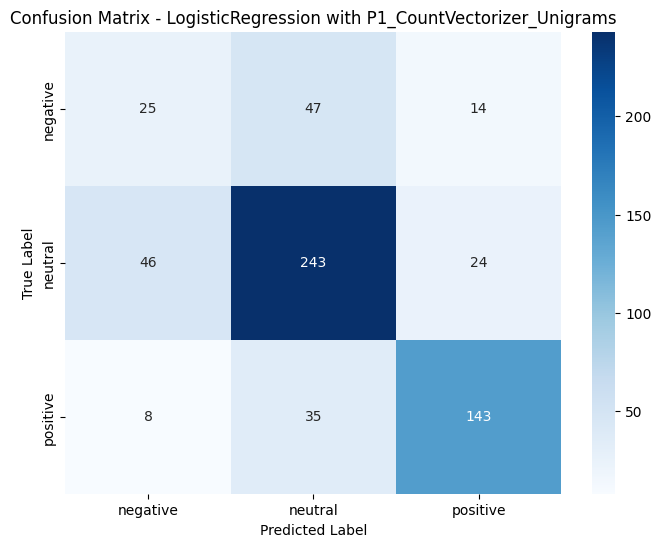


--- Evaluating on Test Set: LinearSVC with P1_CountVectorizer_Unigrams ---
Model: LinearSVC
Features: P1_CountVectorizer_Unigrams
Test Accuracy: 0.6838
Test Precision (weighted): 0.6784
Test Recall (weighted): 0.6838
Test F1-Score (weighted): 0.6809
Test Log Loss: N/A


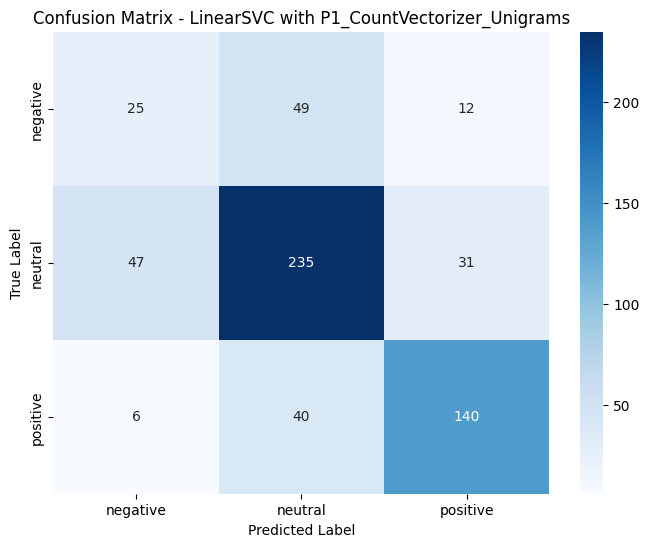


--- Evaluating on Test Set: MultinomialNB with P1_CountVectorizer_Unigrams ---
Model: MultinomialNB
Features: P1_CountVectorizer_Unigrams
Test Accuracy: 0.7179
Test Precision (weighted): 0.7087
Test Recall (weighted): 0.7179
Test F1-Score (weighted): 0.7109
Test Log Loss: 1.1520


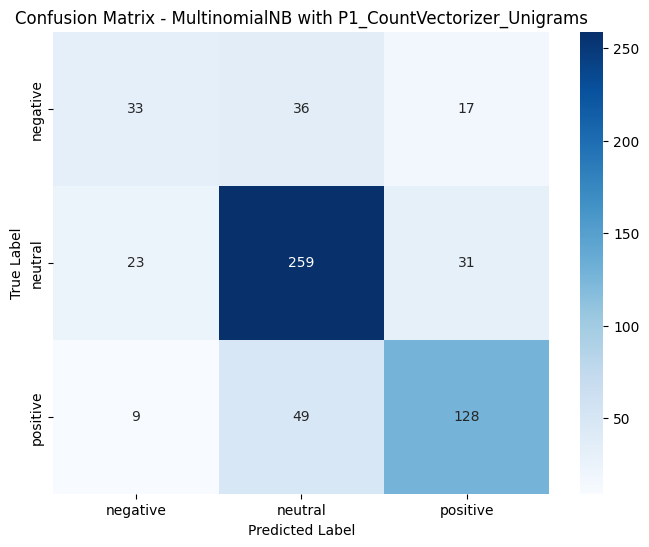


--- Evaluating on Test Set: LogisticRegression with P2_CountVectorizer_Unigrams ---
Model: LogisticRegression
Features: P2_CountVectorizer_Unigrams
Test Accuracy: 0.6752
Test Precision (weighted): 0.6793
Test Recall (weighted): 0.6752
Test F1-Score (weighted): 0.6772
Test Log Loss: 0.7312


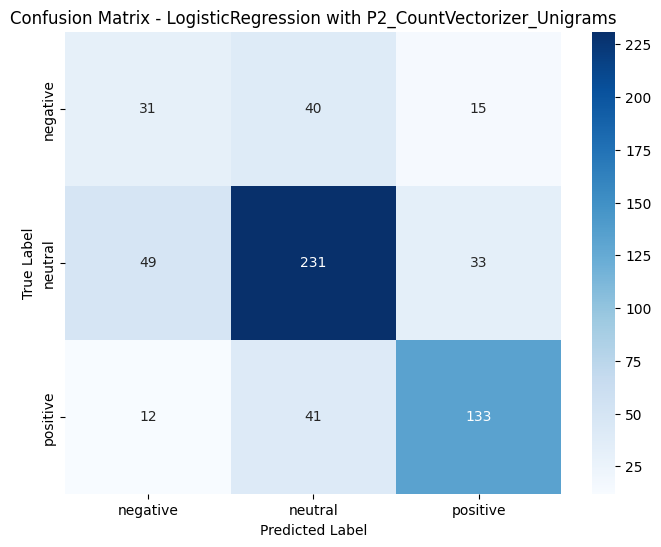


--- Evaluating on Test Set: LinearSVC with P2_CountVectorizer_Unigrams ---
Model: LinearSVC
Features: P2_CountVectorizer_Unigrams
Test Accuracy: 0.6479
Test Precision (weighted): 0.6534
Test Recall (weighted): 0.6479
Test F1-Score (weighted): 0.6505
Test Log Loss: N/A


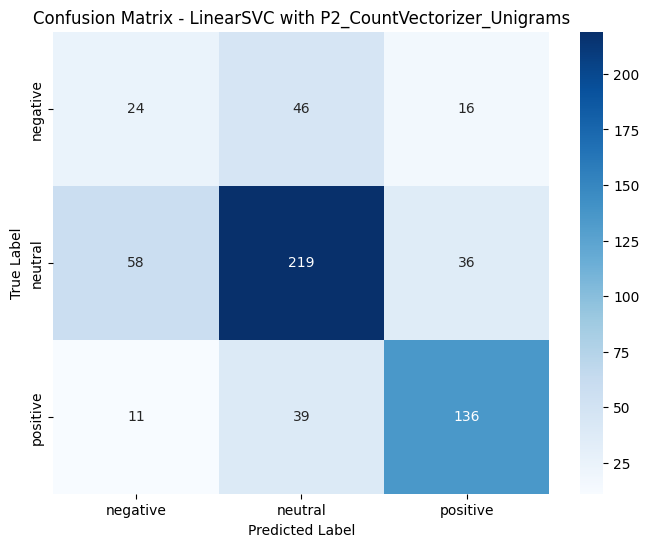


--- Evaluating on Test Set: MultinomialNB with P2_CountVectorizer_Unigrams ---
Model: MultinomialNB
Features: P2_CountVectorizer_Unigrams
Test Accuracy: 0.6786
Test Precision (weighted): 0.6786
Test Recall (weighted): 0.6786
Test F1-Score (weighted): 0.6784
Test Log Loss: 1.0744


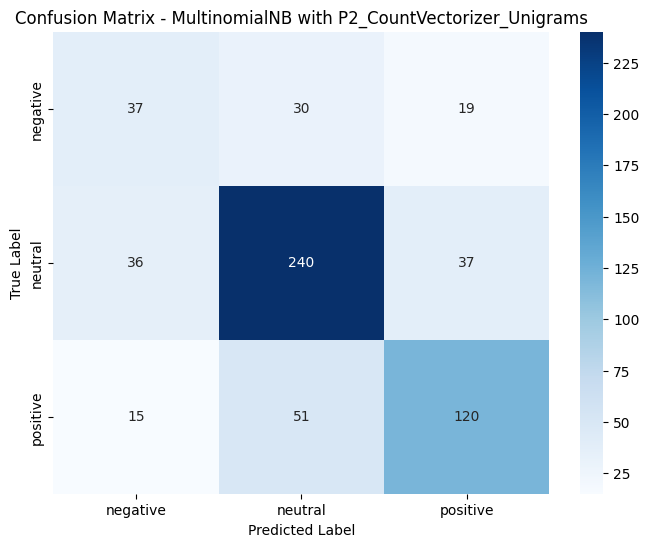


--- Evaluating on Test Set: LogisticRegression with P1_TFIDF_Unigrams ---
Model: LogisticRegression
Features: P1_TFIDF_Unigrams
Test Accuracy: 0.7094
Test Precision (weighted): 0.7015
Test Recall (weighted): 0.7094
Test F1-Score (weighted): 0.7040
Test Log Loss: 0.7415


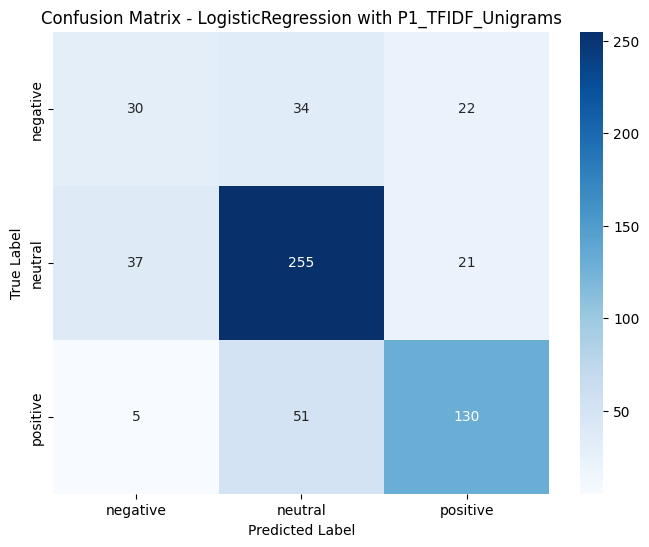


--- Evaluating on Test Set: LinearSVC with P1_TFIDF_Unigrams ---
Model: LinearSVC
Features: P1_TFIDF_Unigrams
Test Accuracy: 0.7043
Test Precision (weighted): 0.7010
Test Recall (weighted): 0.7043
Test F1-Score (weighted): 0.7025
Test Log Loss: N/A


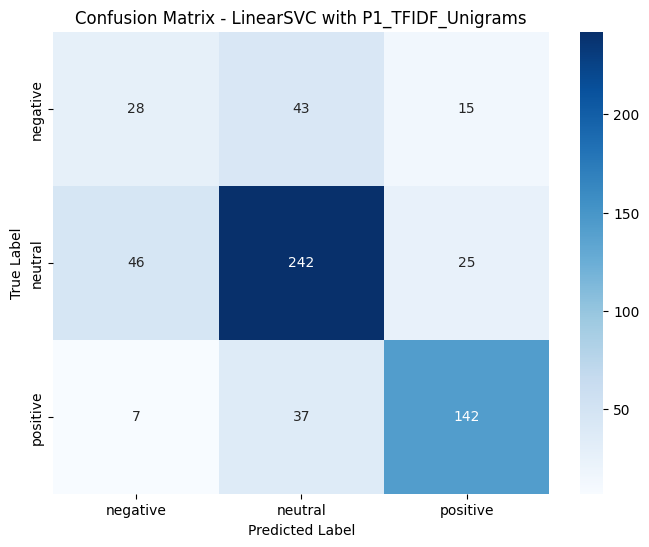


--- Evaluating on Test Set: MultinomialNB with P1_TFIDF_Unigrams ---
Model: MultinomialNB
Features: P1_TFIDF_Unigrams
Test Accuracy: 0.6479
Test Precision (weighted): 0.7235
Test Recall (weighted): 0.6479
Test F1-Score (weighted): 0.5754
Test Log Loss: 0.8231


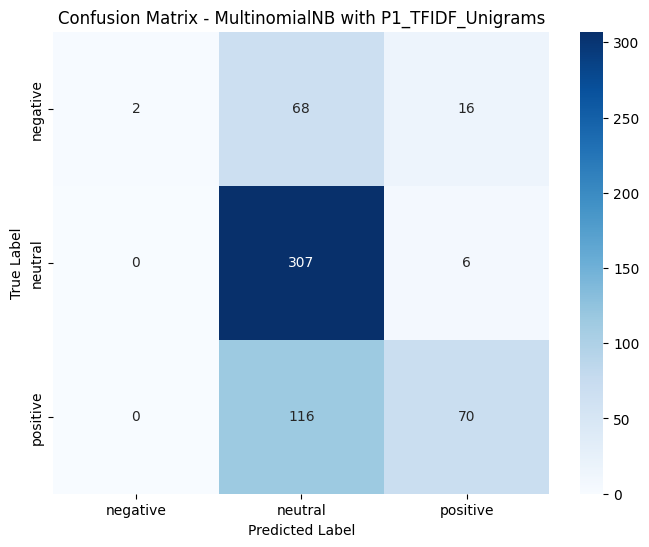


--- Evaluating on Test Set: LogisticRegression with P2_TFIDF_Unigrams ---
Model: LogisticRegression
Features: P2_TFIDF_Unigrams
Test Accuracy: 0.6701
Test Precision (weighted): 0.6703
Test Recall (weighted): 0.6701
Test F1-Score (weighted): 0.6660
Test Log Loss: 0.7841


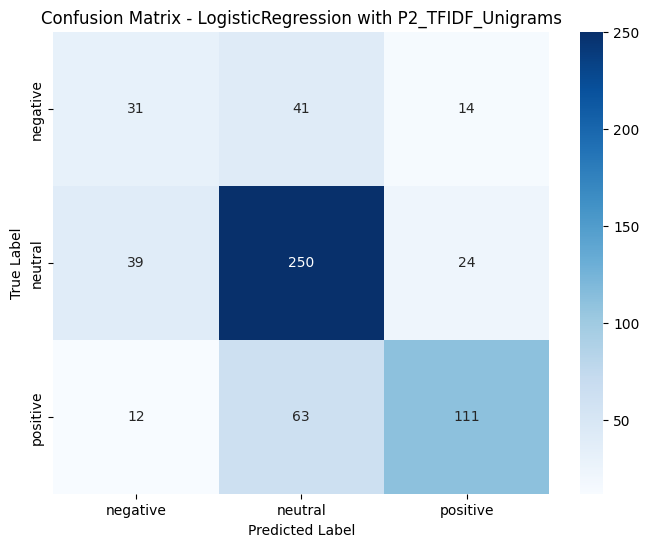


--- Evaluating on Test Set: LinearSVC with P2_TFIDF_Unigrams ---
Model: LinearSVC
Features: P2_TFIDF_Unigrams
Test Accuracy: 0.6718
Test Precision (weighted): 0.6741
Test Recall (weighted): 0.6718
Test F1-Score (weighted): 0.6729
Test Log Loss: N/A


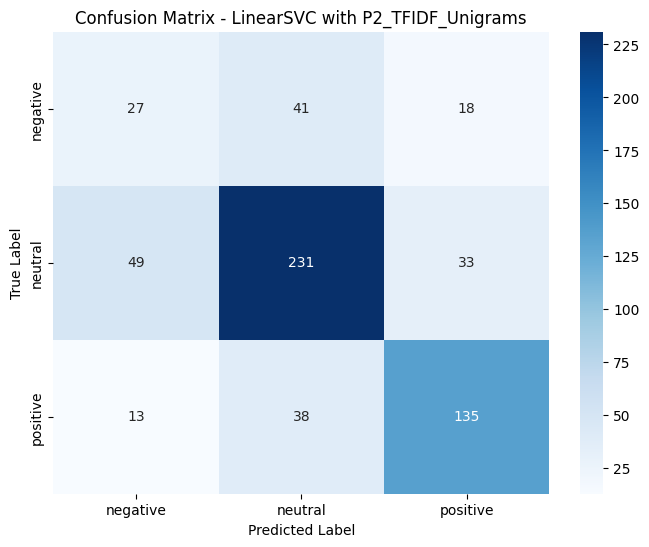


--- Evaluating on Test Set: MultinomialNB with P2_TFIDF_Unigrams ---
Model: MultinomialNB
Features: P2_TFIDF_Unigrams
Test Accuracy: 0.6684
Test Precision (weighted): 0.7281
Test Recall (weighted): 0.6684
Test F1-Score (weighted): 0.6031
Test Log Loss: 0.7987


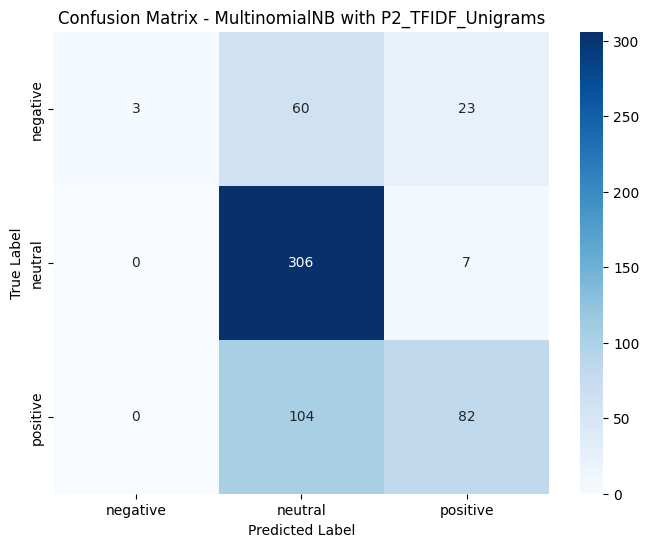


--- Evaluating on Test Set: LogisticRegression with P1_TFIDF_Unigrams_Bigrams ---
Model: LogisticRegression
Features: P1_TFIDF_Unigrams_Bigrams
Test Accuracy: 0.7043
Test Precision (weighted): 0.6925
Test Recall (weighted): 0.7043
Test F1-Score (weighted): 0.6939
Test Log Loss: 0.7984


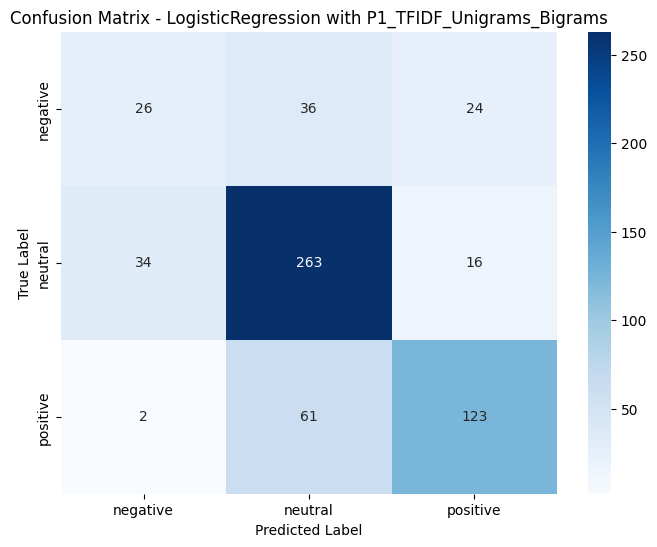


--- Evaluating on Test Set: LinearSVC with P1_TFIDF_Unigrams_Bigrams ---
Model: LinearSVC
Features: P1_TFIDF_Unigrams_Bigrams
Test Accuracy: 0.6906
Test Precision (weighted): 0.6809
Test Recall (weighted): 0.6906
Test F1-Score (weighted): 0.6847
Test Log Loss: N/A


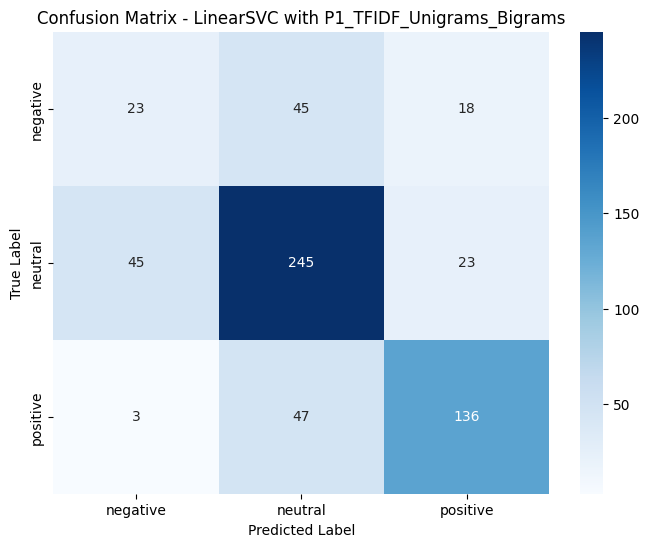


--- Evaluating on Test Set: MultinomialNB with P1_TFIDF_Unigrams_Bigrams ---
Model: MultinomialNB
Features: P1_TFIDF_Unigrams_Bigrams
Test Accuracy: 0.6222
Test Precision (weighted): 0.7258
Test Recall (weighted): 0.6222
Test F1-Score (weighted): 0.5364
Test Log Loss: 0.8745


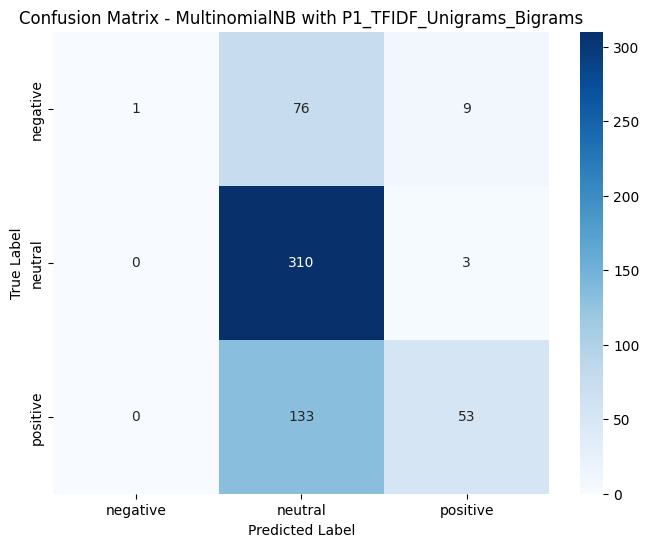


--- Evaluating on Test Set: LogisticRegression with P2_TFIDF_Unigrams_Bigrams ---
Model: LogisticRegression
Features: P2_TFIDF_Unigrams_Bigrams
Test Accuracy: 0.6581
Test Precision (weighted): 0.6633
Test Recall (weighted): 0.6581
Test F1-Score (weighted): 0.6455
Test Log Loss: 0.8449


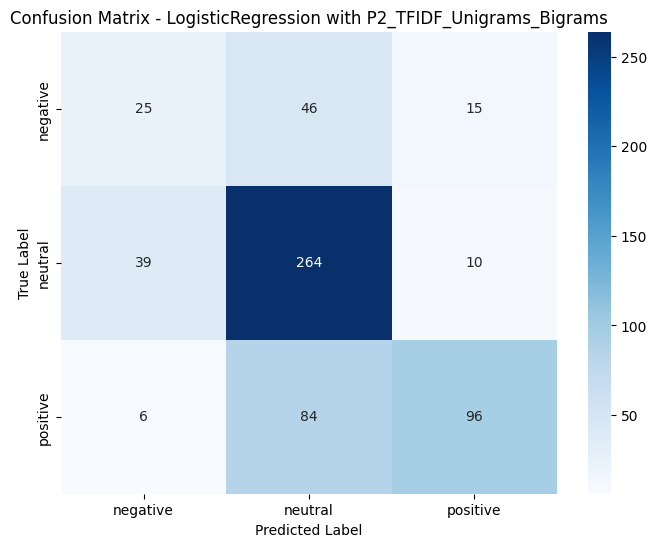


--- Evaluating on Test Set: LinearSVC with P2_TFIDF_Unigrams_Bigrams ---
Model: LinearSVC
Features: P2_TFIDF_Unigrams_Bigrams
Test Accuracy: 0.6752
Test Precision (weighted): 0.6693
Test Recall (weighted): 0.6752
Test F1-Score (weighted): 0.6700
Test Log Loss: N/A


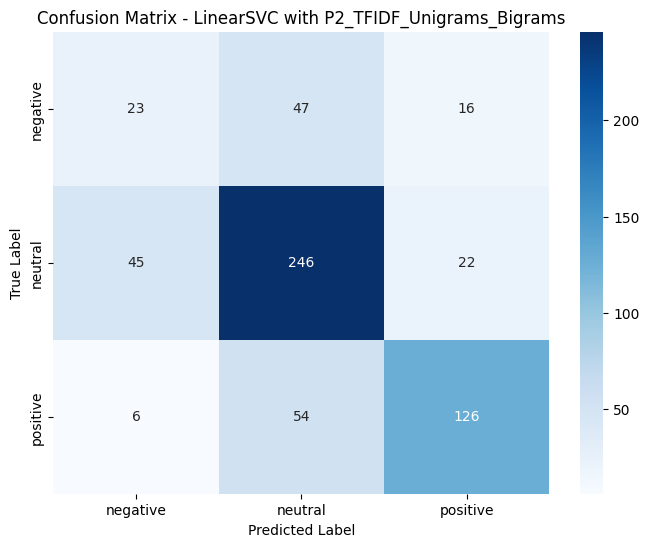


--- Evaluating on Test Set: MultinomialNB with P2_TFIDF_Unigrams_Bigrams ---
Model: MultinomialNB
Features: P2_TFIDF_Unigrams_Bigrams
Test Accuracy: 0.6496
Test Precision (weighted): 0.7325
Test Recall (weighted): 0.6496
Test F1-Score (weighted): 0.5761
Test Log Loss: 0.8493


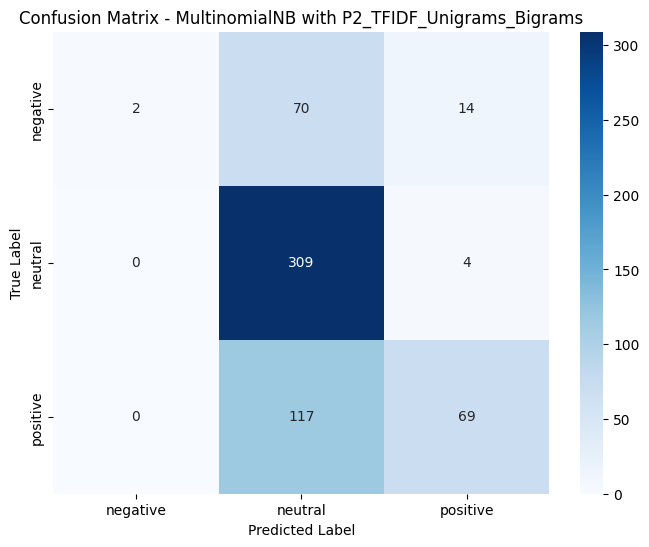


All classical ML test evaluations completed.

Summary of Classical ML Test Evaluation Results:
                 Model                     Features  Test_Accuracy  \
0   LogisticRegression  P1_CountVectorizer_Unigrams       0.702564   
1            LinearSVC  P1_CountVectorizer_Unigrams       0.683761   
2        MultinomialNB  P1_CountVectorizer_Unigrams       0.717949   
3   LogisticRegression  P2_CountVectorizer_Unigrams       0.675214   
4            LinearSVC  P2_CountVectorizer_Unigrams       0.647863   
5        MultinomialNB  P2_CountVectorizer_Unigrams       0.678632   
6   LogisticRegression            P1_TFIDF_Unigrams       0.709402   
7            LinearSVC            P1_TFIDF_Unigrams       0.704274   
8        MultinomialNB            P1_TFIDF_Unigrams       0.647863   
9   LogisticRegression            P2_TFIDF_Unigrams       0.670085   
10           LinearSVC            P2_TFIDF_Unigrams       0.671795   
11       MultinomialNB            P2_TFIDF_Unigrams       0.6683

In [ ]:
classical_test_results = []

# Loop through each feature matrix and each model
for feature_matrix_tuple, feature_name in feature_matrices:
    # Get feature splits for the current feature matrix
    X_train_current_features, _, X_test_current_features = get_feature_splits(feature_matrix_tuple, X_train_idx, X_val_idx, X_test_idx)

    for model_tuple_index, (model_instance_template, model_name) in enumerate(models):
        print(f"\n--- Evaluating on Test Set: {model_name} with {feature_name} ---")

        # Re-initialize the model instance to ensure a clean slate for test evaluation
        # Use the original model parameters including class_weight for LogisticRegression and LinearSVC
        if model_name == "LogisticRegression":
            model_instance = LogisticRegression(random_state=42, max_iter=1000, solver='liblinear', class_weight='balanced')
        elif model_name == "LinearSVC":
            model_instance = LinearSVC(random_state=42, max_iter=5000, class_weight='balanced')
        elif model_name == "MultinomialNB":
            model_instance = MultinomialNB()
        else:
            model_instance = model_instance_template # Fallback if new models are added without specific re-init logic

        # Train the model on the full training data (X_train_current_features, y_train_labels)
        model_instance.fit(X_train_current_features, np.argmax(y_train, axis=1))

        # Evaluate the trained model on the test set
        accuracy, precision, recall, f1, lloss, cm = evaluate_classical_model_on_test(
            model_instance, X_test_current_features, y_test
        )

        # Store the results
        classical_test_results.append({
            "Model": model_name,
            "Features": feature_name,
            "Test_Accuracy": accuracy,
            "Test_Precision": precision,
            "Test_Recall": recall,
            "Test_F1-Score": f1,
            "Test_Log_Loss": lloss,
            "Confusion_Matrix": cm
        })

        # Print the metrics
        print(f"Model: {model_name}")
        print(f"Features: {feature_name}")
        print(f"Test Accuracy: {accuracy:.4f}")
        print(f"Test Precision (weighted): {precision:.4f}")
        print(f"Test Recall (weighted): {recall:.4f}")
        print(f"Test F1-Score (weighted): {f1:.4f}")
        print(f"Test Log Loss: {lloss:.4f}" if not np.isnan(lloss) else "Test Log Loss: N/A")

        # Generate confusion matrix heatmap
        plt.figure(figsize=(8, 6))
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=encoder.categories_[0], yticklabels=encoder.categories_[0])
        plt.title(f'Confusion Matrix - {model_name} with {feature_name}')
        plt.xlabel('Predicted Label')
        plt.ylabel('True Label')
        plt.show()

print("\nAll classical ML test evaluations completed.")

# Convert results to a DataFrame for structured storage
classical_test_results_df = pd.DataFrame(classical_test_results)
print("\nSummary of Classical ML Test Evaluation Results:")
print(classical_test_results_df[['Model', 'Features', 'Test_Accuracy', 'Test_Precision', 'Test_Recall', 'Test_F1-Score', 'Test_Log_Loss']])

### Evaluate Neural GRU Models on Test Set and Plot Training Curves


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, log_loss, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd # Ensure pandas is imported for DataFrame operations
from tensorflow.keras.preprocessing.sequence import pad_sequences # Re-import if not globally available, or ensure it's used

# Split the padded sequences and TF-IDF weighted averaged embeddings into test sets
# max_sequence_length and embedding_dim are already defined globally

X_p1_padded_test = X_p1_padded[X_test_idx]
X_p2_padded_test = X_p2_padded[X_test_idx]

# Reshape TF-IDF averaged embeddings for test set for GRU input (num_samples, 1, embedding_dim)
X_p1_tfidf_avg_test = X_p1_tfidf_weighted_embeddings[X_test_idx].reshape(-1, 1, embedding_dim)
X_p2_tfidf_avg_test = X_p2_tfidf_weighted_embeddings[X_test_idx].reshape(-1, 1, embedding_dim)

print("Splitting of neural feature test sets completed.")

# Define a Python function `evaluate_neural_model_on_test`
def evaluate_neural_model_on_test(model, X_test_input, y_test_oh):
    """
    Evaluates a trained Keras neural model on the test set, calculating various metrics
    and a confusion matrix.
    """
    # Make predictions on the test set
    y_pred_proba = model.predict(X_test_input, verbose=0)
    y_pred = np.argmax(y_pred_proba, axis=1)

    # Convert true labels from one-hot encoding to single class labels
    y_true = np.argmax(y_test_oh, axis=1)

    # Calculate accuracy, precision, recall, and F1-score
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, average='weighted', zero_division=0)
    recall = recall_score(y_true, y_pred, average='weighted', zero_division=0)
    f1 = f1_score(y_true, y_pred, average='weighted', zero_division=0)

    # Calculate log loss
    lloss = log_loss(y_true, y_pred_proba)

    # Compute the confusion_matrix
    cm = confusion_matrix(y_true, y_pred)

    # Return all calculated metrics and the confusion matrix
    return accuracy, precision, recall, f1, lloss, cm

print("Neural test set evaluation function `evaluate_neural_model_on_test` defined.")

Splitting of neural feature test sets completed.
Neural test set evaluation function `evaluate_neural_model_on_test` defined.


In [ ]:
import matplotlib.pyplot as plt

# Define a Python function `plot_training_history`
def plot_training_history(history, model_name):
    """
    Plots training and validation loss/accuracy curves from the history object.
    """
    # Create a figure with two subplots
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
    fig.suptitle(f'Training History for {model_name}')

    # Plot training & validation accuracy values
    ax1.plot(history.history['accuracy'])
    ax1.plot(history.history['val_accuracy'])
    ax1.set_title('Model Accuracy')
    ax1.set_ylabel('Accuracy')
    ax1.set_xlabel('Epoch')
    ax1.legend(['Train', 'Validation'], loc='upper left')
    ax1.grid(True)

    # Plot training & validation loss values
    ax2.plot(history.history['loss'])
    ax2.plot(history.history['val_loss'])
    ax2.set_title('Model Loss')
    ax2.set_ylabel('Loss')
    ax2.set_xlabel('Epoch')
    ax2.legend(['Train', 'Validation'], loc='upper left')
    ax2.grid(True)

    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

print("Plotting function `plot_training_history` defined.")

Plotting function `plot_training_history` defined.



--- Running Neural Experiment: GRU_P1_random ---
Model: GRU_P1_random
Test Accuracy: 0.5880
Test Precision (weighted): 0.5245
Test Recall (weighted): 0.5880
Test F1-Score (weighted): 0.5481
Test Log Loss: 0.9306


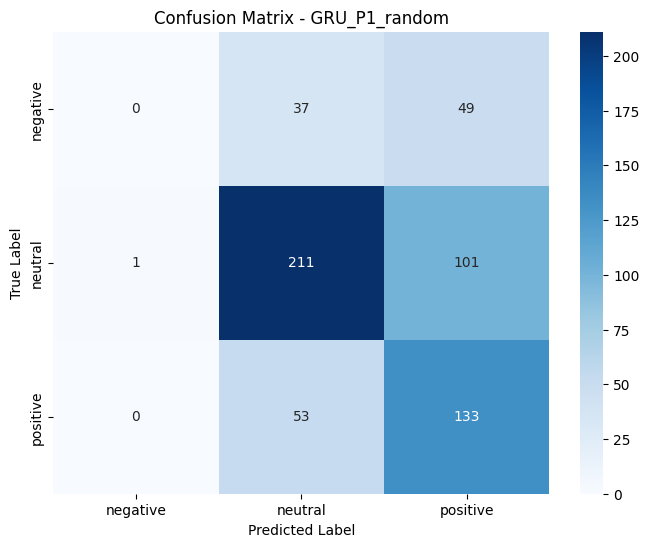

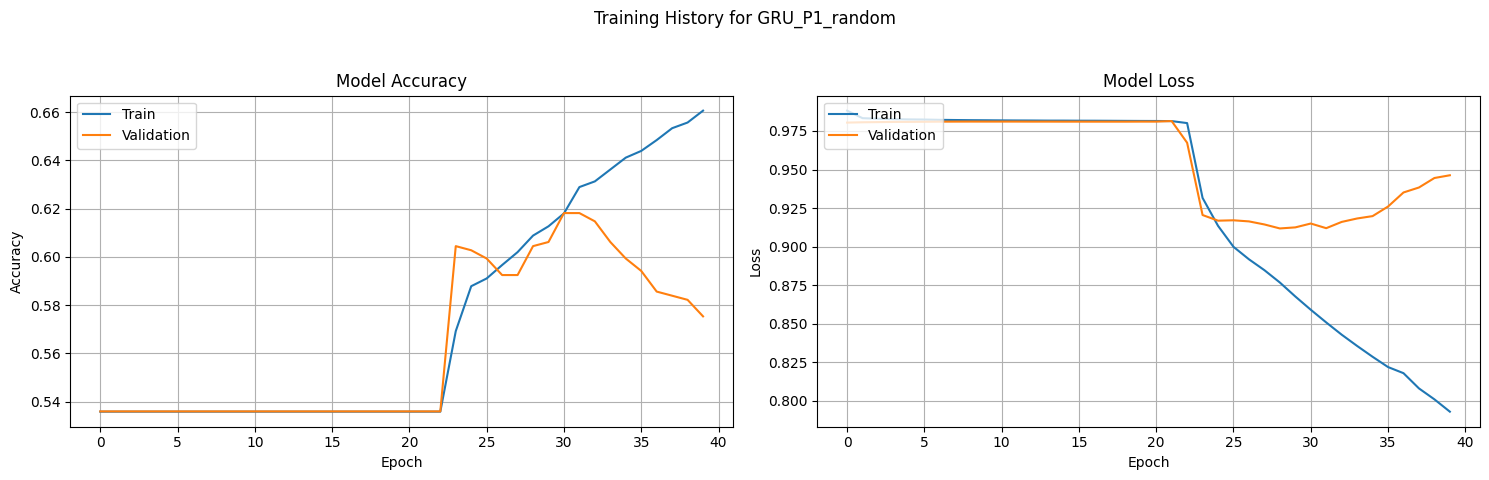


--- Running Neural Experiment: GRU_P1_word2vec_sg ---
Model: GRU_P1_word2vec_sg
Test Accuracy: 0.5880
Test Precision (weighted): 0.5779
Test Recall (weighted): 0.5880
Test F1-Score (weighted): 0.5826
Test Log Loss: 1.2561


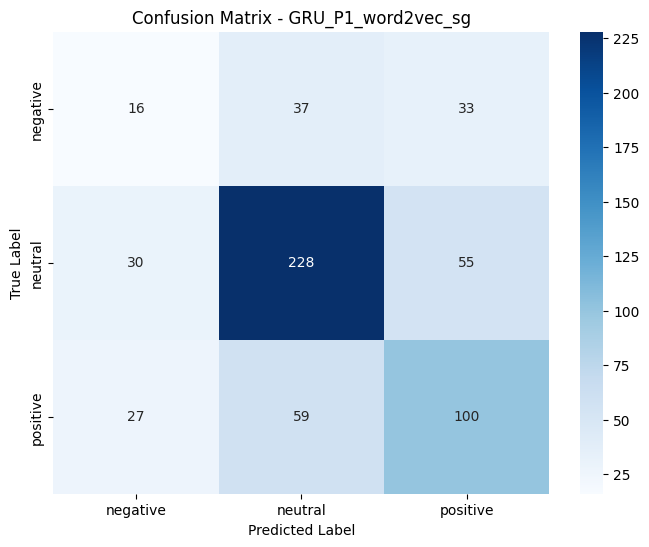

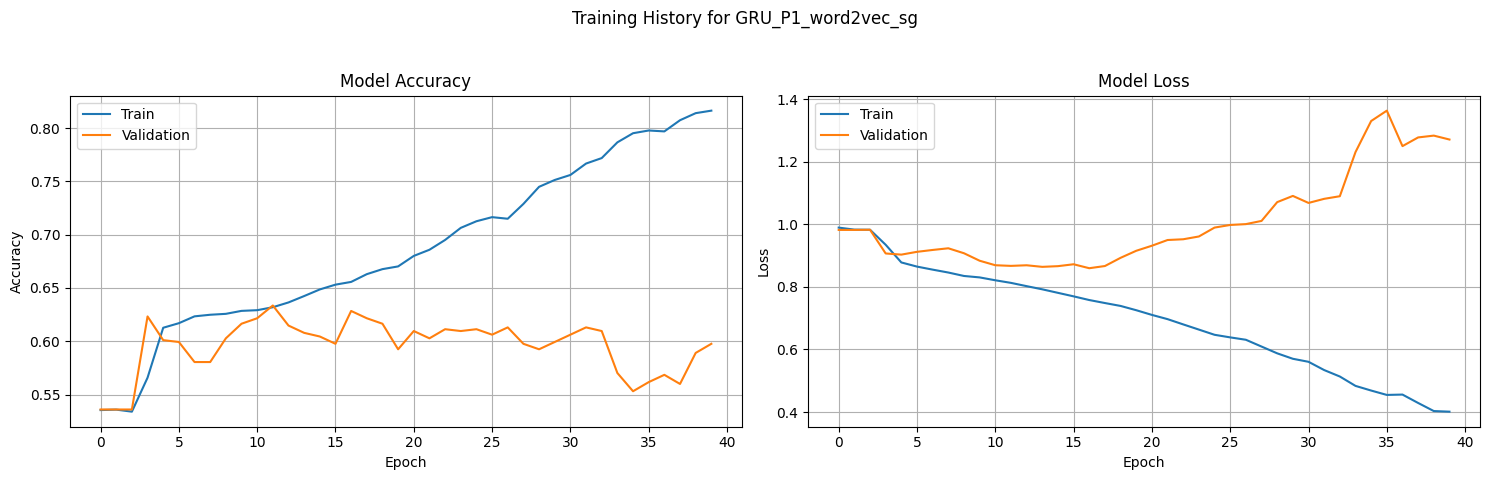


--- Running Neural Experiment: GRU_P1_word2vec_cbow ---
Model: GRU_P1_word2vec_cbow
Test Accuracy: 0.5128
Test Precision (weighted): 0.5299
Test Recall (weighted): 0.5128
Test F1-Score (weighted): 0.5090
Test Log Loss: 1.2543


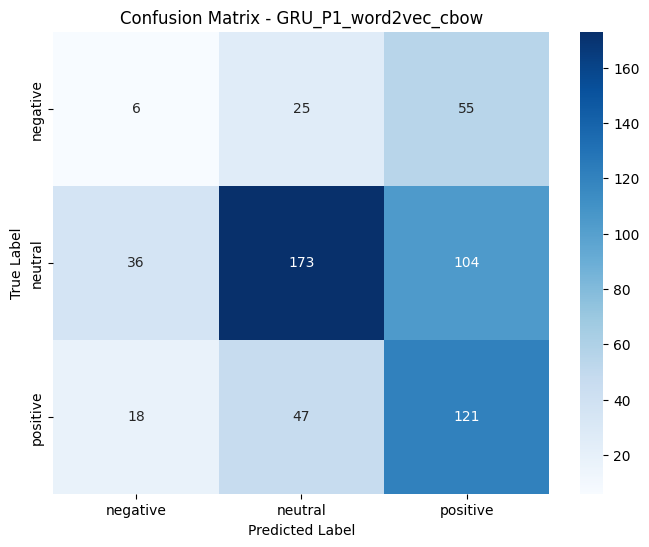

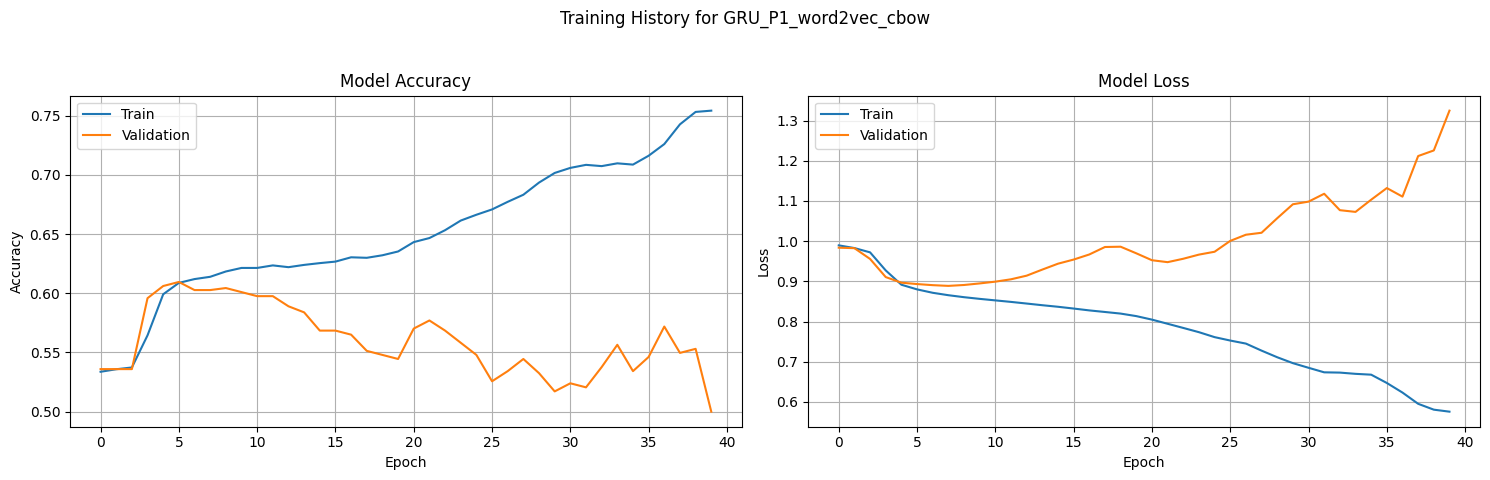


--- Running Neural Experiment: GRU_P1_fasttext ---
Model: GRU_P1_fasttext
Test Accuracy: 0.5778
Test Precision (weighted): 0.5185
Test Recall (weighted): 0.5778
Test F1-Score (weighted): 0.5381
Test Log Loss: 1.1175


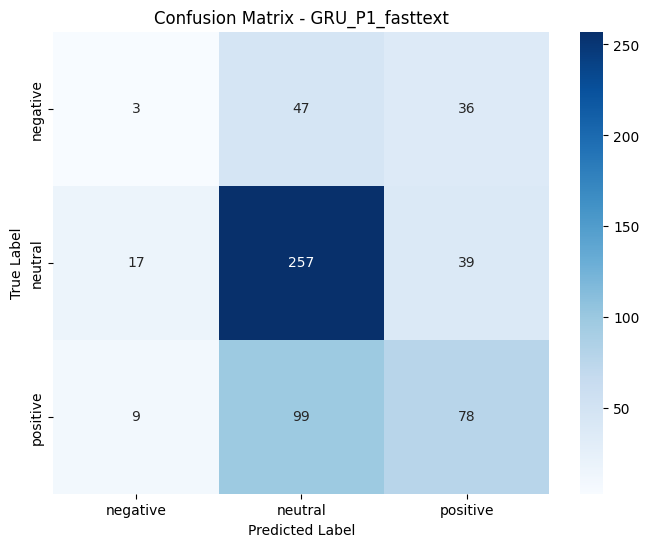

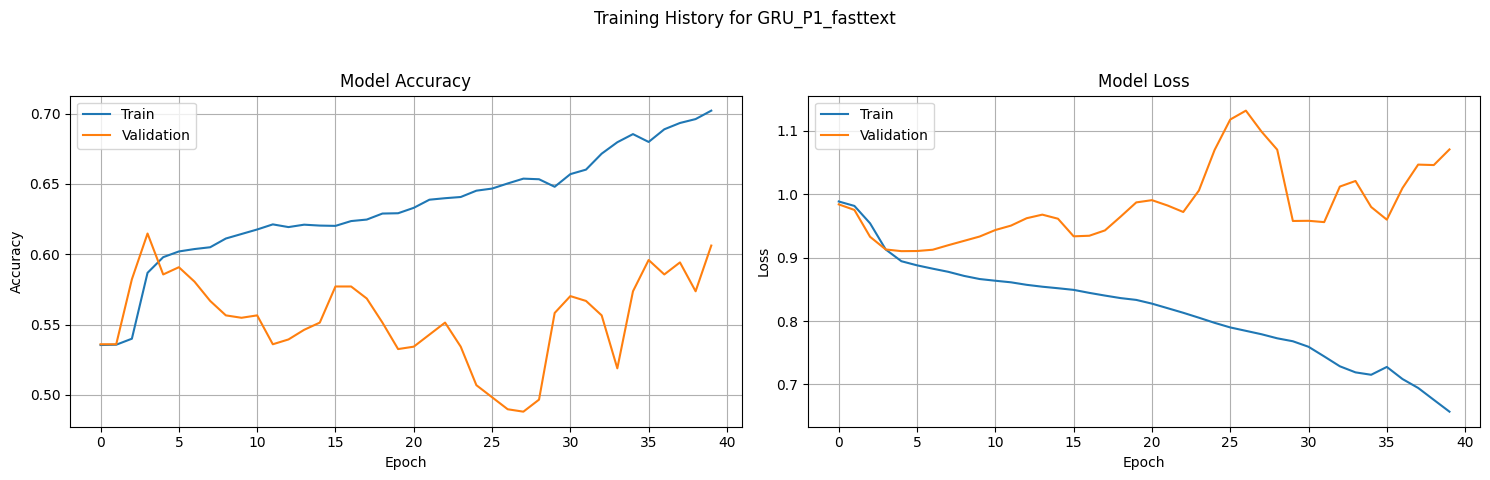


--- Running Neural Experiment: GRU_P1_glove ---
Model: GRU_P1_glove
Test Accuracy: 0.7094
Test Precision (weighted): 0.7102
Test Recall (weighted): 0.7094
Test F1-Score (weighted): 0.7097
Test Log Loss: 1.2315


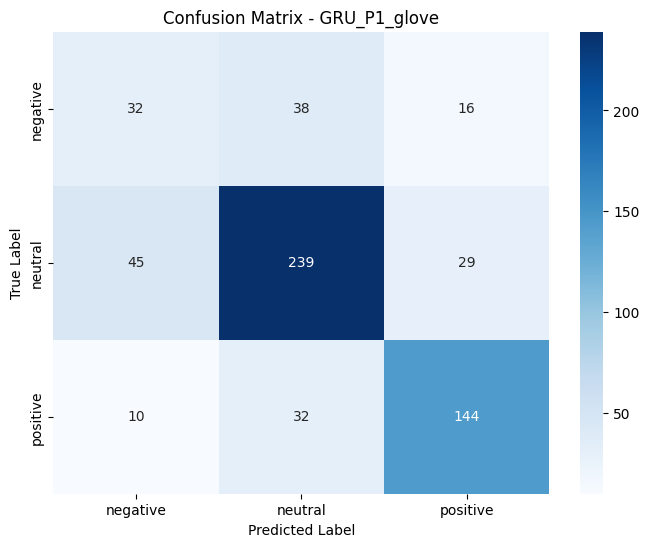

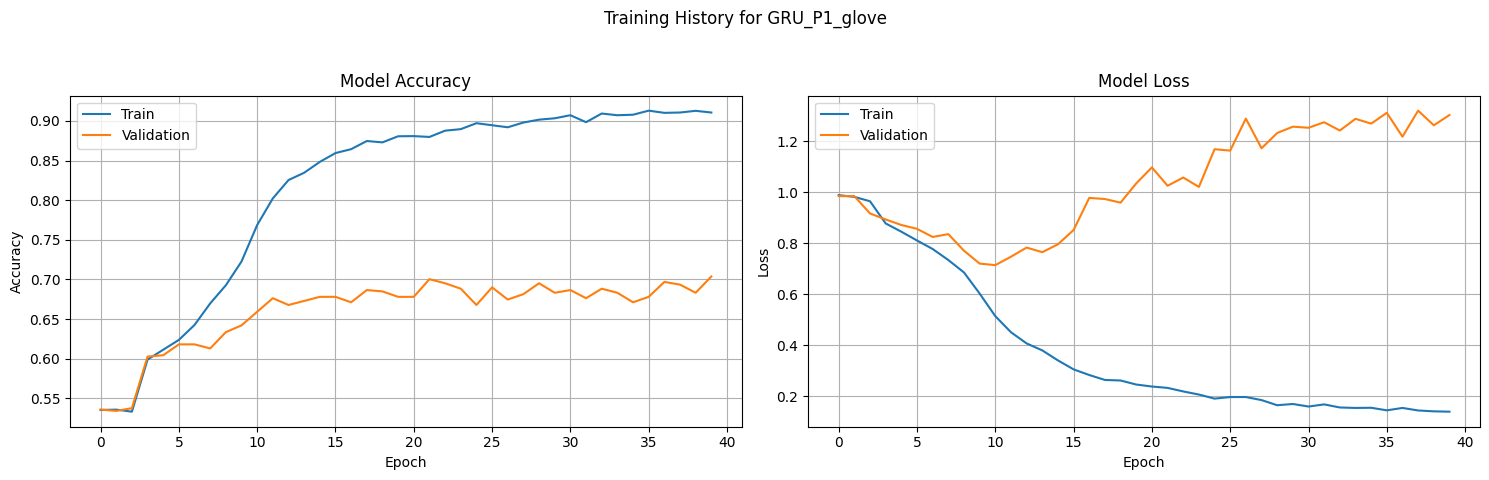


--- Running Neural Experiment: GRU_P1_finbert ---
Model: GRU_P1_finbert
Test Accuracy: 0.7214
Test Precision (weighted): 0.7275
Test Recall (weighted): 0.7214
Test F1-Score (weighted): 0.7226
Test Log Loss: 1.3288


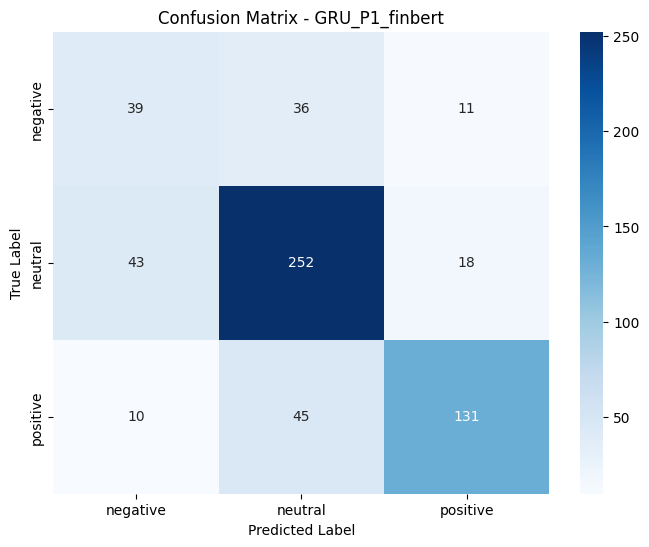

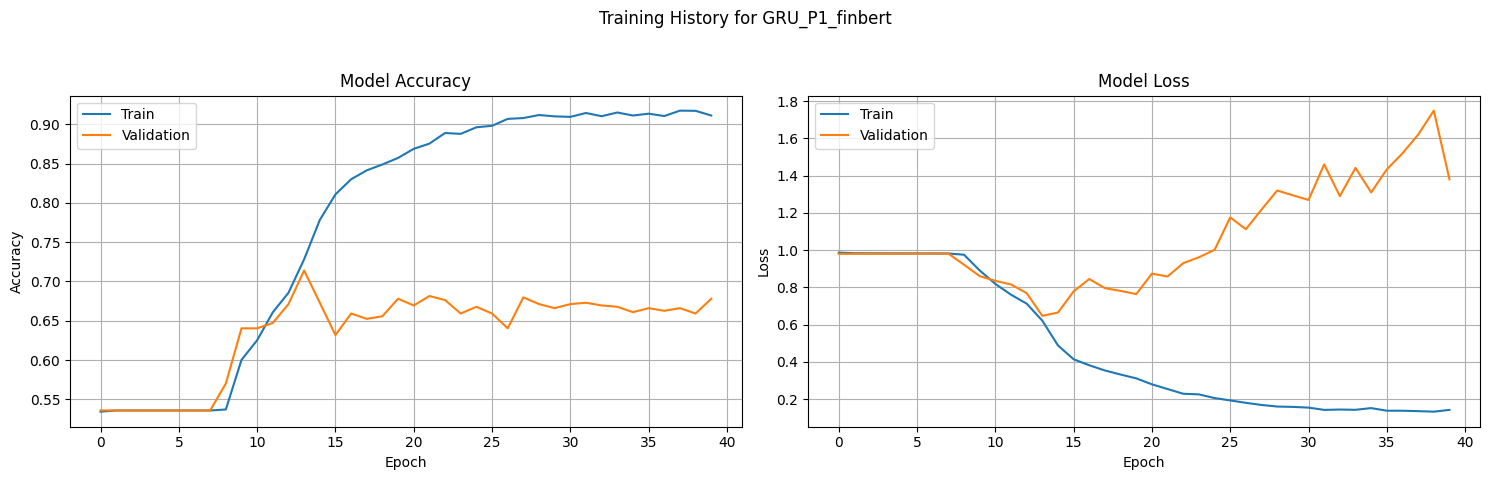


--- Running Neural Experiment: GRU_P1_tfidf_avg ---
Model: GRU_P1_tfidf_avg
Test Accuracy: 0.6188
Test Precision (weighted): 0.5921
Test Recall (weighted): 0.6188
Test F1-Score (weighted): 0.5680
Test Log Loss: 0.8598


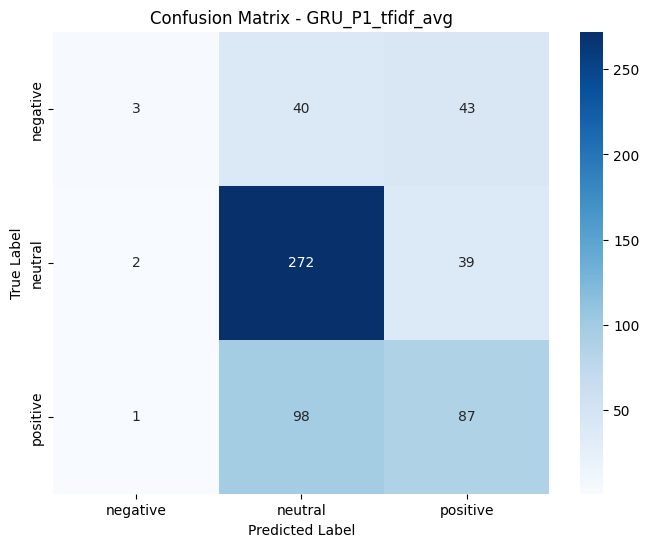

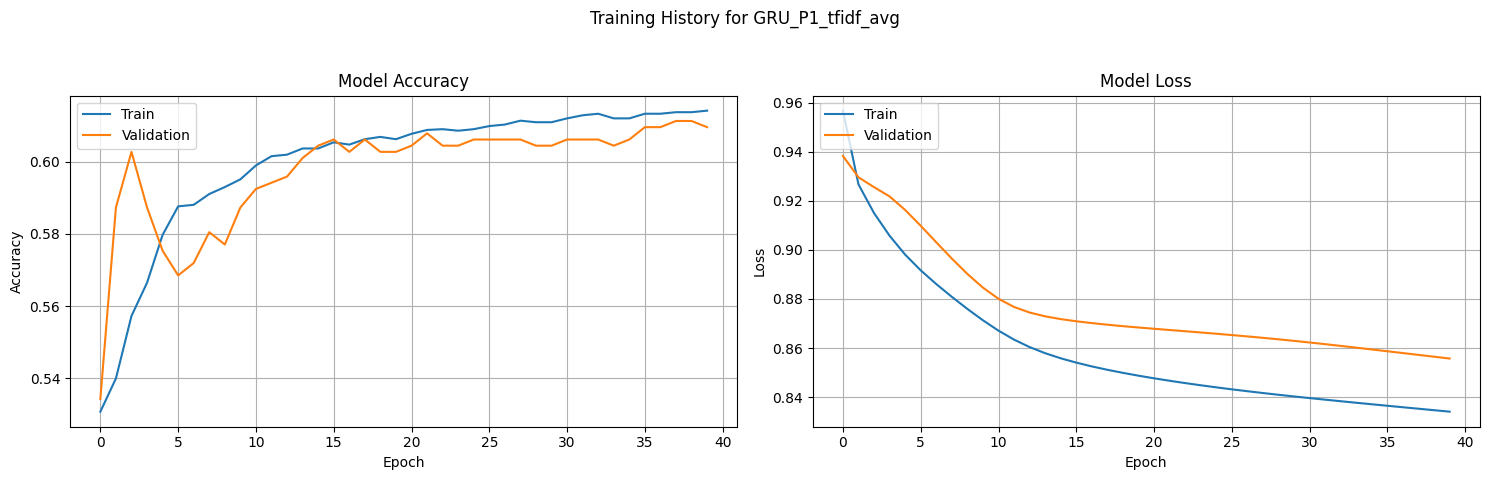


--- Running Neural Experiment: GRU_P2_random ---
Model: GRU_P2_random
Test Accuracy: 0.5350
Test Precision (weighted): 0.2863
Test Recall (weighted): 0.5350
Test F1-Score (weighted): 0.3730
Test Log Loss: 0.9810


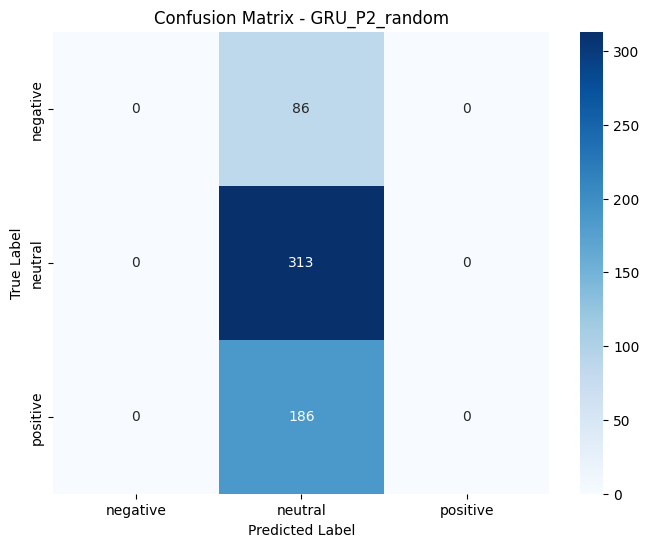

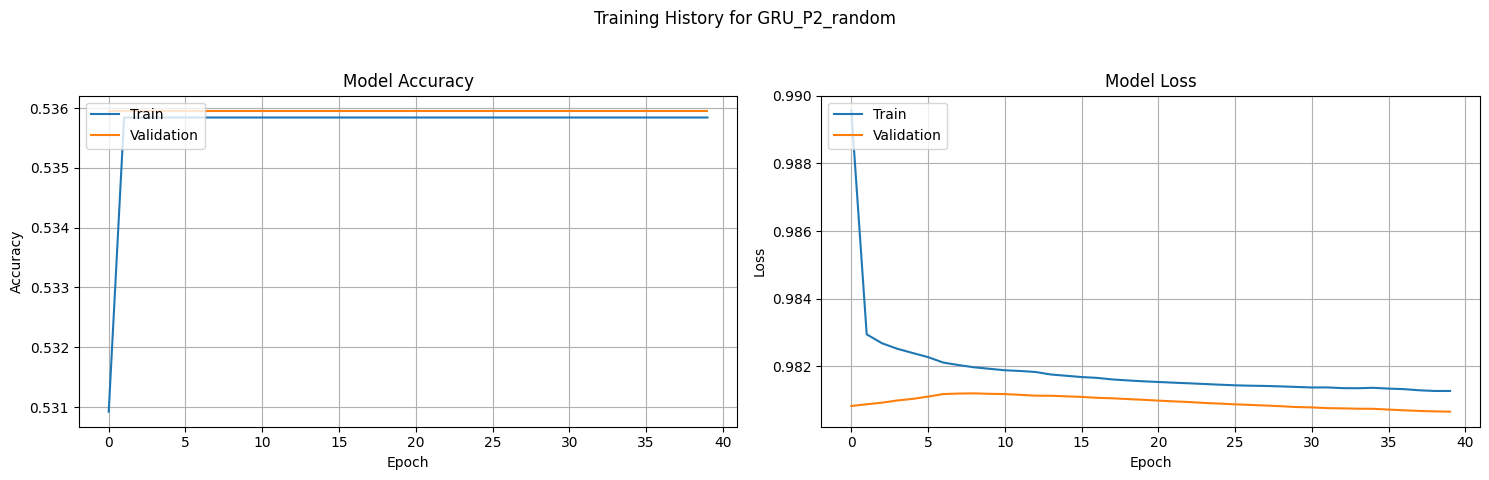


--- Running Neural Experiment: GRU_P2_word2vec_sg ---
Model: GRU_P2_word2vec_sg
Test Accuracy: 0.5590
Test Precision (weighted): 0.5068
Test Recall (weighted): 0.5590
Test F1-Score (weighted): 0.5197
Test Log Loss: 0.9860


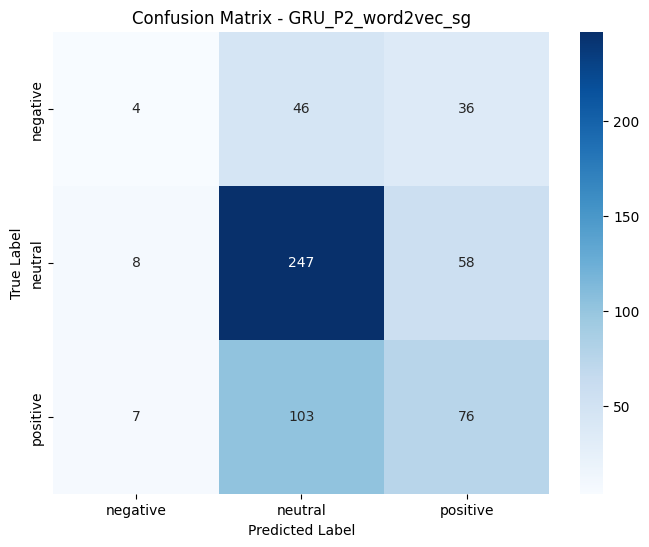

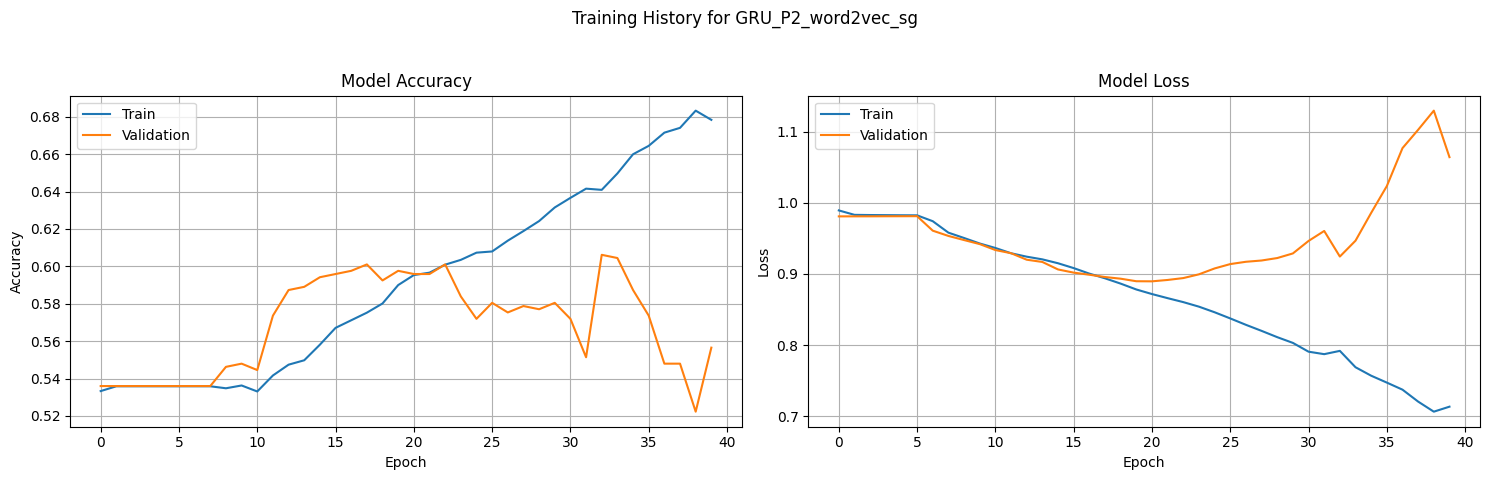


--- Running Neural Experiment: GRU_P2_word2vec_cbow ---
Model: GRU_P2_word2vec_cbow
Test Accuracy: 0.4957
Test Precision (weighted): 0.5024
Test Recall (weighted): 0.4957
Test F1-Score (weighted): 0.4876
Test Log Loss: 1.0809


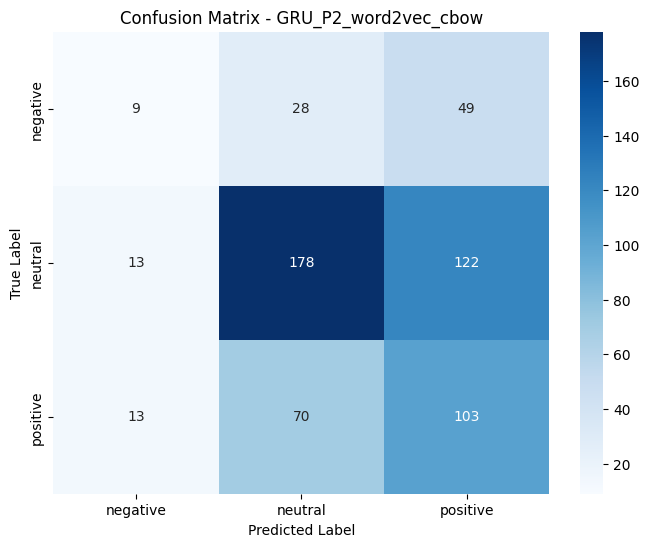

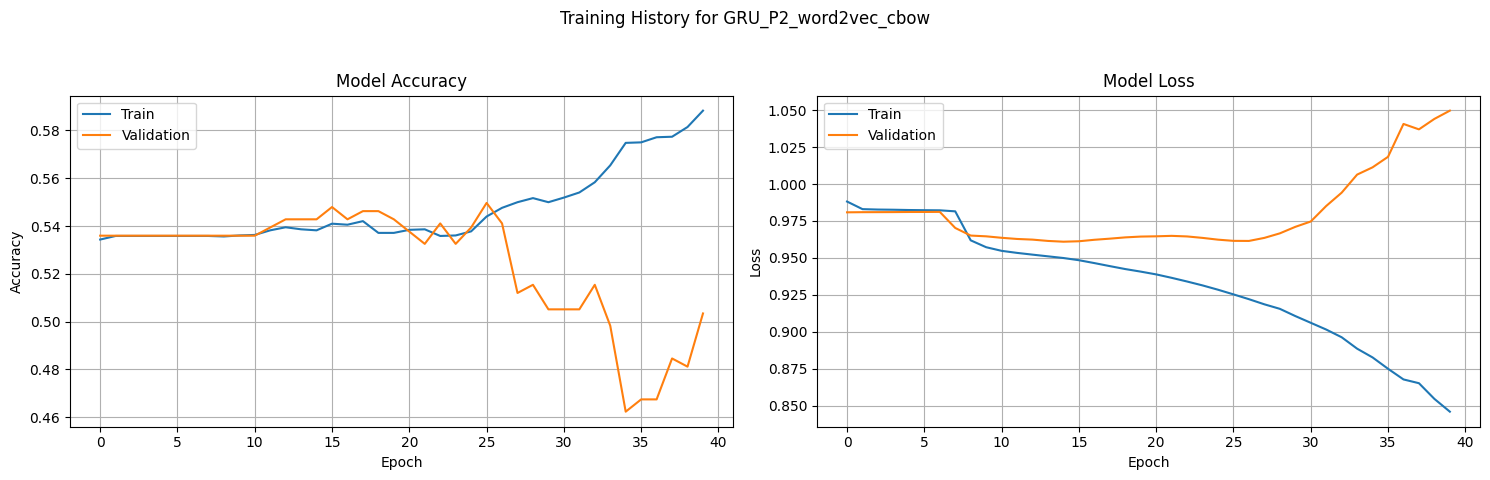


--- Running Neural Experiment: GRU_P2_fasttext ---
Model: GRU_P2_fasttext
Test Accuracy: 0.5453
Test Precision (weighted): 0.5003
Test Recall (weighted): 0.5453
Test F1-Score (weighted): 0.5077
Test Log Loss: 0.9722


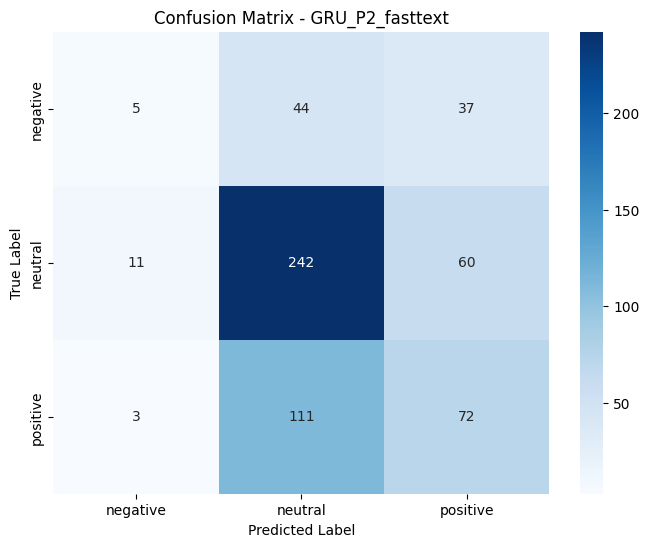

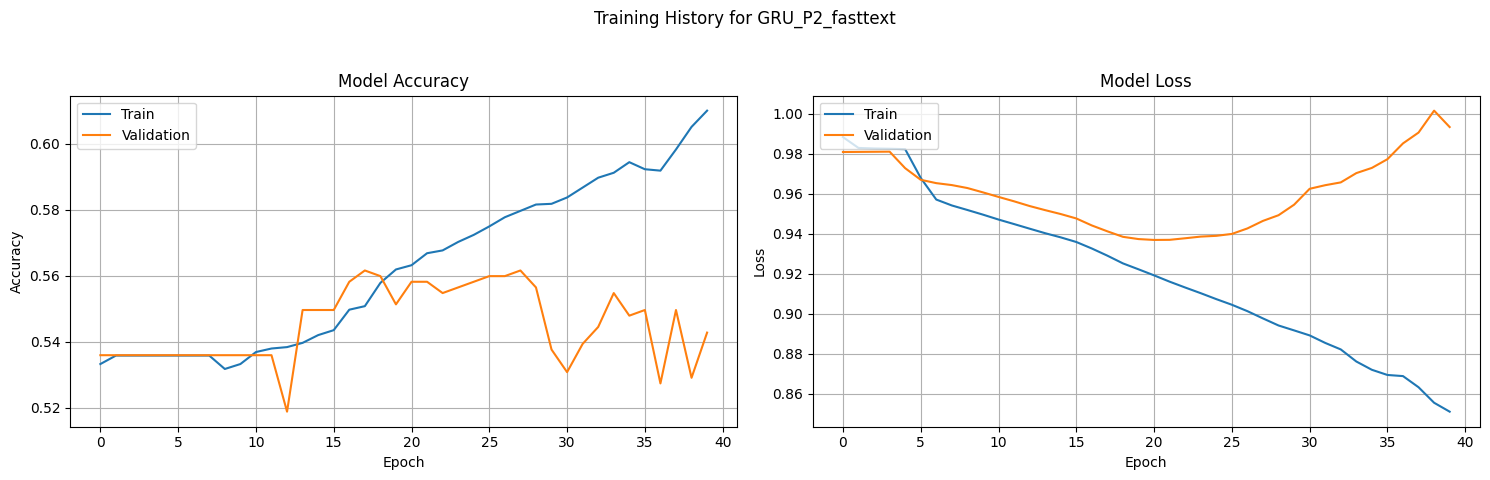


--- Running Neural Experiment: GRU_P2_glove ---
Model: GRU_P2_glove
Test Accuracy: 0.6615
Test Precision (weighted): 0.6551
Test Recall (weighted): 0.6615
Test F1-Score (weighted): 0.6581
Test Log Loss: 1.6171


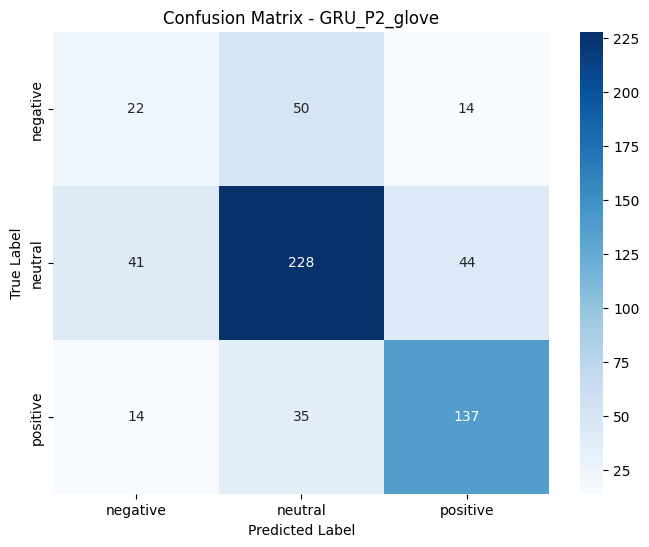

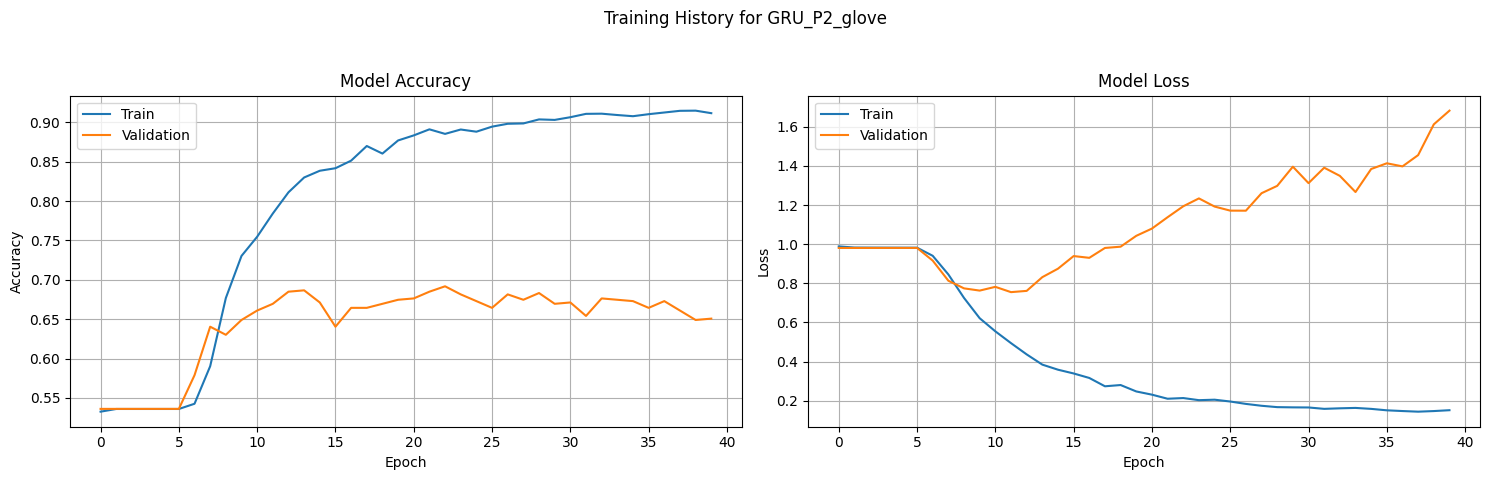


--- Running Neural Experiment: GRU_P2_finbert ---
Model: GRU_P2_finbert
Test Accuracy: 0.6427
Test Precision (weighted): 0.6720
Test Recall (weighted): 0.6427
Test F1-Score (weighted): 0.6530
Test Log Loss: 1.7232


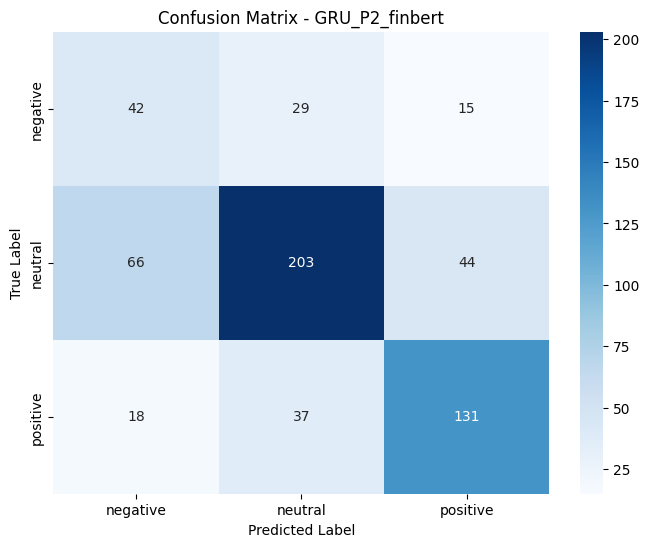

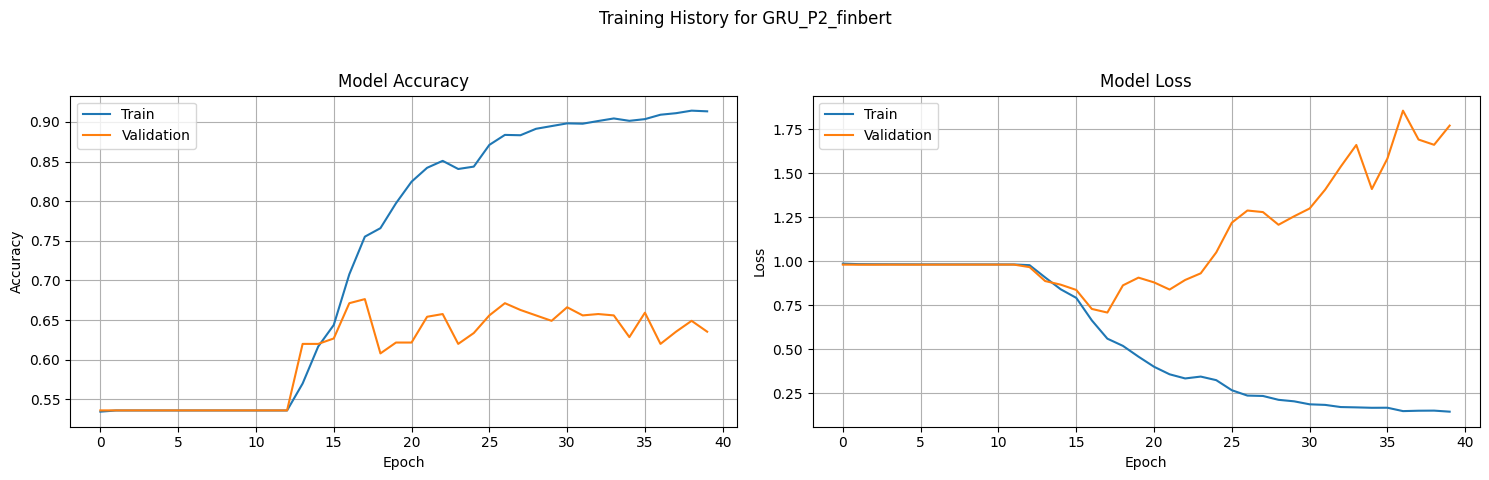


--- Running Neural Experiment: GRU_P2_tfidf_avg ---
Model: GRU_P2_tfidf_avg
Test Accuracy: 0.5778
Test Precision (weighted): 0.4794
Test Recall (weighted): 0.5778
Test F1-Score (weighted): 0.5135
Test Log Loss: 0.8742


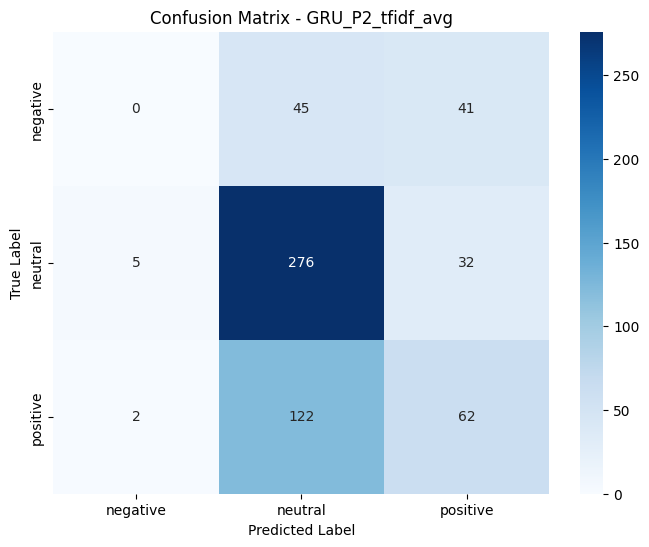

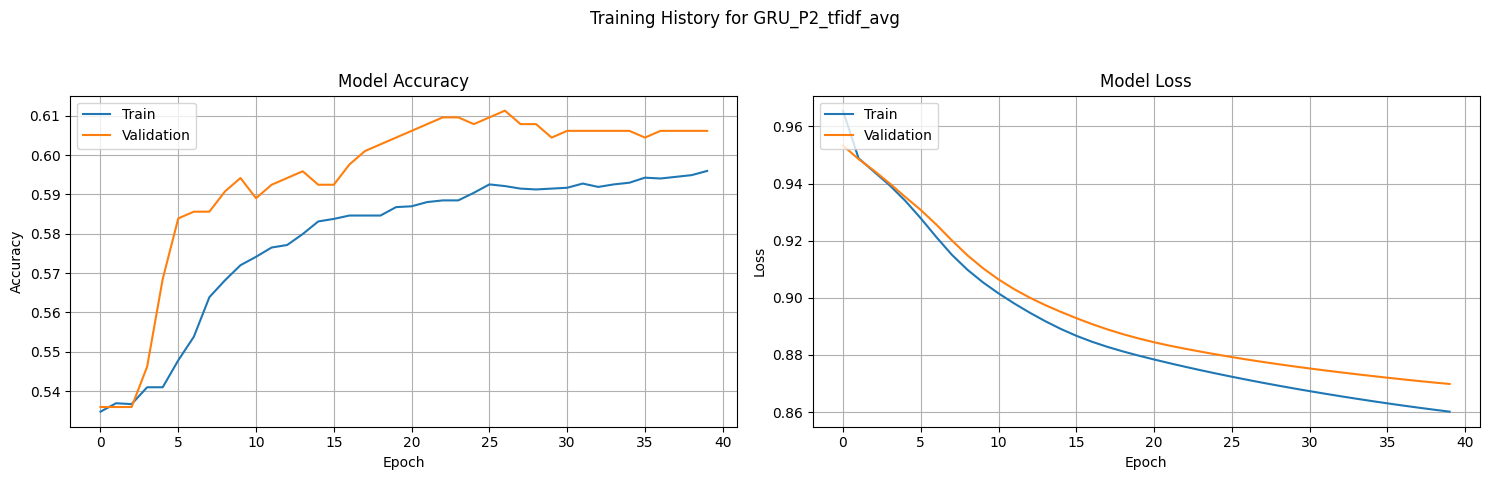


All Neural GRU test evaluations completed.

Summary of Neural GRU Test Evaluation Results:
                   Model Pipeline Embedding_Type  Test_Accuracy  \
0          GRU_P1_random       P1         random       0.588034   
1     GRU_P1_word2vec_sg       P1    word2vec_sg       0.588034   
2   GRU_P1_word2vec_cbow       P1  word2vec_cbow       0.512821   
3        GRU_P1_fasttext       P1       fasttext       0.577778   
4           GRU_P1_glove       P1          glove       0.709402   
5         GRU_P1_finbert       P1        finbert       0.721368   
6       GRU_P1_tfidf_avg       P1      tfidf_avg       0.618803   
7          GRU_P2_random       P2         random       0.535043   
8     GRU_P2_word2vec_sg       P2    word2vec_sg       0.558974   
9   GRU_P2_word2vec_cbow       P2  word2vec_cbow       0.495726   
10       GRU_P2_fasttext       P2       fasttext       0.545299   
11          GRU_P2_glove       P2          glove       0.661538   
12        GRU_P2_finbert       P2    

In [ ]:
import pandas as pd
from tensorflow.keras.optimizers import Adam

# Initialize an empty list to store the neural_test_results
neural_test_results = []

# Iterate through each preprocessing pipeline (P1 and P2) and each embedding type

# Total number of sentiment classes
output_units = y_test.shape[1] # Should be 3

# Set the number of epochs for neural models
epochs_count = 40 # As specified in the subtask

for pipeline_name, pipeline_data in pipelines.items():
    for emb_type in embedding_types:
        model_name = f"GRU_{pipeline_name}_{emb_type}"
        current_embedding_matrix = None
        current_embedding_output_dim = embedding_output_dims.get(emb_type, embedding_dim)
        use_embedding_layer = True
        input_shape_for_model = (max_sequence_length,)

        # Dynamically prepare training, validation, and test input data
        X_train_input = pipeline_data['padded_train']
        X_val_input = pipeline_data['padded_val']
        X_test_input = None # Will be set below

        if emb_type == 'tfidf_avg':
            use_embedding_layer = False
            input_shape_for_model = (1, current_embedding_output_dim) # TF-IDF averaged embeddings are dense vectors
            X_train_input = pipeline_data['tfidf_avg_train']
            X_val_input = pipeline_data['tfidf_avg_val']
            # Set X_test_input for tfidf_avg
            if pipeline_name == 'P1':
                X_test_input = X_p1_tfidf_avg_test
            else:
                X_test_input = X_p2_tfidf_avg_test
        else:
            current_embedding_matrix = pipeline_data['embedding_matrices'][emb_type]
            # Set X_test_input for padded sequences
            if pipeline_name == 'P1':
                X_test_input = X_p1_padded_test
            else:
                X_test_input = X_p2_padded_test

        print(f"\n--- Running Neural Experiment: {model_name} ---")

        #  Instantiate and compile a new GRU model
        model = build_gru_model(
            input_shape=input_shape_for_model,
            output_units=output_units,
            embedding_matrix=current_embedding_matrix,
            use_embedding_layer=use_embedding_layer,
            embedding_output_dim=current_embedding_output_dim,
            vocabulary_size=vocabulary_size # Use the unified vocabulary size
        )

        # Train the model and store the history object
        history = model.fit(
            X_train_input, y_train,
            epochs=epochs_count,
            batch_size=32,
            validation_data=(X_val_input, y_val),
            verbose=0 # Set to 0 to suppress epoch-by-epoch output
        )

        #  Evaluate the trained model on the test set
        accuracy, precision, recall, f1, lloss, cm = evaluate_neural_model_on_test(
            model, X_test_input, y_test
        )

        #  Store all computed metrics and the confusion matrix
        neural_test_results.append({
            "Model": model_name,
            "Pipeline": pipeline_name,
            "Embedding_Type": emb_type,
            "Test_Accuracy": accuracy,
            "Test_Precision": precision,
            "Test_Recall": recall,
            "Test_F1-Score": f1,
            "Test_Log_Loss": lloss,
            "Confusion_Matrix": cm,
            "Training_History": history.history # Store history for plotting
        })

        # Print the model name, pipeline, embedding type, and all test metrics
        print(f"Model: {model_name}")
        print(f"Test Accuracy: {accuracy:.4f}")
        print(f"Test Precision (weighted): {precision:.4f}")
        print(f"Test Recall (weighted): {recall:.4f}")
        print(f"Test F1-Score (weighted): {f1:.4f}")
        print(f"Test Log Loss: {lloss:.4f}")

        # Generate and display the confusion matrix heatmap
        plt.figure(figsize=(8, 6))
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=encoder.categories_[0], yticklabels=encoder.categories_[0])
        plt.title(f'Confusion Matrix - {model_name}')
        plt.xlabel('Predicted Label')
        plt.ylabel('True Label')
        plt.show()

        # Call plot_training_history to display the training and validation loss/accuracy curves
        plot_training_history(history, model_name)

print("\nAll Neural GRU test evaluations completed.")

# Convert neural_test_results to a Pandas DataFrame and print a summary
neural_test_results_df = pd.DataFrame(neural_test_results)
print("\nSummary of Neural GRU Test Evaluation Results:")
print(neural_test_results_df[['Model', 'Pipeline', 'Embedding_Type', 'Test_Accuracy', 'Test_Precision', 'Test_Recall', 'Test_F1-Score', 'Test_Log_Loss']])

### Compare Model and Embedding Performance with Plots


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Prepare classical_test_results_df
classical_df_processed = classical_test_results_df.copy()
classical_df_processed['Pipeline'] = classical_df_processed['Features'].apply(lambda x: x.split('_')[0])
classical_df_processed.rename(columns={'Features': 'Configuration_Detail'}, inplace=True)
classical_df_processed['Configuration'] = classical_df_processed['Model'] + ' - ' + classical_df_processed['Pipeline'] + ' - ' + classical_df_processed['Configuration_Detail']
classical_df_processed = classical_df_processed[['Configuration', 'Model', 'Pipeline', 'Configuration_Detail', 'Test_Accuracy', 'Test_F1-Score']]

# Prepare neural_test_results_df
neural_df_processed = neural_test_results_df.copy()
neural_df_processed.rename(columns={'Embedding_Type': 'Configuration_Detail'}, inplace=True)
neural_df_processed['Configuration'] = neural_df_processed['Model'] + ' - ' + neural_df_processed['Pipeline'] + ' - ' + neural_df_processed['Configuration_Detail']
neural_df_processed = neural_df_processed[['Configuration', 'Model', 'Pipeline', 'Configuration_Detail', 'Test_Accuracy', 'Test_F1-Score']]

# Combine the two DataFrames
combined_results_df = pd.concat([classical_df_processed, neural_df_processed], ignore_index=True)

print("Combined DataFrame created successfully. First 5 rows:")
print(combined_results_df.head())

Combined DataFrame created successfully. First 5 rows:
                                       Configuration               Model  \
0  LogisticRegression - P1 - P1_CountVectorizer_U...  LogisticRegression   
1       LinearSVC - P1 - P1_CountVectorizer_Unigrams           LinearSVC   
2   MultinomialNB - P1 - P1_CountVectorizer_Unigrams       MultinomialNB   
3  LogisticRegression - P2 - P2_CountVectorizer_U...  LogisticRegression   
4       LinearSVC - P2 - P2_CountVectorizer_Unigrams           LinearSVC   

  Pipeline         Configuration_Detail  Test_Accuracy  Test_F1-Score  
0       P1  P1_CountVectorizer_Unigrams       0.702564       0.699895  
1       P1  P1_CountVectorizer_Unigrams       0.683761       0.680854  
2       P1  P1_CountVectorizer_Unigrams       0.717949       0.710948  
3       P2  P2_CountVectorizer_Unigrams       0.675214       0.677157  
4       P2  P2_CountVectorizer_Unigrams       0.647863       0.650476  


/tmp/ipython-input-3372508068.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Configuration', y='Test_Accuracy', data=sorted_by_accuracy, palette='viridis')


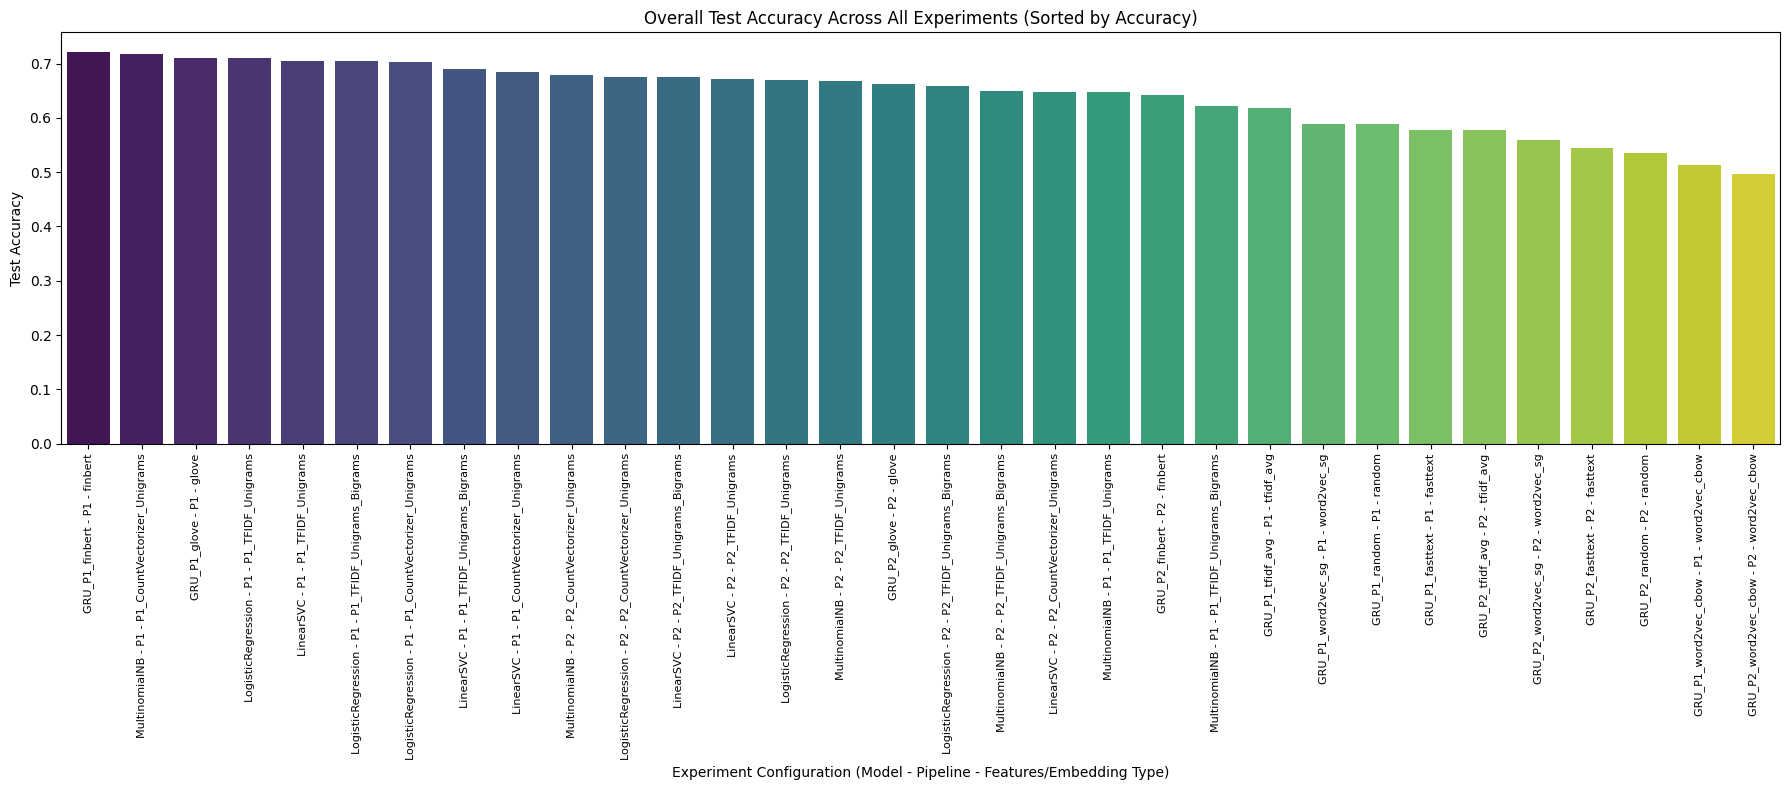

Test Accuracy plot generated.


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Sort the combined DataFrame by 'Test_Accuracy' in descending order and create a bar plot
sorted_by_accuracy = combined_results_df.sort_values(by='Test_Accuracy', ascending=False)

plt.figure(figsize=(18, 8))
sns.barplot(x='Configuration', y='Test_Accuracy', data=sorted_by_accuracy, palette='viridis')
plt.title('Overall Test Accuracy Across All Experiments (Sorted by Accuracy)')
plt.xlabel('Experiment Configuration (Model - Pipeline - Features/Embedding Type)')
plt.ylabel('Test Accuracy')
plt.xticks(rotation=90, fontsize=8) # Rotate x-axis labels for readability
plt.tight_layout() # Adjust layout to prevent labels from overlapping
plt.show()

print("Test Accuracy plot generated.")

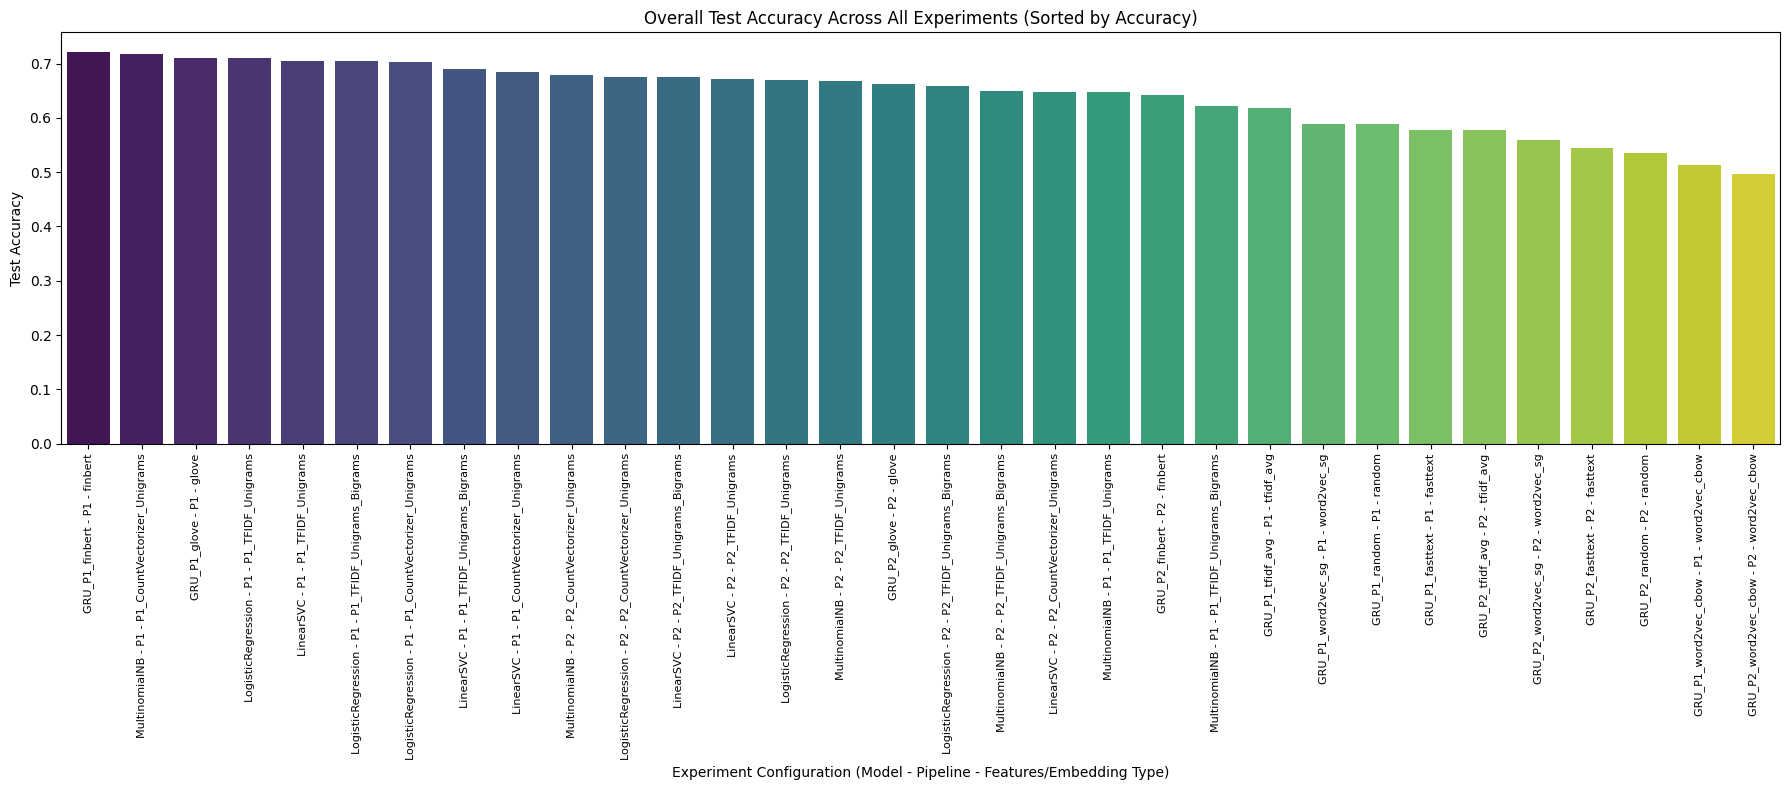

Test Accuracy plot generated.


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Sort the combined DataFrame by 'Test_Accuracy' in descending order and create a bar plot
sorted_by_accuracy = combined_results_df.sort_values(by='Test_Accuracy', ascending=False)

plt.figure(figsize=(18, 8))
sns.barplot(x='Configuration', y='Test_Accuracy', hue='Configuration', data=sorted_by_accuracy, palette='viridis', legend=False)
plt.title('Overall Test Accuracy Across All Experiments (Sorted by Accuracy)')
plt.xlabel('Experiment Configuration (Model - Pipeline - Features/Embedding Type)')
plt.ylabel('Test Accuracy')
plt.xticks(rotation=90, fontsize=8) # Rotate x-axis labels for readability
plt.tight_layout() # Adjust layout to prevent labels from overlapping
plt.show()

print("Test Accuracy plot generated.")

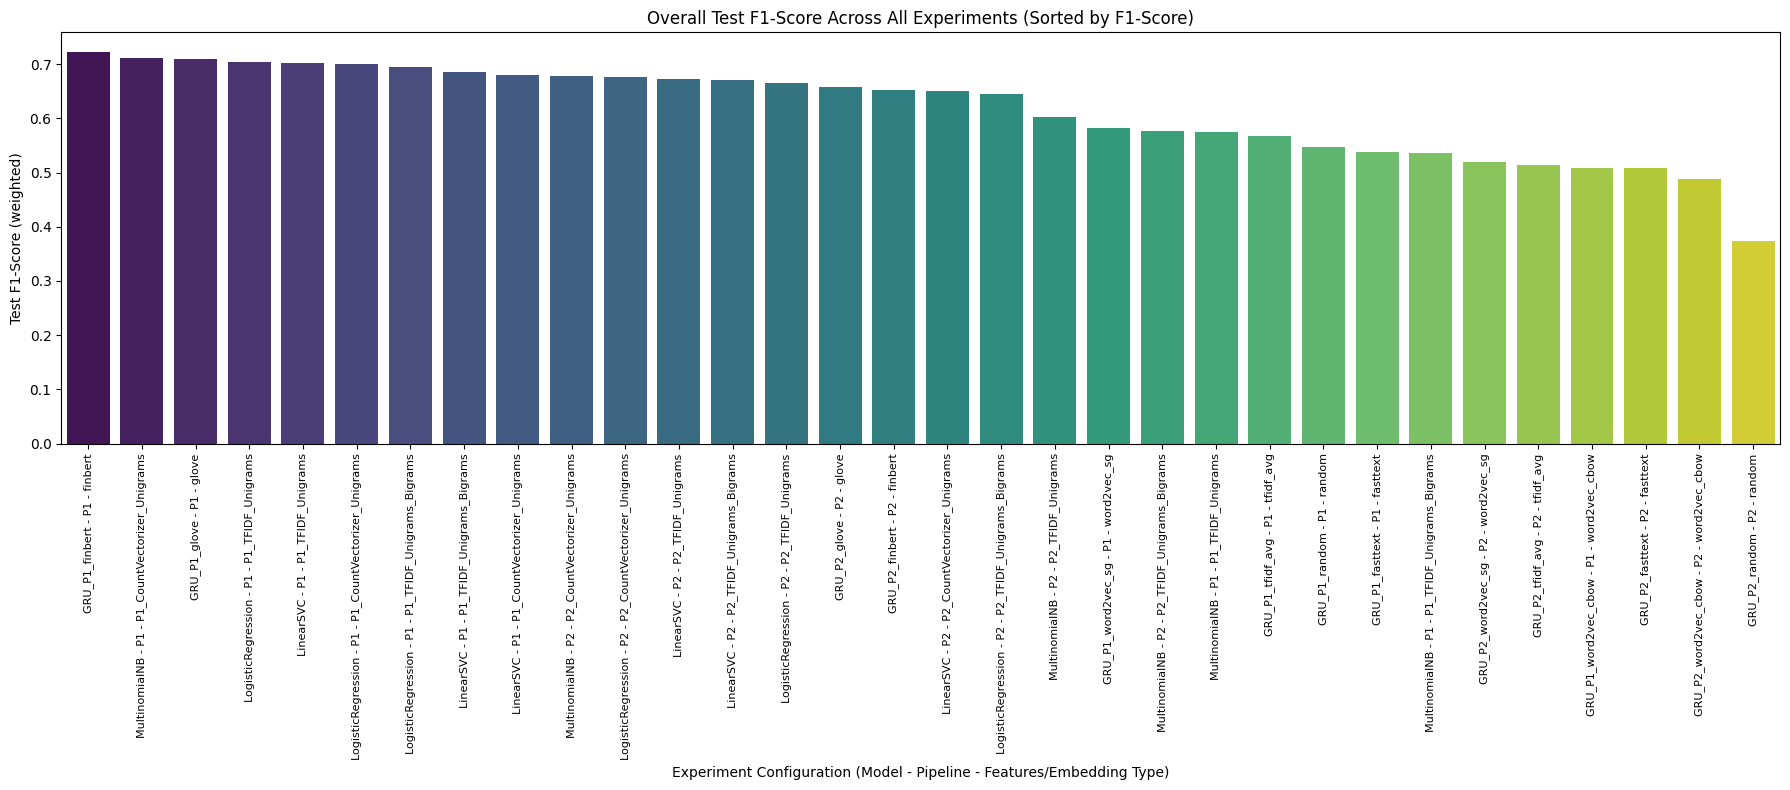

Test F1-Score plot generated.


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Sort the combined DataFrame by 'Test_F1-Score' in descending order and create a bar plot
sorted_by_f1 = combined_results_df.sort_values(by='Test_F1-Score', ascending=False)

plt.figure(figsize=(18, 8))
sns.barplot(x='Configuration', y='Test_F1-Score', hue='Configuration', data=sorted_by_f1, palette='viridis', legend=False)
plt.title('Overall Test F1-Score Across All Experiments (Sorted by F1-Score)')
plt.xlabel('Experiment Configuration (Model - Pipeline - Features/Embedding Type)')
plt.ylabel('Test F1-Score (weighted)')
plt.xticks(rotation=90, fontsize=8) # Rotate x-axis labels for readability
plt.tight_layout() # Adjust layout to prevent labels from overlapping
plt.show()

print("Test F1-Score plot generated.")

### Visualize Embeddings with PCA


In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Define lists of key words to visualize
key_financial_words = ['market', 'stock', 'share', 'investment', 'profit', 'loss', 'revenue', 'economy', 'growth', 'finance', 'bank', 'trader', 'dividend', 'bond', 'currency', '<money>', '<percent>', '<ticker>', '<date>']
positive_sentiment_words = ['good', 'positive', 'gain', 'increase', 'strong', 'up', 'rise', 'achieve', 'success', 'opportunity', 'confident', 'favorable', 'bullish']
negative_sentiment_words = ['bad', 'negative', 'loss', 'decrease', 'weak', 'down', 'fall', 'crisis', 'risk', 'bearish', 'decline', 'recession', 'uncertainty', 'not_good']
neutral_sentiment_words = ['report', 'statement', 'neutral', 'outlook', 'announcement', 'company', 'firm', 'business', 'develop', 'project', 'expected']

# Combine into a single list with categories
word_categories = {
    'financial': key_financial_words,
    'positive': positive_sentiment_words,
    'negative': negative_sentiment_words,
    'neutral': neutral_sentiment_words
}

all_words_to_visualize = []
for category, words in word_categories.items():
    all_words_to_visualize.extend(words)

print("Key word lists for visualization defined.")


Key word lists for visualization defined.



Processing Word2Vec Skip-gram (P1) embeddings...


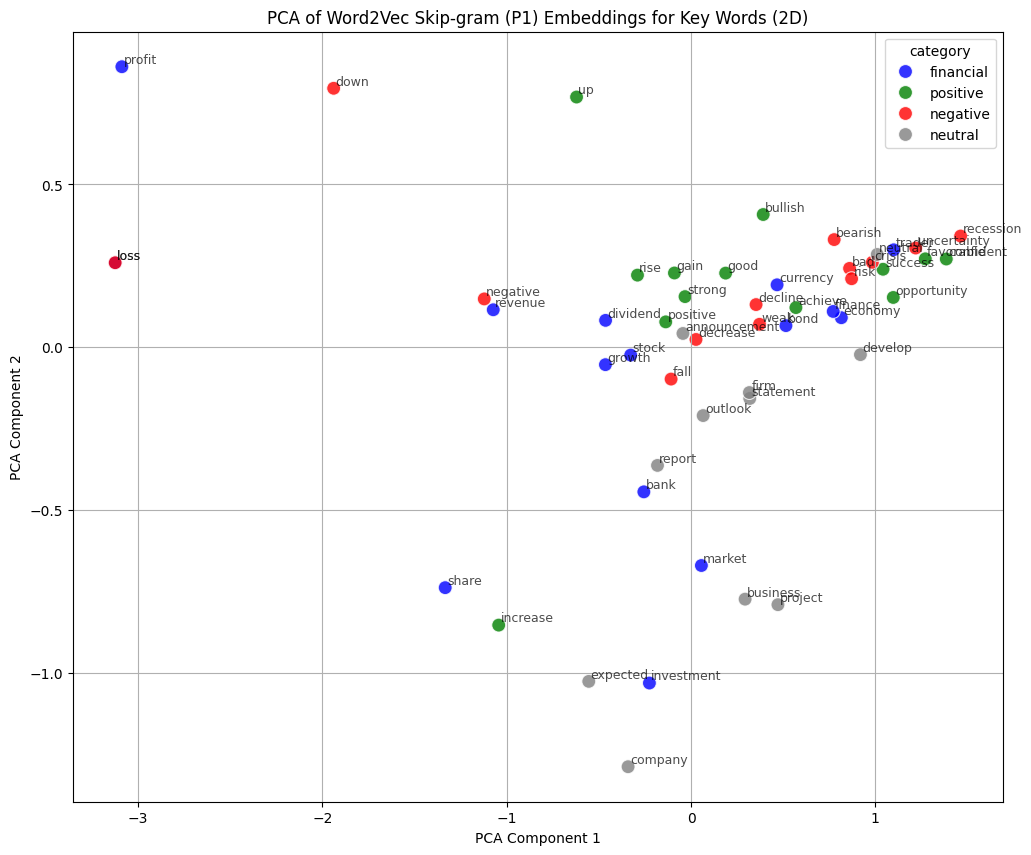


Processing Word2Vec Skip-gram (P2) embeddings...


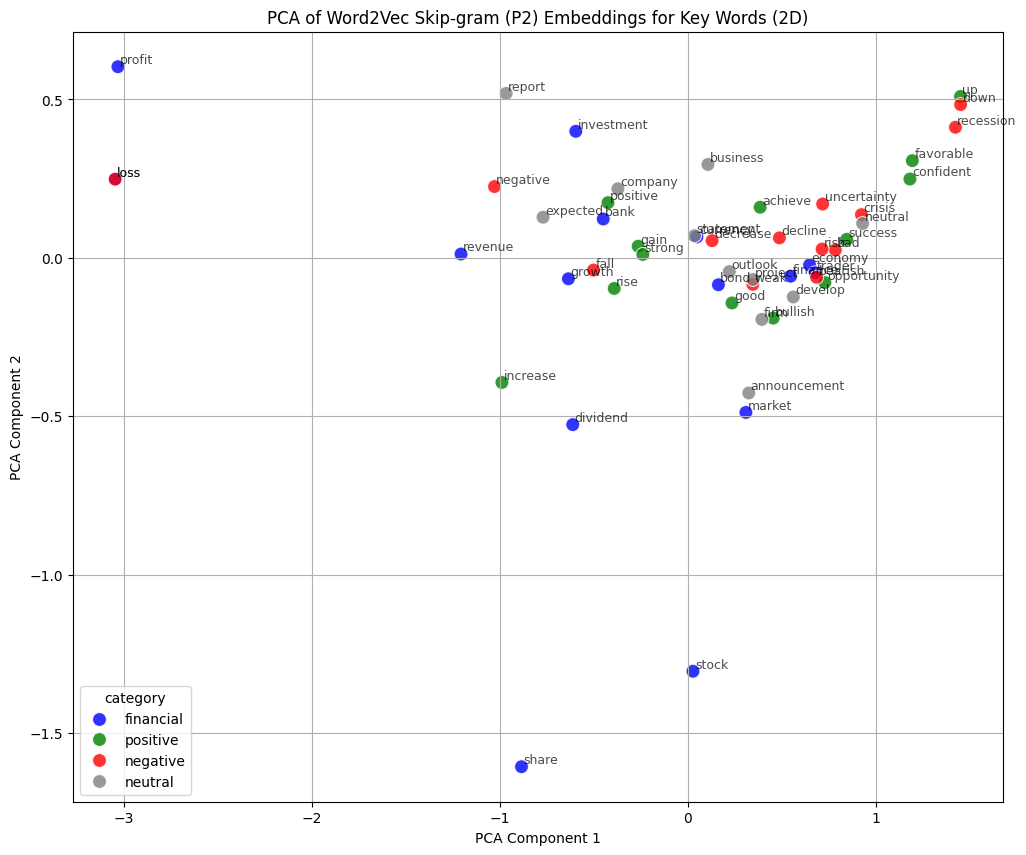


Processing Word2Vec CBOW (P1) embeddings...


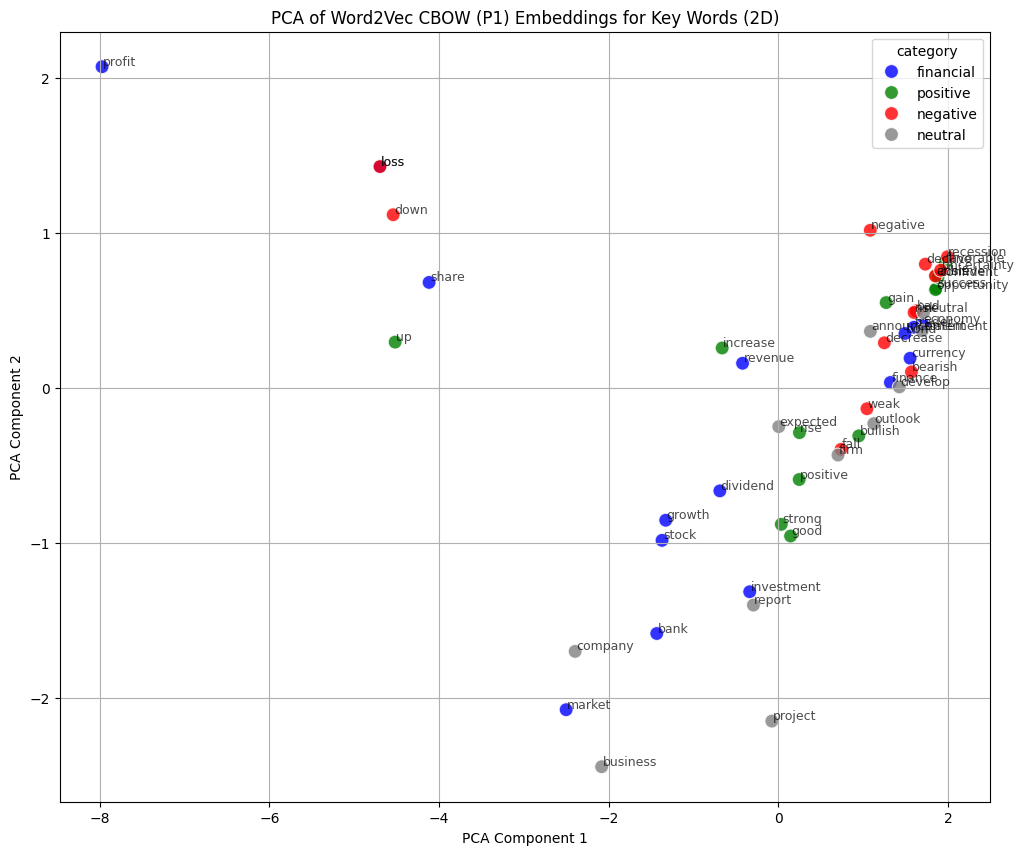


Processing Word2Vec CBOW (P2) embeddings...


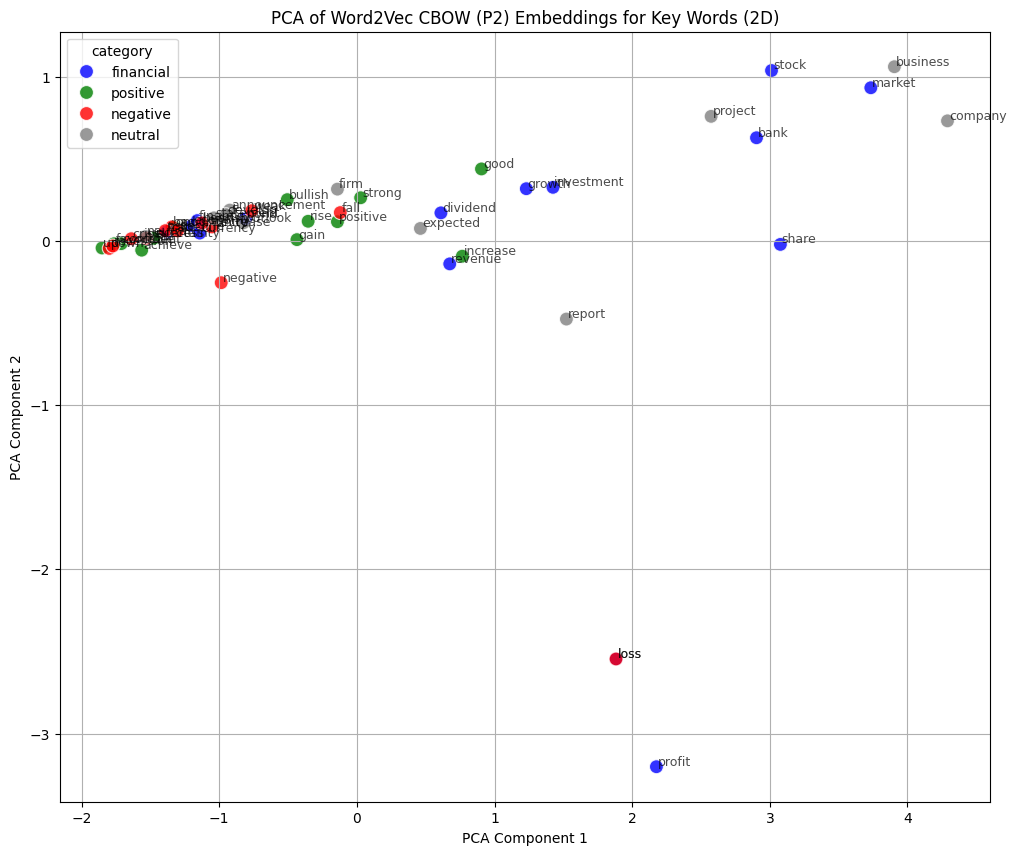


Processing FastText (P1) embeddings...


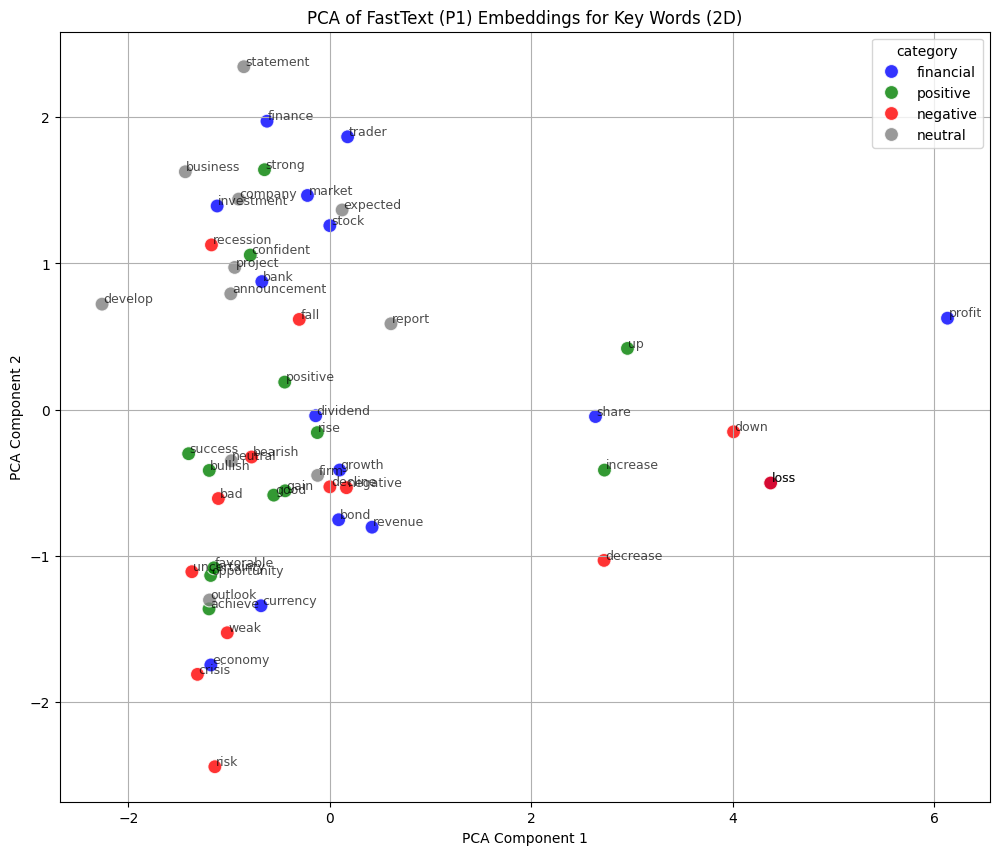


Processing FastText (P2) embeddings...


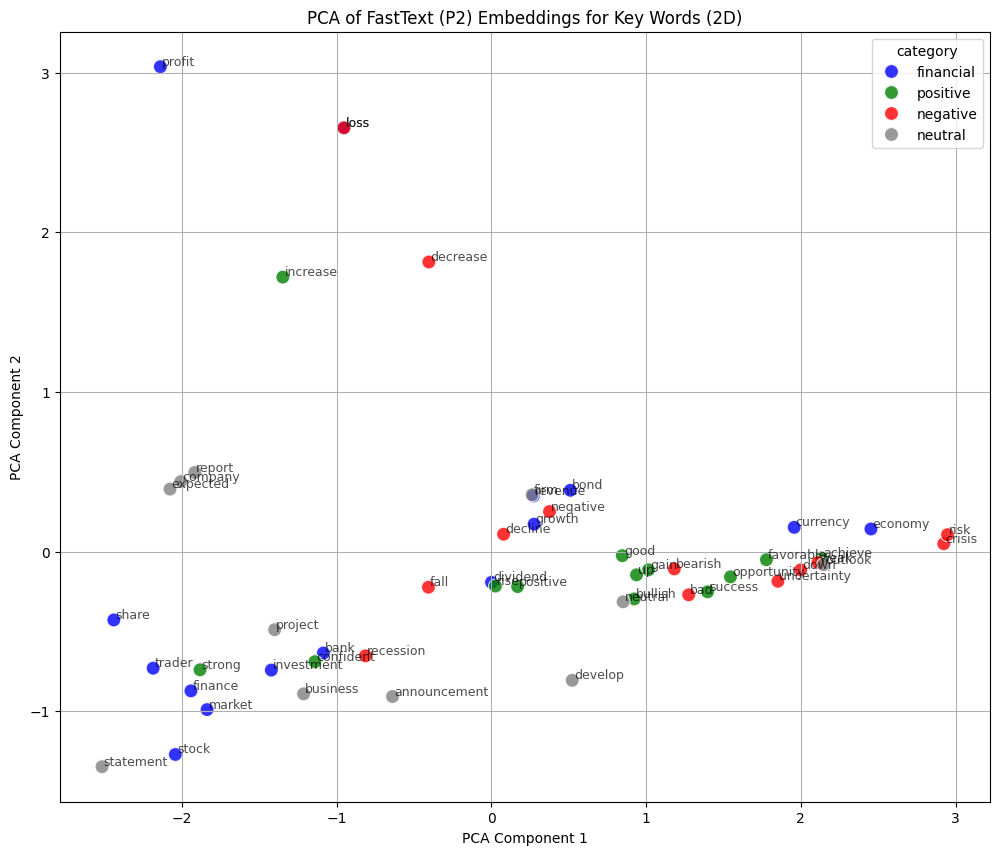


Processing GloVe (P1/P2) embeddings...


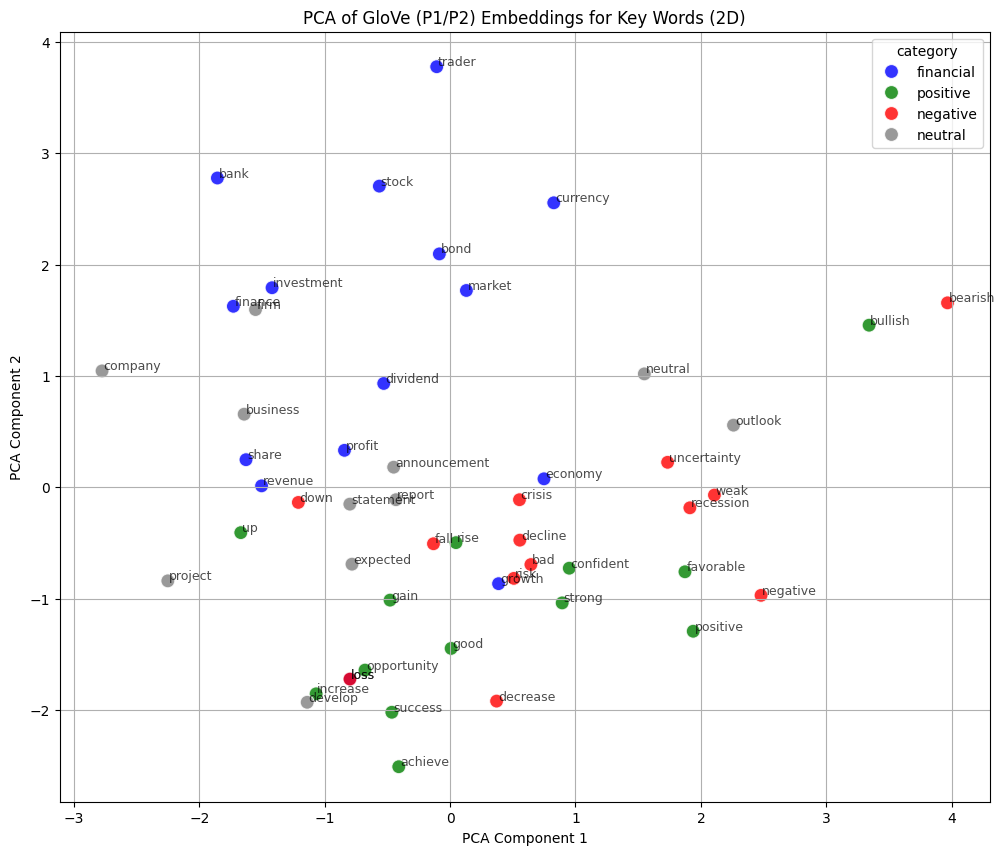


Processing FinBERT (P1/P2) embeddings...


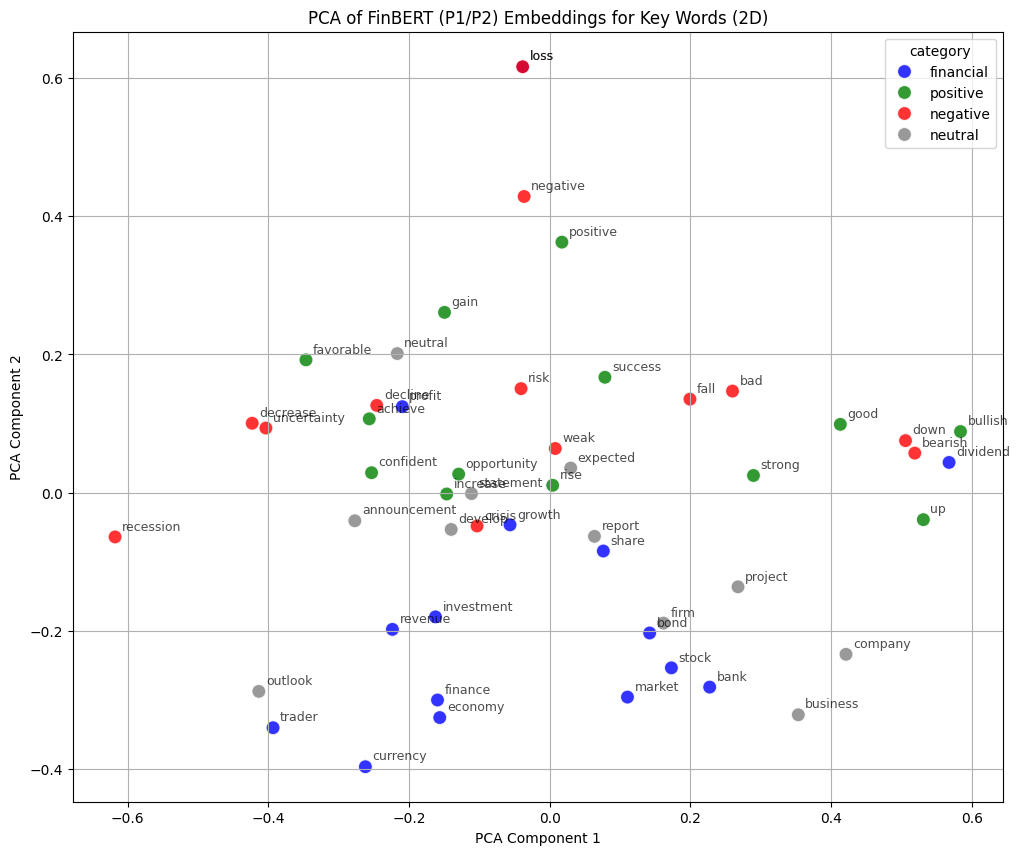

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Create a list of embedding matrices and their corresponding names
embedding_matrices_to_visualize = [
    (embedding_matrix_p1_sg, "Word2Vec Skip-gram (P1)"),
    (embedding_matrix_p2_sg, "Word2Vec Skip-gram (P2)"),
    (embedding_matrix_p1_cbow, "Word2Vec CBOW (P1)"),
    (embedding_matrix_p2_cbow, "Word2Vec CBOW (P2)"),
    (embedding_matrix_p1_fasttext, "FastText (P1)"),
    (embedding_matrix_p2_fasttext, "FastText (P2)"),
    # For GloVe and FinBERT, since the tokenizer is unified and models are pre-trained,
    # P1 and P2 matrices should be identical if populated correctly, so we visualize one.
    (embedding_matrix_p1_glove, "GloVe (P1/P2)"),
    (embedding_matrix_p1_finbert, "FinBERT (P1/P2)")
]

# Prepare data for plotting
def get_vectors_for_words(embedding_matrix, word_list, tokenizer):
    vectors = []
    words_found = []
    for word in word_list:
        # Keras Tokenizer converts words to lowercase and has OOV token
        # So we should use the `word` from word_list directly to lookup in tokenizer.word_index
        # If we normalize the word here, it might not match the original token's index if it was financial-aware token

        # For special tokens like <money>, <ticker>, etc., ensure they are in the tokenizer's vocab
        # The tokenizer was fit on raw text first, then on preprocessed texts. Rechecking token existence logic.
        # The tokenizer was fit on `combined_corpus` which included financial-aware tokens. So lookup should work.

        word_id = tokenizer.word_index.get(word)
        if word_id is not None and word_id < embedding_matrix.shape[0]:
            vectors.append(embedding_matrix[word_id])
            words_found.append(word)
    return np.array(vectors), words_found

# For each embedding matrix, perform PCA and plot
for embedding_matrix, embedding_name in embedding_matrices_to_visualize:
    print(f"\nProcessing {embedding_name} embeddings...")

    # Collect vectors and categories for plotting
    plot_data = []
    for category_name, words in word_categories.items():
        vectors, words_found = get_vectors_for_words(embedding_matrix, words, tokenizer)
        if len(vectors) > 0:
            # Add words_found and their category
            for i, word in enumerate(words_found):
                plot_data.append({'word': word, 'vector': vectors[i], 'category': category_name})

    if not plot_data:
        print(f"No words found in vocabulary for {embedding_name}. Skipping plot.")
        continue

    # Prepare data for PCA
    df_plot = pd.DataFrame(plot_data)
    all_vectors = np.array(df_plot['vector'].tolist())

    # Instantiate PCA with n_components=2
    pca = PCA(n_components=2)

    # Fit PCA to the extracted word vectors and transform them to 2D
    components = pca.fit_transform(all_vectors)

    df_plot['pca_x'] = components[:, 0]
    df_plot['pca_y'] = components[:, 1]

    # Create a scatter plot
    plt.figure(figsize=(12, 10))
    sns.scatterplot(
        x='pca_x', y='pca_y', hue='category', data=df_plot,
        palette={'financial': 'blue', 'positive': 'green', 'negative': 'red', 'neutral': 'gray'},
        s=100, alpha=0.8, legend='full'
    )

    # Annotate each point with its corresponding word
    for i, row in df_plot.iterrows():
        plt.annotate(row['word'], (row['pca_x'] + 0.01, row['pca_y'] + 0.01), fontsize=9, alpha=0.7)

    # Add title and labels
    plt.title(f'PCA of {embedding_name} Embeddings for Key Words (2D)')
    plt.xlabel('PCA Component 1')
    plt.ylabel('PCA Component 2')
    plt.grid(True)
    plt.show()


## Generate Result Tables



In [ ]:
import pandas as pd
import numpy as np

# Create a temporary DataFrame for log loss from classical results
classical_log_loss_df = classical_test_results_df[['Model', 'Features', 'Test_Log_Loss']].copy()
classical_log_loss_df['Pipeline'] = classical_log_loss_df['Features'].apply(lambda x: x.split('_')[0])
classical_log_loss_df.rename(columns={'Features': 'Configuration_Detail'}, inplace=True)
classical_log_loss_df['Configuration'] = classical_log_loss_df['Model'] + ' - ' + classical_log_loss_df['Pipeline'] + ' - ' + classical_log_loss_df['Configuration_Detail']

# Create a temporary DataFrame for log loss from neural results
neural_log_loss_df = neural_test_results_df[['Model', 'Pipeline', 'Embedding_Type', 'Test_Log_Loss']].copy()
neural_log_loss_df.rename(columns={'Embedding_Type': 'Configuration_Detail'}, inplace=True)
neural_log_loss_df['Configuration'] = neural_log_loss_df['Model'] + ' - ' + neural_log_loss_df['Pipeline'] + ' - ' + neural_log_loss_df['Configuration_Detail']

# Combine log loss information
all_log_loss_df = pd.concat([classical_log_loss_df, neural_log_loss_df], ignore_index=True)

# Merge combined_results_df with all_log_loss_df to get the Test_Log_Loss column
table1_df = pd.merge(
    combined_results_df,
    all_log_loss_df[['Configuration', 'Test_Log_Loss']],
    on='Configuration',
    how='left'
)

# Ensure Log Loss is 'N/A' for LinearSVC as it doesn't provide probabilities
table1_df.loc[table1_df['Model'] == 'LinearSVC', 'Test_Log_Loss'] = 'N/A'

print("Initial table1_df created with Test_Log_Loss. First 5 rows:")
print(table1_df.head())

Initial table1_df created with Test_Log_Loss. First 5 rows:
                                       Configuration               Model  \
0  LogisticRegression - P1 - P1_CountVectorizer_U...  LogisticRegression   
1       LinearSVC - P1 - P1_CountVectorizer_Unigrams           LinearSVC   
2   MultinomialNB - P1 - P1_CountVectorizer_Unigrams       MultinomialNB   
3  LogisticRegression - P2 - P2_CountVectorizer_U...  LogisticRegression   
4       LinearSVC - P2 - P2_CountVectorizer_Unigrams           LinearSVC   

  Pipeline         Configuration_Detail  Test_Accuracy  Test_F1-Score  \
0       P1  P1_CountVectorizer_Unigrams       0.702564       0.699895   
1       P1  P1_CountVectorizer_Unigrams       0.683761       0.680854   
2       P1  P1_CountVectorizer_Unigrams       0.717949       0.710948   
3       P2  P2_CountVectorizer_Unigrams       0.675214       0.677157   
4       P2  P2_CountVectorizer_Unigrams       0.647863       0.650476   

  Test_Log_Loss  
0      0.688442  
1       

/tmp/ipython-input-1448309553.py:27: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'N/A' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  table1_df.loc[table1_df['Model'] == 'LinearSVC', 'Test_Log_Loss'] = 'N/A'


In [ ]:
import pandas as pd
import numpy as np

# Create a temporary DataFrame for log loss from classical results
classical_log_loss_df = classical_test_results_df[['Model', 'Features', 'Test_Log_Loss']].copy()
classical_log_loss_df['Pipeline'] = classical_log_loss_df['Features'].apply(lambda x: x.split('_')[0])
classical_log_loss_df.rename(columns={'Features': 'Configuration_Detail'}, inplace=True)
classical_log_loss_df['Configuration'] = classical_log_loss_df['Model'] + ' - ' + classical_log_loss_df['Pipeline'] + ' - ' + classical_log_loss_df['Configuration_Detail']

# Create a temporary DataFrame for log loss from neural results
neural_log_loss_df = neural_test_results_df[['Model', 'Pipeline', 'Embedding_Type', 'Test_Log_Loss']].copy()
neural_log_loss_df.rename(columns={'Embedding_Type': 'Configuration_Detail'}, inplace=True)
neural_log_loss_df['Configuration'] = neural_log_loss_df['Model'] + ' - ' + neural_log_loss_df['Pipeline'] + ' - ' + neural_log_loss_df['Configuration_Detail']

# Combine log loss information
all_log_loss_df = pd.concat([classical_log_loss_df, neural_log_loss_df], ignore_index=True)

# Merge combined_results_df with all_log_loss_df to get the Test_Log_Loss column
table1_df = pd.merge(
    combined_results_df,
    all_log_loss_df[['Configuration', 'Test_Log_Loss']],
    on='Configuration',
    how='left'
)

# Explicitly cast to object dtype before assigning 'N/A' to avoid FutureWarning
table1_df['Test_Log_Loss'] = table1_df['Test_Log_Loss'].astype(object)

# Ensure Log Loss is 'N/A' for LinearSVC as it doesn't provide probabilities
table1_df.loc[table1_df['Model'] == 'LinearSVC', 'Test_Log_Loss'] = 'N/A'

# Add new columns to table1_df: 'Tokenization Method', 'Embedding Type/Feature Extractor', 'Model Architecture', and 'Hyperparameters'.
table1_df['Tokenization Method'] = ''
table1_df['Embedding Type/Feature Extractor'] = ''
table1_df['Model Architecture'] = ''
table1_df['Hyperparameters'] = ''

# Populate these new columns based on whether the model is classical or neural:
# For Classical Models
classical_models_mask = table1_df['Model'].isin(['LogisticRegression', 'LinearSVC', 'MultinomialNB'])

# Tokenization Method for Classical Models
table1_df.loc[classical_models_mask, 'Tokenization Method'] = table1_df.loc[classical_models_mask, 'Configuration_Detail'].apply(lambda x: x.split('_')[1] + ' ' + x.split('_')[2])

# Embedding Type/Feature Extractor for Classical Models
table1_df.loc[classical_models_mask, 'Embedding Type/Feature Extractor'] = table1_df.loc[classical_models_mask, 'Configuration_Detail'].apply(lambda x: ' '.join(x.split('_')[1:]))

# Model Architecture for Classical Models
table1_df.loc[classical_models_mask, 'Model Architecture'] = table1_df.loc[classical_models_mask, 'Model']

# Hyperparameters for Classical Models
for idx in table1_df[classical_models_mask].index:
    model_name = table1_df.loc[idx, 'Model']
    if model_name == 'LogisticRegression':
        table1_df.loc[idx, 'Hyperparameters'] = "Max_iter=1000, Solver='liblinear', Class_weight='balanced'"
    elif model_name == 'LinearSVC':
        table1_df.loc[idx, 'Hyperparameters'] = "Max_iter=5000, Class_weight='balanced'"
    elif model_name == 'MultinomialNB':
        table1_df.loc[idx, 'Hyperparameters'] = "Default"

# For Neural Models
neural_models_mask = table1_df['Model'].str.startswith('GRU')

table1_df.loc[neural_models_mask, 'Tokenization Method'] = 'Keras Tokenizer API'
table1_df.loc[neural_models_mask, 'Embedding Type/Feature Extractor'] = table1_df.loc[neural_models_mask, 'Configuration_Detail']
table1_df.loc[neural_models_mask, 'Model Architecture'] = 'Embedding Layer, 2xGRU(64), Dense(3, softmax)'
table1_df.loc[neural_models_mask, 'Hyperparameters'] = 'Epochs=40, Batch_size=32, Optimizer=Adam(default_lr)'

# Select and reorder columns for table1_df
table1_df = table1_df[[ 'Model', 'Pipeline', 'Tokenization Method', 'Embedding Type/Feature Extractor',
                        'Model Architecture', 'Hyperparameters', 'Test_Accuracy', 'Test_F1-Score', 'Test_Log_Loss']]

# Sort table1_df by 'Test_Accuracy' in descending order.
table1_df = table1_df.sort_values(by='Test_Accuracy', ascending=False).reset_index(drop=True)

# Print the top 10 experiments from table1_df and the full table1_df
print("\n--- Table 1 \u2014 Model Summary & Performance ---")
print("Top 10 Experiments by Test Accuracy:")
print(table1_df.head(10).to_markdown(index=False))
print("\nFull Table 1:")
print(table1_df.to_markdown(index=False))


# Create table2_df by filtering neural_test_results_df to focus on embedding comparisons.
table2_df = neural_test_results_df[['Embedding_Type', 'Pipeline', 'Test_Accuracy', 'Test_F1-Score']].copy()

# Add new columns to table2_df: 'Preprocessing Pipeline', 'Tokenization Method', 'Embedding Dimensions', and 'Trainable'.
table2_df['Preprocessing Pipeline'] = table2_df['Pipeline']
table2_df['Tokenization Method'] = 'Keras Tokenizer API'
table2_df['Embedding Dimensions'] = ''
table2_df['Trainable'] = ''

# Populate these columns:
# Embedding Dimensions
for idx in table2_df.index:
    emb_type = table2_df.loc[idx, 'Embedding_Type']
    if emb_type == 'finbert':
        table2_df.loc[idx, 'Embedding Dimensions'] = finbert_embedding_dim
    elif emb_type == 'tfidf_avg':
        table2_df.loc[idx, 'Embedding Dimensions'] = embedding_dim # TF-IDF averaged is 100
    else:
        table2_df.loc[idx, 'Embedding Dimensions'] = embedding_dim

# Trainable
for idx in table2_df.index:
    emb_type = table2_df.loc[idx, 'Embedding_Type']
    if emb_type == 'random':
        table2_df.loc[idx, 'Trainable'] = True
    elif emb_type in ['word2vec_sg', 'word2vec_cbow', 'fasttext', 'glove', 'finbert']:
        table2_df.loc[idx, 'Trainable'] = False
    elif emb_type == 'tfidf_avg':
        table2_df.loc[idx, 'Trainable'] = 'N/A' # Not applicable as it's a direct feature, not an embedding layer

# Select and reorder columns for table2_df
table2_df = table2_df[['Embedding_Type', 'Preprocessing Pipeline', 'Tokenization Method',
                       'Embedding Dimensions', 'Trainable', 'Test_Accuracy', 'Test_F1-Score']]

# Sort table2_df by 'Test_Accuracy' in descending order.
table2_df = table2_df.sort_values(by='Test_Accuracy', ascending=False).reset_index(drop=True)

# Print the full table2_df labeled as 'Table 2 \u2014 Embedding Comparison & Performance'.
print("\n--- Table 2 \u2014 Embedding Comparison & Performance ---")
print(table2_df.to_markdown(index=False))



--- Table 1 — Model Summary & Performance ---
Top 10 Experiments by Test Accuracy:
| Model              | Pipeline   | Tokenization Method      | Embedding Type/Feature Extractor   | Model Architecture                            | Hyperparameters                                            |   Test_Accuracy |   Test_F1-Score | Test_Log_Loss      |
|:-------------------|:-----------|:-------------------------|:-----------------------------------|:----------------------------------------------|:-----------------------------------------------------------|----------------:|----------------:|:-------------------|
| GRU_P1_finbert     | P1         | Keras Tokenizer API      | finbert                            | Embedding Layer, 2xGRU(64), Dense(3, softmax) | Epochs=40, Batch_size=32, Optimizer=Adam(default_lr)       |        0.721368 |        0.722611 | 1.328833810567723  |
| MultinomialNB      | P1         | CountVectorizer Unigrams | CountVectorizer Unigrams           | MultinomialNB     

## Save Top 5 Models

In [ ]:
import os
import joblib
from tensorflow.keras.models import save_model
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import MultinomialNB

# Get the top 5 experiments from table1_df
top_5_experiments = table1_df.head(5)

# Create a directory to save the models
save_dir = 'saved_models'
os.makedirs(save_dir, exist_ok=True)
print(f"Models will be saved to: {os.path.abspath(save_dir)}")

# Helper function to get feature splits (re-defined for clarity, assuming necessary variables are in scope)
def get_feature_splits(feature_matrix, X_train_idx, X_val_idx, X_test_idx):
    X_train = feature_matrix[X_train_idx]
    X_val = feature_matrix[X_val_idx]
    X_test = feature_matrix[X_test_idx]
    return X_train, X_val, X_test

# Iterate through the top 5 experiments and save each model
for index, row in top_5_experiments.iterrows():
    model_type = row['Model']
    pipeline = row['Pipeline']
    feature_extractor_or_embedding = row['Embedding Type/Feature Extractor']
    hyperparameters = row['Hyperparameters']
    model_file_name = f"{model_type.replace(' ', '_')}_{pipeline}_{feature_extractor_or_embedding.replace(' ', '_').replace('/', '_')}"

    print(f"\nSaving model: {model_type} - {pipeline} - {feature_extractor_or_embedding}")

    if 'GRU' in model_type: # Neural GRU Model
        # Retrieve necessary data for neural model
        if pipeline == 'P1':
            X_train_input = X_p1_padded[X_train_idx] if feature_extractor_or_embedding != 'tfidf_avg' else X_p1_tfidf_weighted_embeddings[X_train_idx].reshape(-1, 1, embedding_dim)
        else: # P2
            X_train_input = X_p2_padded[X_train_idx] if feature_extractor_or_embedding != 'tfidf_avg' else X_p2_tfidf_weighted_embeddings[X_train_idx].reshape(-1, 1, embedding_dim)

        # Prepare embedding matrix and other parameters for build_gru_model
        current_embedding_matrix = None
        use_embedding_layer = True
        input_shape_for_model = (max_sequence_length,)
        current_embedding_output_dim = embedding_dim # Default

        if feature_extractor_or_embedding == 'random':
            current_embedding_matrix = random_embedding_matrix
            current_embedding_output_dim = embedding_dim
        elif feature_extractor_or_embedding == 'word2vec_sg':
            current_embedding_matrix = embedding_matrices_p1['word2vec_sg'] if pipeline == 'P1' else embedding_matrices_p2['word2vec_sg']
            current_embedding_output_dim = embedding_dim
        elif feature_extractor_or_embedding == 'word2vec_cbow':
            current_embedding_matrix = embedding_matrices_p1['word2vec_cbow'] if pipeline == 'P1' else embedding_matrices_p2['word2vec_cbow']
            current_embedding_output_dim = embedding_dim
        elif feature_extractor_or_embedding == 'fasttext':
            current_embedding_matrix = embedding_matrices_p1['fasttext'] if pipeline == 'P1' else embedding_matrices_p2['fasttext']
            current_embedding_output_dim = embedding_dim
        elif feature_extractor_or_embedding == 'glove':
            current_embedding_matrix = embedding_matrix_p1_glove # P1/P2 same for GloVe
            current_embedding_output_dim = embedding_dim
        elif feature_extractor_or_embedding == 'finbert':
            current_embedding_matrix = embedding_matrix_p1_finbert # P1/P2 same for FinBERT
            current_embedding_output_dim = finbert_embedding_dim
        elif feature_extractor_or_embedding == 'tfidf_avg':
            use_embedding_layer = False
            input_shape_for_model = (1, embedding_dim)
            current_embedding_output_dim = embedding_dim

        # Re-build and re-train the GRU model (epochs_count is 40)
        gru_model = build_gru_model(
            input_shape=input_shape_for_model,
            output_units=y_train.shape[1],
            embedding_matrix=current_embedding_matrix,
            use_embedding_layer=use_embedding_layer,
            embedding_output_dim=current_embedding_output_dim,
            vocabulary_size=vocabulary_size
        )
        gru_model.fit(X_train_input, y_train, epochs=epochs_count, batch_size=32, verbose=0)
        save_model(gru_model, os.path.join(save_dir, f"{model_file_name}.keras"))
        print(f"Saved neural model to {model_file_name}.keras")

    else: # Classical Model
        # Determine feature matrix used by reconstructing the name from available columns
        # E.g., 'P1_CountVectorizer_Unigrams' from 'P1' and 'CountVectorizer Unigrams'
        feature_matrix_identifier = f"{pipeline}_{feature_extractor_or_embedding.replace(' ', '_')}"
        feature_matrix = None
        if feature_matrix_identifier == "P1_CountVectorizer_Unigrams":
            feature_matrix = X_p1_cv_unigrams
        elif feature_matrix_identifier == "P2_CountVectorizer_Unigrams":
            feature_matrix = X_p2_cv_unigrams
        elif feature_matrix_identifier == "P1_TFIDF_Unigrams":
            feature_matrix = X_p1_tfidf_unigrams
        elif feature_matrix_identifier == "P2_TFIDF_Unigrams":
            feature_matrix = X_p2_tfidf_unigrams
        elif feature_matrix_identifier == "P1_TFIDF_Unigrams_Bigrams":
            feature_matrix = X_p1_tfidf_unigrams_bigrams
        elif feature_matrix_identifier == "P2_TFIDF_Unigrams_Bigrams":
            feature_matrix = X_p2_tfidf_unigrams_bigrams

        if feature_matrix is None:
            print(f"Error: Feature matrix not found for {feature_matrix_identifier}. Skipping.")
            continue

        # Get training features
        X_train_classical, _, _ = get_feature_splits(feature_matrix, X_train_idx, X_val_idx, X_test_idx)

        # Instantiate and train the classical model
        classical_model = None
        if model_type == 'LogisticRegression':
            classical_model = LogisticRegression(random_state=42, max_iter=1000, solver='liblinear', class_weight='balanced')
        elif model_type == 'LinearSVC':
            classical_model = LinearSVC(random_state=42, max_iter=5000, class_weight='balanced')
        elif model_type == 'MultinomialNB':
            classical_model = MultinomialNB()

        if classical_model:
            classical_model.fit(X_train_classical, np.argmax(y_train, axis=1))
            joblib.dump(classical_model, os.path.join(save_dir, f"{model_file_name}.joblib"))
            print(f"Saved classical model to {model_file_name}.joblib")
        else:
            print(f"Error: Unknown classical model type {model_type}. Skipping.")

print("\nAll top 5 models have been re-trained and saved.")

Models will be saved to: /content/saved_models

Saving model: GRU_P1_finbert - P1 - finbert
Saved neural model to GRU_P1_finbert_P1_finbert.keras

Saving model: MultinomialNB - P1 - CountVectorizer Unigrams
Saved classical model to MultinomialNB_P1_CountVectorizer_Unigrams.joblib

Saving model: GRU_P1_glove - P1 - glove
Saved neural model to GRU_P1_glove_P1_glove.keras

Saving model: LogisticRegression - P1 - TFIDF Unigrams
Saved classical model to LogisticRegression_P1_TFIDF_Unigrams.joblib

Saving model: LinearSVC - P1 - TFIDF Unigrams
Saved classical model to LinearSVC_P1_TFIDF_Unigrams.joblib

All top 5 models have been re-trained and saved.
